# INTERNAL ASSIGNMENT

In [7]:

#importing the core libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Model Selection
from sklearn.model_selection import train_test_split
#          from sklearn.model_selection import validation_curve
from sklearn.model_selection import KFold
#          from sklearn.model_selection import cross_val_score for parameter tuning
#          Basically the way we tried to find different thershold value
from sklearn.model_selection import GridSearchCV

# SVR Algos
from sklearn.svm import SVC

# Naive Bayes Algos
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB

# Descision Trees Algo
from sklearn.tree import DecisionTreeClassifier
#For plotting trees
from sklearn.tree import plot_tree

# Random Forest 
from sklearn.ensemble import RandomForestClassifier

# Recurssive Feature Extraction
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# fOR mANUAL OLS function for linear model
import statsmodels.api as sm 
#VIF for manual feature extraction
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Regularization 
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

# Pre- prosscessing
from sklearn.preprocessing import MinMaxScaler

#Metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import ConfusionMatrixDisplay
# saving ML Model
import joblib

In [8]:
# Reading Data
df = pd.read_csv('winequality-white.csv',sep=';')
df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0              0.27         0.36            20.7      0.045   
1               6.3              0.30         0.34             1.6      0.049   
2               8.1              0.28         0.40             6.9      0.050   
3               7.2              0.23         0.32             8.5      0.058   
4               7.2              0.23         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    45.0                 170.0  1.00100  3.00       0.45   
1                    14.0                 132.0  0.99400  3.30       0.49   
2                    30.0                  97.0  0.99510  3.26       0.44   
3                    47.0                 186.0  0.99560  3.19       0.40   
4                    47.0                 186.0  0.99560  3.19       0.40   
...                   ...                   ...      ...   ...        ...   
4893                 24.0                  92.0  0.99114  3.27       0.50   
4894                 57.0                 168.0  0.99490  3.15       0.46   
4895                 30.0                 111.0  0.99254  2.99       0.46   
4896                 20.0                 110.0  0.98869  3.34       0.38   
4897                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  quality  
0         8.8        6  
1         9.5        6  
2        10.1        6  
3         9.9        6  
4         9.9        6  
...       ...      ...  
4893     11.2        6  
4894      9.6        5  
4895      9.4        6  
4896     12.8        7  
4897     11.8        6  

[4898 rows x 12 columns]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [10]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4898.000000       4898.000000  4898.000000     4898.000000   
mean        6.854788          0.278241     0.334192        6.391415   
std         0.843868          0.100795     0.121020        5.072058   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  4898.000000          4898.000000           4898.000000  4898.000000   
mean      0.045772            35.308085            138.360657     0.994027   
std       0.021848            17.007137             42.498065     0.002991   
min       0.009000             2.000000              9.000000     0.987110   
25%       0.036000            23.000000            108.000000     0.991723   
50%       0.043000            34.000000            134.000000     0.993740   
75%       0.050000            46.000000            167.000000     0.996100   
max       0.346000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  4898.000000  4898.000000  4898.000000  4898.000000  
mean      3.188267     0.489847    10.514267     5.877909  
std       0.151001     0.114126     1.230621     0.885639  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.090000     0.410000     9.500000     5.000000  
50%       3.180000     0.470000    10.400000     6.000000  
75%       3.280000     0.550000    11.400000     6.000000  
max       3.820000     1.080000    14.200000     9.000000

### Checking For Missing Values:

In [11]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

There are no NaN values, let's see if there are any 0's entered instead.

In [12]:
df1 = df.drop('quality',axis=1)
#Now replace all the '0' values into NaN
df1.replace(0, np.nan, inplace=True)
df1.isnull().sum()

fixed acidity            0
volatile acidity         0
citric acid             19
residual sugar           0
chlorides                0
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       0
sulphates                0
alcohol                  0
dtype: int64

# EDA

<Axes: title={'center': 'Quality vs all features'}>

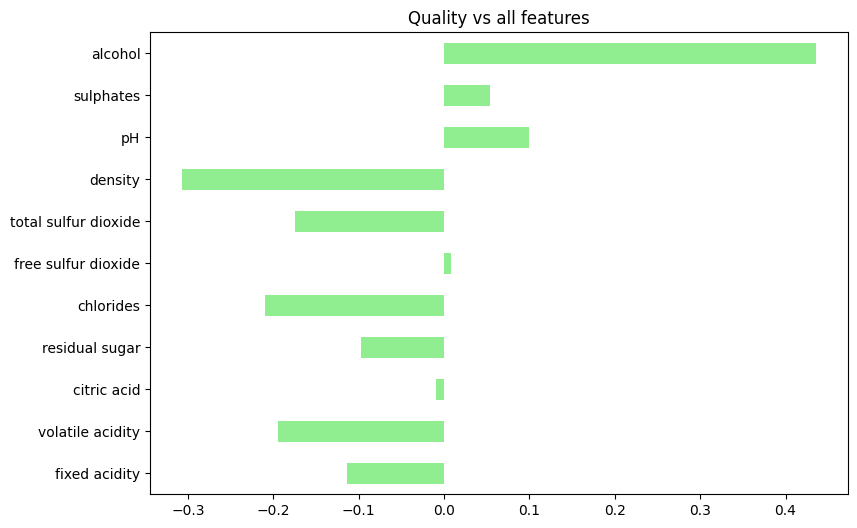

In [13]:
#feature importance using corr
df.drop('quality', axis=1).corrwith(df.quality).plot(kind='barh', figsize=(9, 6), color='lightgreen', title="Quality vs all features")


 - Free sulfur dioxide and citric acid have a very low correaltion with our target variable , might be useless features.

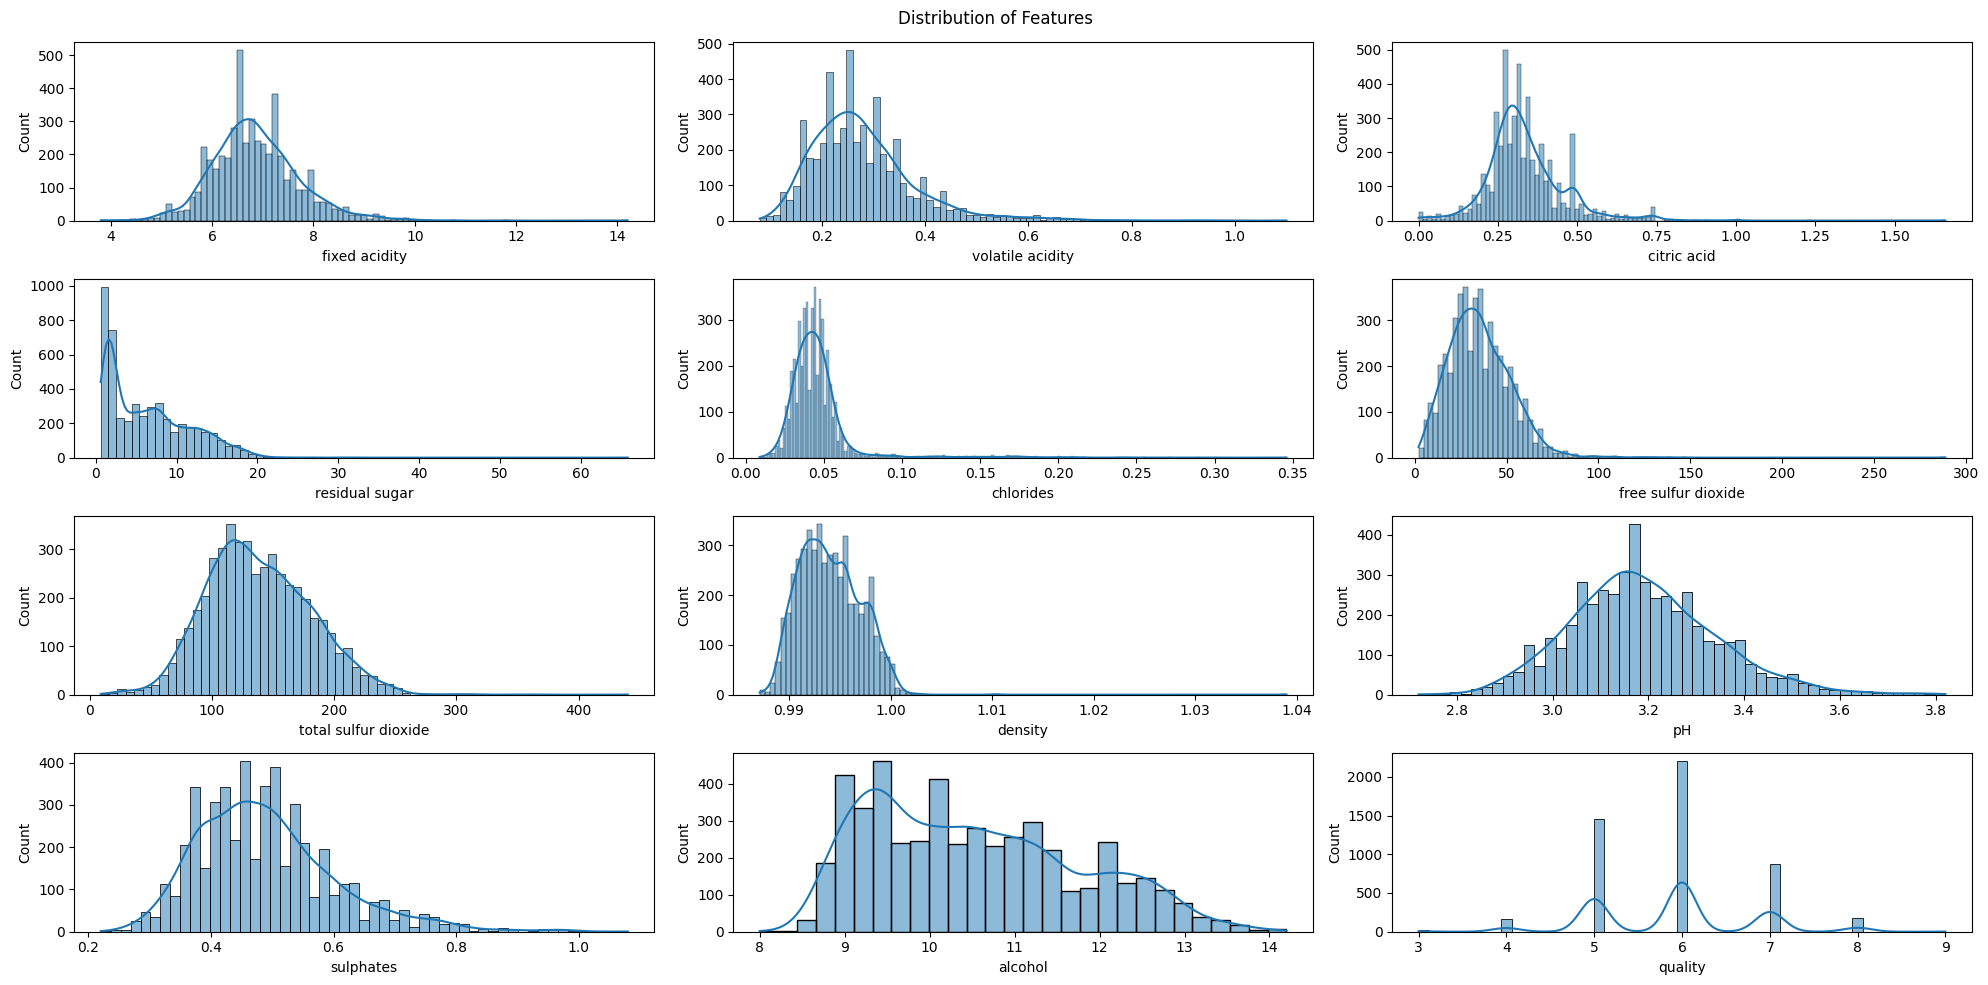

In [14]:
# Distribution of The data using pairplot

# Set the figure size and layout
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(20,10))
axes = axes.flatten()

# Plot the distribution of each column
for i, col in enumerate(df.columns):
    sns.histplot(data=df, x=col, kde=True, ax=axes[i])
    
# Add titles and adjust spacing
plt.suptitle('Distribution of Features')
plt.tight_layout()

#### Insights:
- A lot of the seems to be quite symmetrically distributed, but there are features LIKE Residual suage which is positively skewed.
- The the target varibles are highly imbalanced, with some quality values not even present here, we will ignore those values (ie 1,2 and 10)


## Check for Normality using skew and kurtosis:

In [15]:
# skewness along the index axis 
df.skew(axis = 0, skipna = True) 

fixed acidity           0.647751
volatile acidity        1.576980
citric acid             1.281920
residual sugar          1.077094
chlorides               5.023331
free sulfur dioxide     1.406745
total sulfur dioxide    0.390710
density                 0.977773
pH                      0.457783
sulphates               0.977194
alcohol                 0.487342
quality                 0.155796
dtype: float64

In [16]:
# kurtosis
# skewness along the index axis 
df.kurtosis(axis = 0, skipna = True) 

fixed acidity            2.172178
volatile acidity         5.091626
citric acid              6.174901
residual sugar           3.469820
chlorides               37.564600
free sulfur dioxide     11.466342
total sulfur dioxide     0.571853
density                  9.793807
pH                       0.530775
sulphates                1.590930
alcohol                 -0.698425
quality                  0.216526
dtype: float64

## Insight:
- While there are some features like pH and total sulfur dioxide that are close to the normal distibution.
- There are quite a few whose peakedness is too high and hence deviates from a normal distibution - might be lots of outliers.
- Therfore, while scaling a MinMaxScaler will be used

## Checking For Outliers

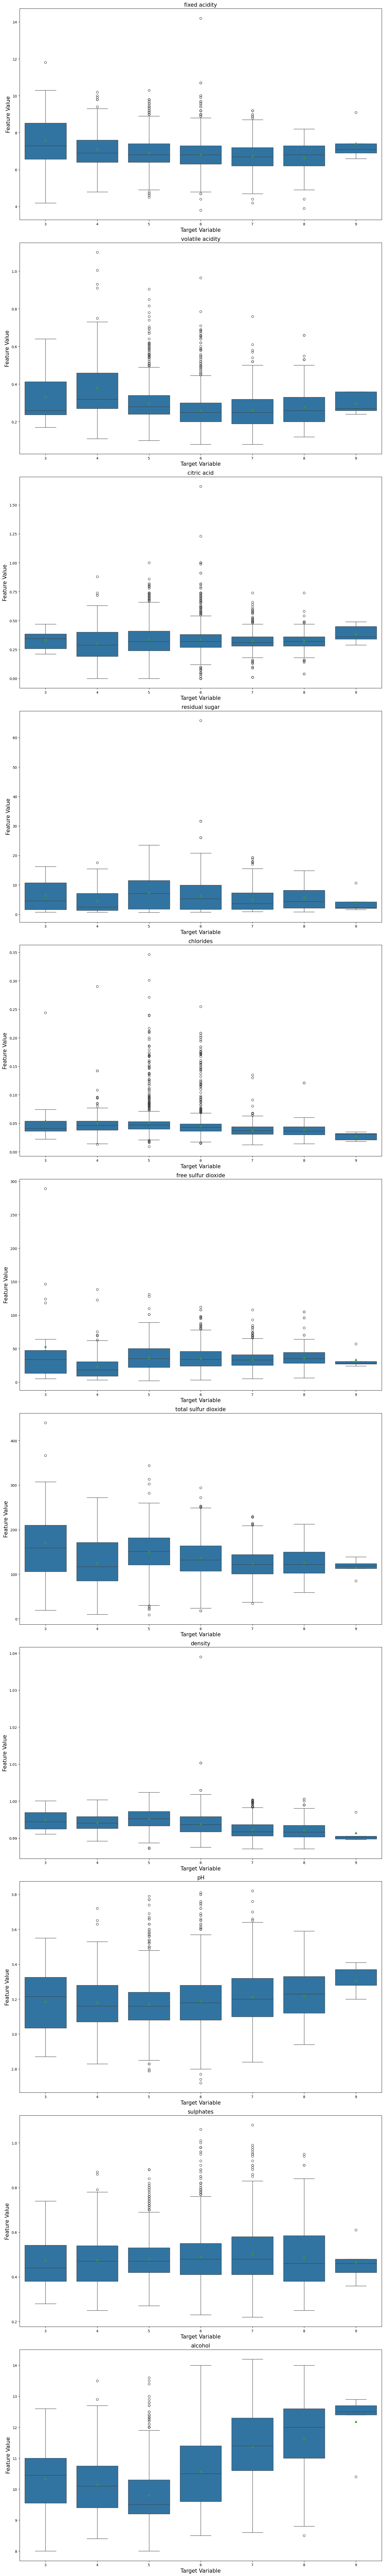

In [17]:

# Create the subplots
fig, axes = plt.subplots(nrows=df.shape[1] -1, ncols=1, figsize=(15, 100))

# Iterate over the features and create a boxplot for each one
for i, feature in enumerate(df.columns):
    if feature != 'quality':
        sns.boxplot(
            y = df[feature],
            x = df['quality'],
            showmeans=True,
            ax=axes[i]
        )

        # Set the title and labels for each subplot
        axes[i].set_title(feature,fontsize=15)
        axes[i].set_ylabel('Feature Value',fontsize=15)
        axes[i].set_xlabel('Target Variable',fontsize=15)

# Adjust the layout of the subplots
plt.tight_layout()

# Show the plot
plt.show()

## Outlier Handling

In [18]:
df_quart = df.loc[:, df.columns != 'Outcome'].groupby('quality').quantile([.25, .5,.75]).transpose()
df_quart

quality                       3                                 4            \
                           0.25        0.50        0.75      0.25      0.50   
fixed acidity           6.57500    7.300000    8.525000   6.40000    6.9000   
volatile acidity        0.23750    0.260000    0.412500   0.27000    0.3200   
citric acid             0.25750    0.345000    0.385000   0.19000    0.2900   
residual sugar          1.58750    4.600000   10.700000   1.30000    2.5000   
chlorides               0.03625    0.041000    0.054000   0.03800    0.0460   
free sulfur dioxide    13.25000   33.500000   47.500000   9.00000   18.0000   
total sulfur dioxide  105.75000  159.500000  210.000000  85.00000  117.0000   
density                 0.99252    0.994425    0.996922   0.99264    0.9941   
pH                      3.03500    3.215000    3.325000   3.07000    3.1600   
sulphates               0.38000    0.440000    0.542500   0.38000    0.4700   
alcohol                 9.55000   10.450000   11.000000   9.40000   10.1000   

quality                                 5                             6  ...  \
                           0.75      0.25      0.50      0.75      0.25  ...   
fixed acidity           7.60000    6.4000    6.8000    7.4000    6.3000  ...   
volatile acidity        0.46000    0.2400    0.2800    0.3400    0.2000  ...   
citric acid             0.40000    0.2400    0.3200    0.4100    0.2700  ...   
residual sugar          7.10000    1.8000    7.0000   11.5000    1.7000  ...   
chlorides               0.05400    0.0400    0.0470    0.0530    0.0360  ...   
free sulfur dioxide    30.50000   22.0000   35.0000   50.0000   24.0000  ...   
total sulfur dioxide  171.50000  121.0000  151.0000  182.0000  107.2500  ...   
density                 0.99584    0.9933    0.9953    0.9972    0.9917  ...   
pH                      3.28000    3.0800    3.1600    3.2400    3.0800  ...   
sulphates               0.54000    0.4200    0.4700    0.5300    0.4100  ...   
alcohol                10.75000    9.2000    9.5000   10.3000    9.6000  ...   

quality                                  7                                8  \
                           0.75       0.25       0.50      0.75        0.25   
fixed acidity           7.30000    6.20000    6.70000    7.2000    6.200000   
volatile acidity        0.30000    0.19000    0.25000    0.3200    0.200000   
citric acid             0.38000    0.28000    0.31000    0.3600    0.280000   
residual sugar          9.90000    1.70000    3.65000    7.3250    2.100000   
chlorides               0.04900    0.03100    0.03700    0.0440    0.030000   
free sulfur dioxide    46.00000   25.00000   33.00000   41.0000   28.000000   
total sulfur dioxide  164.00000  101.00000  122.00000  144.2500  102.500000   
density                 0.99587    0.99058    0.99176    0.9937    0.990305   
pH                      3.28000    3.10000    3.20000    3.3200    3.120000   
sulphates               0.55000    0.41000    0.48000    0.5800    0.380000   
alcohol                11.40000   10.60000   11.40000   12.3000   11.000000   

quality                                             9                       
                           0.50        0.75      0.25      0.50       0.75  
fixed acidity           6.80000    7.300000    6.9000    7.1000    7.40000  
volatile acidity        0.26000    0.330000    0.2600    0.2700    0.36000  
citric acid             0.32000    0.360000    0.3400    0.3600    0.45000  
residual sugar          4.30000    8.200000    2.0000    2.2000    4.20000  
chlorides               0.03600    0.044000    0.0210    0.0310    0.03200  
free sulfur dioxide    35.00000   44.500000   27.0000   28.0000   31.00000  
total sulfur dioxide  122.00000  150.000000  113.0000  119.0000  124.00000  
density                 0.99164    0.993485    0.9898    0.9903    0.99055  
pH                      3.23000    3.330000    3.2800    3.2800    3.37000  
sulphates               0.46000    0.585000    0.4200   

In [19]:
df_quart1 = df_quart.copy()

In [20]:
for i in df['quality'].unique():
    df_quart1.loc[:,(i,'IQR')] = df_quart1[i][0.75] - df_quart1[i][0.25]
df_quart1

quality                       3                                 4            \
                           0.25         0.5        0.75      0.25       0.5   
fixed acidity           6.57500    7.300000    8.525000   6.40000    6.9000   
volatile acidity        0.23750    0.260000    0.412500   0.27000    0.3200   
citric acid             0.25750    0.345000    0.385000   0.19000    0.2900   
residual sugar          1.58750    4.600000   10.700000   1.30000    2.5000   
chlorides               0.03625    0.041000    0.054000   0.03800    0.0460   
free sulfur dioxide    13.25000   33.500000   47.500000   9.00000   18.0000   
total sulfur dioxide  105.75000  159.500000  210.000000  85.00000  117.0000   
density                 0.99252    0.994425    0.996922   0.99264    0.9941   
pH                      3.03500    3.215000    3.325000   3.07000    3.1600   
sulphates               0.38000    0.440000    0.542500   0.38000    0.4700   
alcohol                 9.55000   10.450000   11.000000   9.40000   10.1000   

quality                                 5                             6  ...  \
                           0.75      0.25       0.5      0.75      0.25  ...   
fixed acidity           7.60000    6.4000    6.8000    7.4000    6.3000  ...   
volatile acidity        0.46000    0.2400    0.2800    0.3400    0.2000  ...   
citric acid             0.40000    0.2400    0.3200    0.4100    0.2700  ...   
residual sugar          7.10000    1.8000    7.0000   11.5000    1.7000  ...   
chlorides               0.05400    0.0400    0.0470    0.0530    0.0360  ...   
free sulfur dioxide    30.50000   22.0000   35.0000   50.0000   24.0000  ...   
total sulfur dioxide  171.50000  121.0000  151.0000  182.0000  107.2500  ...   
density                 0.99584    0.9933    0.9953    0.9972    0.9917  ...   
pH                      3.28000    3.0800    3.1600    3.2400    3.0800  ...   
sulphates               0.54000    0.4200    0.4700    0.5300    0.4100  ...   
alcohol                10.75000    9.2000    9.5000   10.3000    9.6000  ...   

quality                      9                              6        5  \
                          0.25       0.5       0.75       IQR      IQR   
fixed acidity           6.9000    7.1000    7.40000   1.00000   1.0000   
volatile acidity        0.2600    0.2700    0.36000   0.10000   0.1000   
citric acid             0.3400    0.3600    0.45000   0.11000   0.1700   
residual sugar          2.0000    2.2000    4.20000   8.20000   9.7000   
chlorides               0.0210    0.0310    0.03200   0.01300   0.0130   
free sulfur dioxide    27.0000   28.0000   31.00000  22.00000  28.0000   
total sulfur dioxide  113.0000  119.0000  124.00000  56.75000  61.0000   
density                 0.9898    0.9903    0.99055   0.00417   0.0039   
pH                      3.2800    3.2800    3.37000   0.20000   0.1600   
sulphates               0.4200    0.4600    0.48000   0.14000   0.1100   
alcohol                12.4000   12.5000   12.70000   1.80000   1.1000   

quality                      7         8        4           3         9  
                           IQR       IQR      IQR         IQR       IQR  
fixed acidity          1.00000   1.10000   1.2000    1.950000   0.50000  
volatile acidity       0.13000   0.13000   0.1900    0.175000   0.10000  
citric acid            0.08000   0.08000   0.2100    0.127500   0.11000  
residual sugar         5.62500   6.10000   5.8000    9.112500   2.20000  
chlorides              0.01300   0.01400   0.0160    0.017750   0.01100  
free sulfur dioxide   16.00000  16.50000  21.5000   34.250000   4.00000  
total sulfur dioxide  43.25000  47.50000  86.5000  104.250000  11.00000  
density                0.00312   0.00318   0.0032    0.004402   0.00075  
pH                     0.22000   0.21000   0.2100    0.290000   0.09000  
sulphates              0.17000   0.20500   0.1600    0.162500   0.06000  
alcohol                1.70000   1.60000   1.3500    1.450000   0.30000  

[11 r

In [21]:
for i in df['quality'].unique():

    df_quart1.loc[:,(i,'lower_cutoff')] = df_quart1[i][0.25] - 1.5*df_quart1[i]['IQR']
    df_quart1.loc[:,(i,'upper_cutoff')] = df_quart1[i][0.75] + 1.5*df_quart1[i]['IQR']
df_quart1

quality                       3                                 4            \
                           0.25         0.5        0.75      0.25       0.5   
fixed acidity           6.57500    7.300000    8.525000   6.40000    6.9000   
volatile acidity        0.23750    0.260000    0.412500   0.27000    0.3200   
citric acid             0.25750    0.345000    0.385000   0.19000    0.2900   
residual sugar          1.58750    4.600000   10.700000   1.30000    2.5000   
chlorides               0.03625    0.041000    0.054000   0.03800    0.0460   
free sulfur dioxide    13.25000   33.500000   47.500000   9.00000   18.0000   
total sulfur dioxide  105.75000  159.500000  210.000000  85.00000  117.0000   
density                 0.99252    0.994425    0.996922   0.99264    0.9941   
pH                      3.03500    3.215000    3.325000   3.07000    3.1600   
sulphates               0.38000    0.440000    0.542500   0.38000    0.4700   
alcohol                 9.55000   10.450000   11.000000   9.40000   10.1000   

quality                                 5                             6  ...  \
                           0.75      0.25       0.5      0.75      0.25  ...   
fixed acidity           7.60000    6.4000    6.8000    7.4000    6.3000  ...   
volatile acidity        0.46000    0.2400    0.2800    0.3400    0.2000  ...   
citric acid             0.40000    0.2400    0.3200    0.4100    0.2700  ...   
residual sugar          7.10000    1.8000    7.0000   11.5000    1.7000  ...   
chlorides               0.05400    0.0400    0.0470    0.0530    0.0360  ...   
free sulfur dioxide    30.50000   22.0000   35.0000   50.0000   24.0000  ...   
total sulfur dioxide  171.50000  121.0000  151.0000  182.0000  107.2500  ...   
density                 0.99584    0.9933    0.9953    0.9972    0.9917  ...   
pH                      3.28000    3.0800    3.1600    3.2400    3.0800  ...   
sulphates               0.54000    0.4200    0.4700    0.5300    0.4100  ...   
alcohol                10.75000    9.2000    9.5000   10.3000    9.6000  ...   

quality                         7                         8               \
                     lower_cutoff upper_cutoff lower_cutoff upper_cutoff   
fixed acidity              4.7000      8.70000     4.550000     8.950000   
volatile acidity          -0.0050      0.51500     0.005000     0.525000   
citric acid                0.1600      0.48000     0.160000     0.480000   
residual sugar            -6.7375     15.76250    -7.050000    17.350000   
chlorides                  0.0115      0.06350     0.009000     0.065000   
free sulfur dioxide        1.0000     65.00000     3.250000    69.250000   
total sulfur dioxide      36.1250    209.12500    31.250000   221.250000   
density                    0.9859      0.99838     0.985535     0.998255   
pH                         2.7700      3.65000     2.805000     3.645000   
sulphates                  0.1550      0.83500     0.072500     0.892500   
alcohol                    8.0500     14.85000     8.600000    15.000000   

quality                         4                         3               \
                     lower_cutoff upper_cutoff lower_cutoff upper_cutoff   
fixed acidity             4.60000      9.40000     3.650000    11.450000   
volatile acidity         -0.01500      0.74500    -0.025000     0.675000   
citric acid              -0.12500      0.71500     0.066250     0.576250   
residual sugar           -7.40000     15.80000   -12.081250    24.368750   
chlorides                 0.01400      0.07800     0.009625     0.080625   
free sulfur dioxide     -23.25000     62.75000   -38.125000    98.875000   
total sulfur dioxide    -44.75000    301.25000   -50.625000   366.375000   
density                   0.98784      1.00064     0.985916     1.003526   
pH                        2.75500      3.59500     2.600000     3.760000   
sulphates                 0.14000      0.78000     0.136250     0.786250   
alcohol                   7.37

In [22]:
df_quart1.get((3,0.25))

fixed acidity             6.57500
volatile acidity          0.23750
citric acid               0.25750
residual sugar            1.58750
chlorides                 0.03625
free sulfur dioxide      13.25000
total sulfur dioxide    105.75000
density                   0.99252
pH                        3.03500
sulphates                 0.38000
alcohol                   9.55000
Name: (3, 0.25), dtype: float64

In [23]:
print("NUMBER OF OUTLIERS in each group")
print("=====================================")
total_out =[]
for x in df.loc[:, df.columns != 'quality'].columns:
    print("For "+x+":")
    sum=0
    for i in df['quality'].unique():
        print(f"\tQuality value = {i}")
        count = df[x][(df[x] < df_quart1[i]['lower_cutoff'].loc[x]) | (df[x] > df_quart1[i]['upper_cutoff'].loc[x]) ].count()
        print("\t",count)
        sum+=count
        
        print()
    total_out.append((x,sum))
    print(f"Total Outliers for {x} = {sum}\n")

NUMBER OF OUTLIERS in each group
For fixed acidity:
	Quality value = 6
	 119

	Quality value = 5
	 112

	Quality value = 7
	 132

	Quality value = 8
	 97

	Quality value = 4
	 51

	Quality value = 3
	 2

	Quality value = 9
	 1251

Total Outliers for fixed acidity = 1764

For volatile acidity:
	Quality value = 6
	 281

	Quality value = 5
	 177

	Quality value = 7
	 146

	Quality value = 8
	 136

	Quality value = 4
	 13

	Quality value = 3
	 27

	Quality value = 9
	 177

Total Outliers for volatile acidity = 957

For citric acid:
	Quality value = 6
	 330

	Quality value = 5
	 104

	Quality value = 7
	 822

	Quality value = 8
	 822

	Quality value = 4
	 73

	Quality value = 3
	 242

	Quality value = 9
	 389

Total Outliers for citric acid = 2782

For residual sugar:
	Quality value = 6
	 7

	Quality value = 5
	 5

	Quality value = 7
	 239

	Quality value = 8
	 131

	Quality value = 4
	 239

	Quality value = 3
	 5

	Quality value = 9
	 1794

Total Outliers for residual sugar = 2420

For chl

In [24]:
total_out

[('fixed acidity', 1764),
 ('volatile acidity', 957),
 ('citric acid', 2782),
 ('residual sugar', 2420),
 ('chlorides', 2878),
 ('free sulfur dioxide', 3606),
 ('total sulfur dioxide', 3505),
 ('density', 4668),
 ('pH', 2529),
 ('sulphates', 1790),
 ('alcohol', 5335)]

## Handling Outliers

Only handling outliers for the the highly varied  features

In [25]:

for x in df.loc[:, df.columns != 'quality'].columns:
    for i in df['quality'].unique():
        df1= pd.DataFrame()
        df1 = df[(df[x] > df_quart1[i]['lower_cutoff'].loc[x]) & (df[x] < df_quart1[i]['upper_cutoff'].loc[x]) ]
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 731 entries, 10 to 4896
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         731 non-null    float64
 1   volatile acidity      731 non-null    float64
 2   citric acid           731 non-null    float64
 3   residual sugar        731 non-null    float64
 4   chlorides             731 non-null    float64
 5   free sulfur dioxide   731 non-null    float64
 6   total sulfur dioxide  731 non-null    float64
 7   density               731 non-null    float64
 8   pH                    731 non-null    float64
 9   sulphates             731 non-null    float64
 10  alcohol               731 non-null    float64
 11  quality               731 non-null    int64  
dtypes: float64(11), int64(1)
memory usage: 74.2 KB


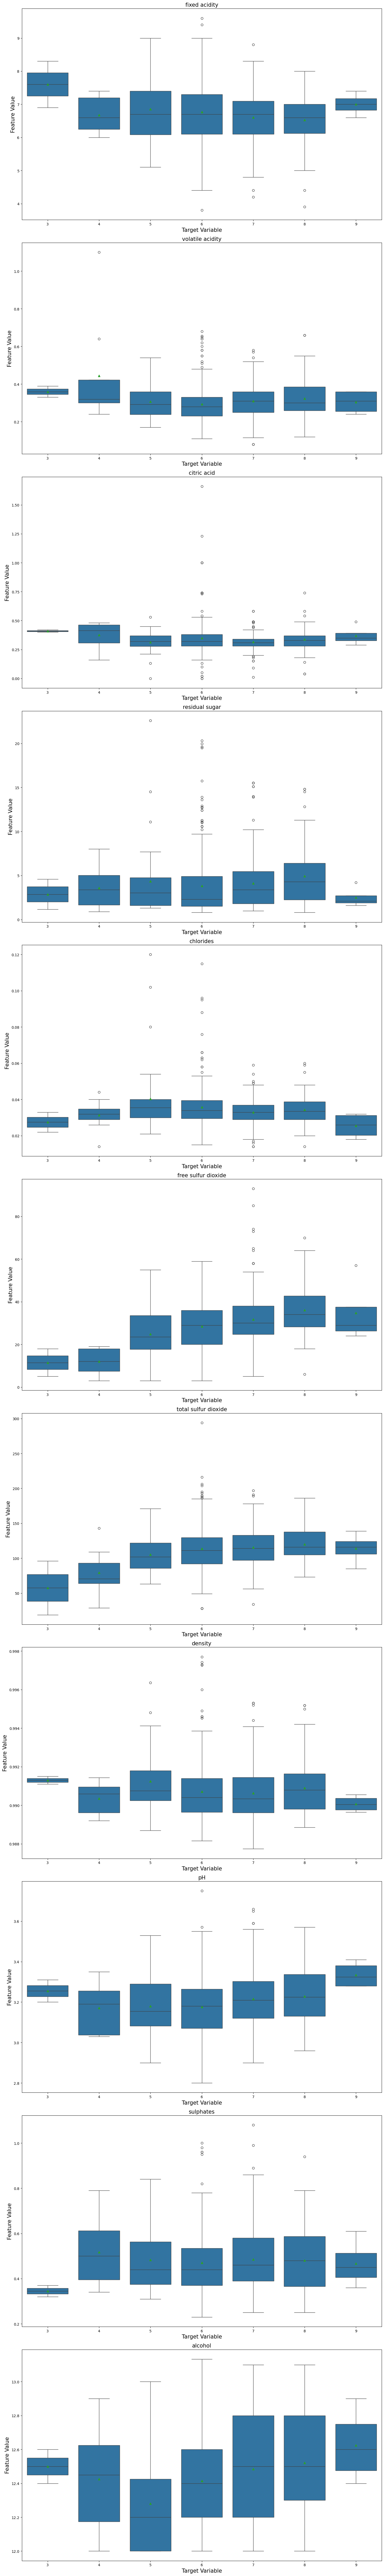

In [26]:
# Create the subplots
fig, axes = plt.subplots(nrows=df.shape[1] -1, ncols=1, figsize=(15, 100))

# Iterate over the features and create a boxplot for each one
for i, feature in enumerate(df1.columns):
    if feature != 'quality':
        sns.boxplot(
            y = df1[feature],
            x = df1['quality'],
            showmeans=True,
            ax=axes[i]
        )

        # Set the title and labels for each subplot
        axes[i].set_title(feature,fontsize=15)
        axes[i].set_ylabel('Feature Value',fontsize=15)
        axes[i].set_xlabel('Target Variable',fontsize=15)

# Adjust the layout of the subplots
plt.tight_layout()

# Show the plot
plt.show()

### Insight:
- While this does get rid of all possible outliers from each group, it reduceds the data to 15% of the original, which is quite substantial. 
- Therefore we will only remove outliers by grouping them by quality for the ones with the MOST outliers after the default process.

## Default way

In [27]:
df_quart = df.loc[:, df.columns != 'quality'].quantile([.25, .5,.75]).transpose()
df_quart

0.25       0.50      0.75
fixed acidity           6.300000    6.80000    7.3000
volatile acidity        0.210000    0.26000    0.3200
citric acid             0.270000    0.32000    0.3900
residual sugar          1.700000    5.20000    9.9000
chlorides               0.036000    0.04300    0.0500
free sulfur dioxide    23.000000   34.00000   46.0000
total sulfur dioxide  108.000000  134.00000  167.0000
density                 0.991723    0.99374    0.9961
pH                      3.090000    3.18000    3.2800
sulphates               0.410000    0.47000    0.5500
alcohol                 9.500000   10.40000   11.4000

In [28]:
df_quart['IQR'] = df_quart[0.75] - df_quart[0.25]
df_quart

0.25        0.5      0.75        IQR
fixed acidity           6.300000    6.80000    7.3000   1.000000
volatile acidity        0.210000    0.26000    0.3200   0.110000
citric acid             0.270000    0.32000    0.3900   0.120000
residual sugar          1.700000    5.20000    9.9000   8.200000
chlorides               0.036000    0.04300    0.0500   0.014000
free sulfur dioxide    23.000000   34.00000   46.0000  23.000000
total sulfur dioxide  108.000000  134.00000  167.0000  59.000000
density                 0.991723    0.99374    0.9961   0.004377
pH                      3.090000    3.18000    3.2800   0.190000
sulphates               0.410000    0.47000    0.5500   0.140000
alcohol                 9.500000   10.40000   11.4000   1.900000

In [29]:
df_quart['lower_cutoff'] = df_quart[0.25] - 1.5*df_quart['IQR']
df_quart['UPPER_cutoff'] = df_quart[0.75] + 1.5*df_quart['IQR']
df_quart

0.25        0.5      0.75        IQR  \
fixed acidity           6.300000    6.80000    7.3000   1.000000   
volatile acidity        0.210000    0.26000    0.3200   0.110000   
citric acid             0.270000    0.32000    0.3900   0.120000   
residual sugar          1.700000    5.20000    9.9000   8.200000   
chlorides               0.036000    0.04300    0.0500   0.014000   
free sulfur dioxide    23.000000   34.00000   46.0000  23.000000   
total sulfur dioxide  108.000000  134.00000  167.0000  59.000000   
density                 0.991723    0.99374    0.9961   0.004377   
pH                      3.090000    3.18000    3.2800   0.190000   
sulphates               0.410000    0.47000    0.5500   0.140000   
alcohol                 9.500000   10.40000   11.4000   1.900000   

                      lower_cutoff  UPPER_cutoff  
fixed acidity             4.800000      8.800000  
volatile acidity          0.045000      0.485000  
citric acid               0.090000      0.570000  
residual sugar          -10.600000     22.200000  
chlorides                 0.015000      0.071000  
free sulfur dioxide     -11.500000     80.500000  
total sulfur dioxide     19.500000    255.500000  
density                   0.985156      1.002666  
pH                        2.805000      3.565000  
sulphates                 0.200000      0.760000  
alcohol                   6.650000     14.250000

In [30]:
print("NUMBER OF OUTLIERS")
print("=====================================")
for x in df.loc[:, df.columns != 'quality'].columns: 
    print("For "+x+":")
    print(df[x][(df[x] < df_quart['lower_cutoff'].loc[x]) | (df[x] > df_quart['UPPER_cutoff'].loc[x]) ].count())
    print()

NUMBER OF OUTLIERS
For fixed acidity:
119

For volatile acidity:
186

For citric acid:
270

For residual sugar:
7

For chlorides:
208

For free sulfur dioxide:
50

For total sulfur dioxide:
19

For density:
5

For pH:
75

For sulphates:
124

For alcohol:
0



In [31]:
# Let's Deal with the outliers 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [32]:
for x in ['sulphates','chlorides','citric acid','pH','fixed acidity','volatile acidity']:
    df2=pd.DataFrame()
    df2 = df[(df[x] > df_quart['lower_cutoff'].loc[x]) & (df[x] < df_quart['UPPER_cutoff'].loc[x]) ]
df2

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0              0.27         0.36            20.7      0.045   
1               6.3              0.30         0.34             1.6      0.049   
2               8.1              0.28         0.40             6.9      0.050   
3               7.2              0.23         0.32             8.5      0.058   
4               7.2              0.23         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    45.0                 170.0  1.00100  3.00       0.45   
1                    14.0                 132.0  0.99400  3.30       0.49   
2                    30.0                  97.0  0.99510  3.26       0.44   
3                    47.0                 186.0  0.99560  3.19       0.40   
4                    47.0                 186.0  0.99560  3.19       0.40   
...                   ...                   ...      ...   ...        ...   
4893                 24.0                  92.0  0.99114  3.27       0.50   
4894                 57.0                 168.0  0.99490  3.15       0.46   
4895                 30.0                 111.0  0.99254  2.99       0.46   
4896                 20.0                 110.0  0.98869  3.34       0.38   
4897                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  quality  
0         8.8        6  
1         9.5        6  
2        10.1        6  
3         9.9        6  
4         9.9        6  
...       ...      ...  
4893     11.2        6  
4894      9.6        5  
4895      9.4        6  
4896     12.8        7  
4897     11.8        6  

[4712 rows x 12 columns]

In [33]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4712 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4712 non-null   float64
 1   volatile acidity      4712 non-null   float64
 2   citric acid           4712 non-null   float64
 3   residual sugar        4712 non-null   float64
 4   chlorides             4712 non-null   float64
 5   free sulfur dioxide   4712 non-null   float64
 6   total sulfur dioxide  4712 non-null   float64
 7   density               4712 non-null   float64
 8   pH                    4712 non-null   float64
 9   sulphates             4712 non-null   float64
 10  alcohol               4712 non-null   float64
 11  quality               4712 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 478.6 KB


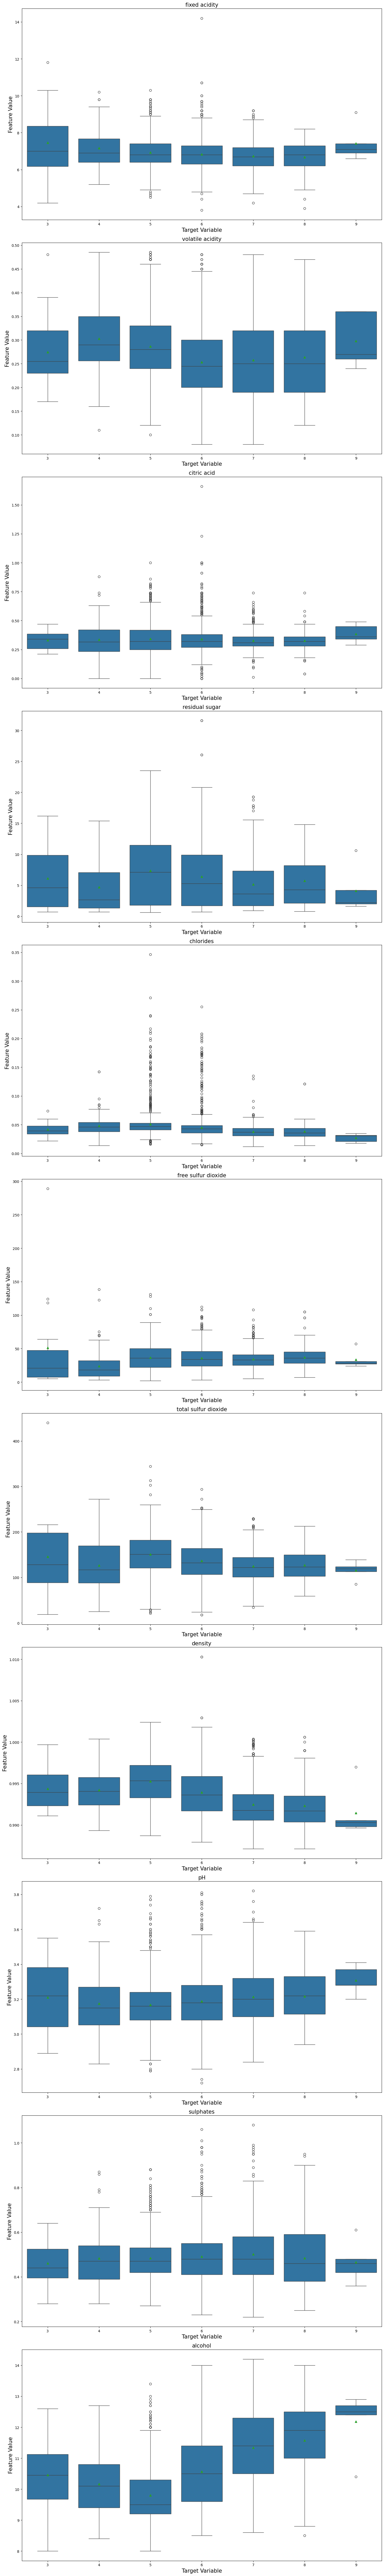

In [34]:

# Create the subplots
fig, axes = plt.subplots(nrows=df.shape[1] -1, ncols=1, figsize=(15, 100))

# Iterate over the features and create a boxplot for each one
for i, feature in enumerate(df2.columns):
    if feature != 'quality':
        sns.boxplot(
            y = df2[feature],
            x = df2['quality'],
            showmeans=True,
            ax=axes[i]
        )

        # Set the title and labels for each subplot
        axes[i].set_title(feature,fontsize=15)
        axes[i].set_ylabel('Feature Value',fontsize=15)
        axes[i].set_xlabel('Target Variable',fontsize=15)

# Adjust the layout of the subplots
plt.tight_layout()

# Show the plot
plt.show()

In [35]:
for x in ['chlorides','pH']:
    for i in [5,6,7]:
        
        df2 = df2[(df2[x] > df_quart1[i]['lower_cutoff'].loc[x]) & (df2[x] < df_quart1[i]['upper_cutoff'].loc[x]) ]
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4219 entries, 0 to 4896
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4219 non-null   float64
 1   volatile acidity      4219 non-null   float64
 2   citric acid           4219 non-null   float64
 3   residual sugar        4219 non-null   float64
 4   chlorides             4219 non-null   float64
 5   free sulfur dioxide   4219 non-null   float64
 6   total sulfur dioxide  4219 non-null   float64
 7   density               4219 non-null   float64
 8   pH                    4219 non-null   float64
 9   sulphates             4219 non-null   float64
 10  alcohol               4219 non-null   float64
 11  quality               4219 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 428.5 KB


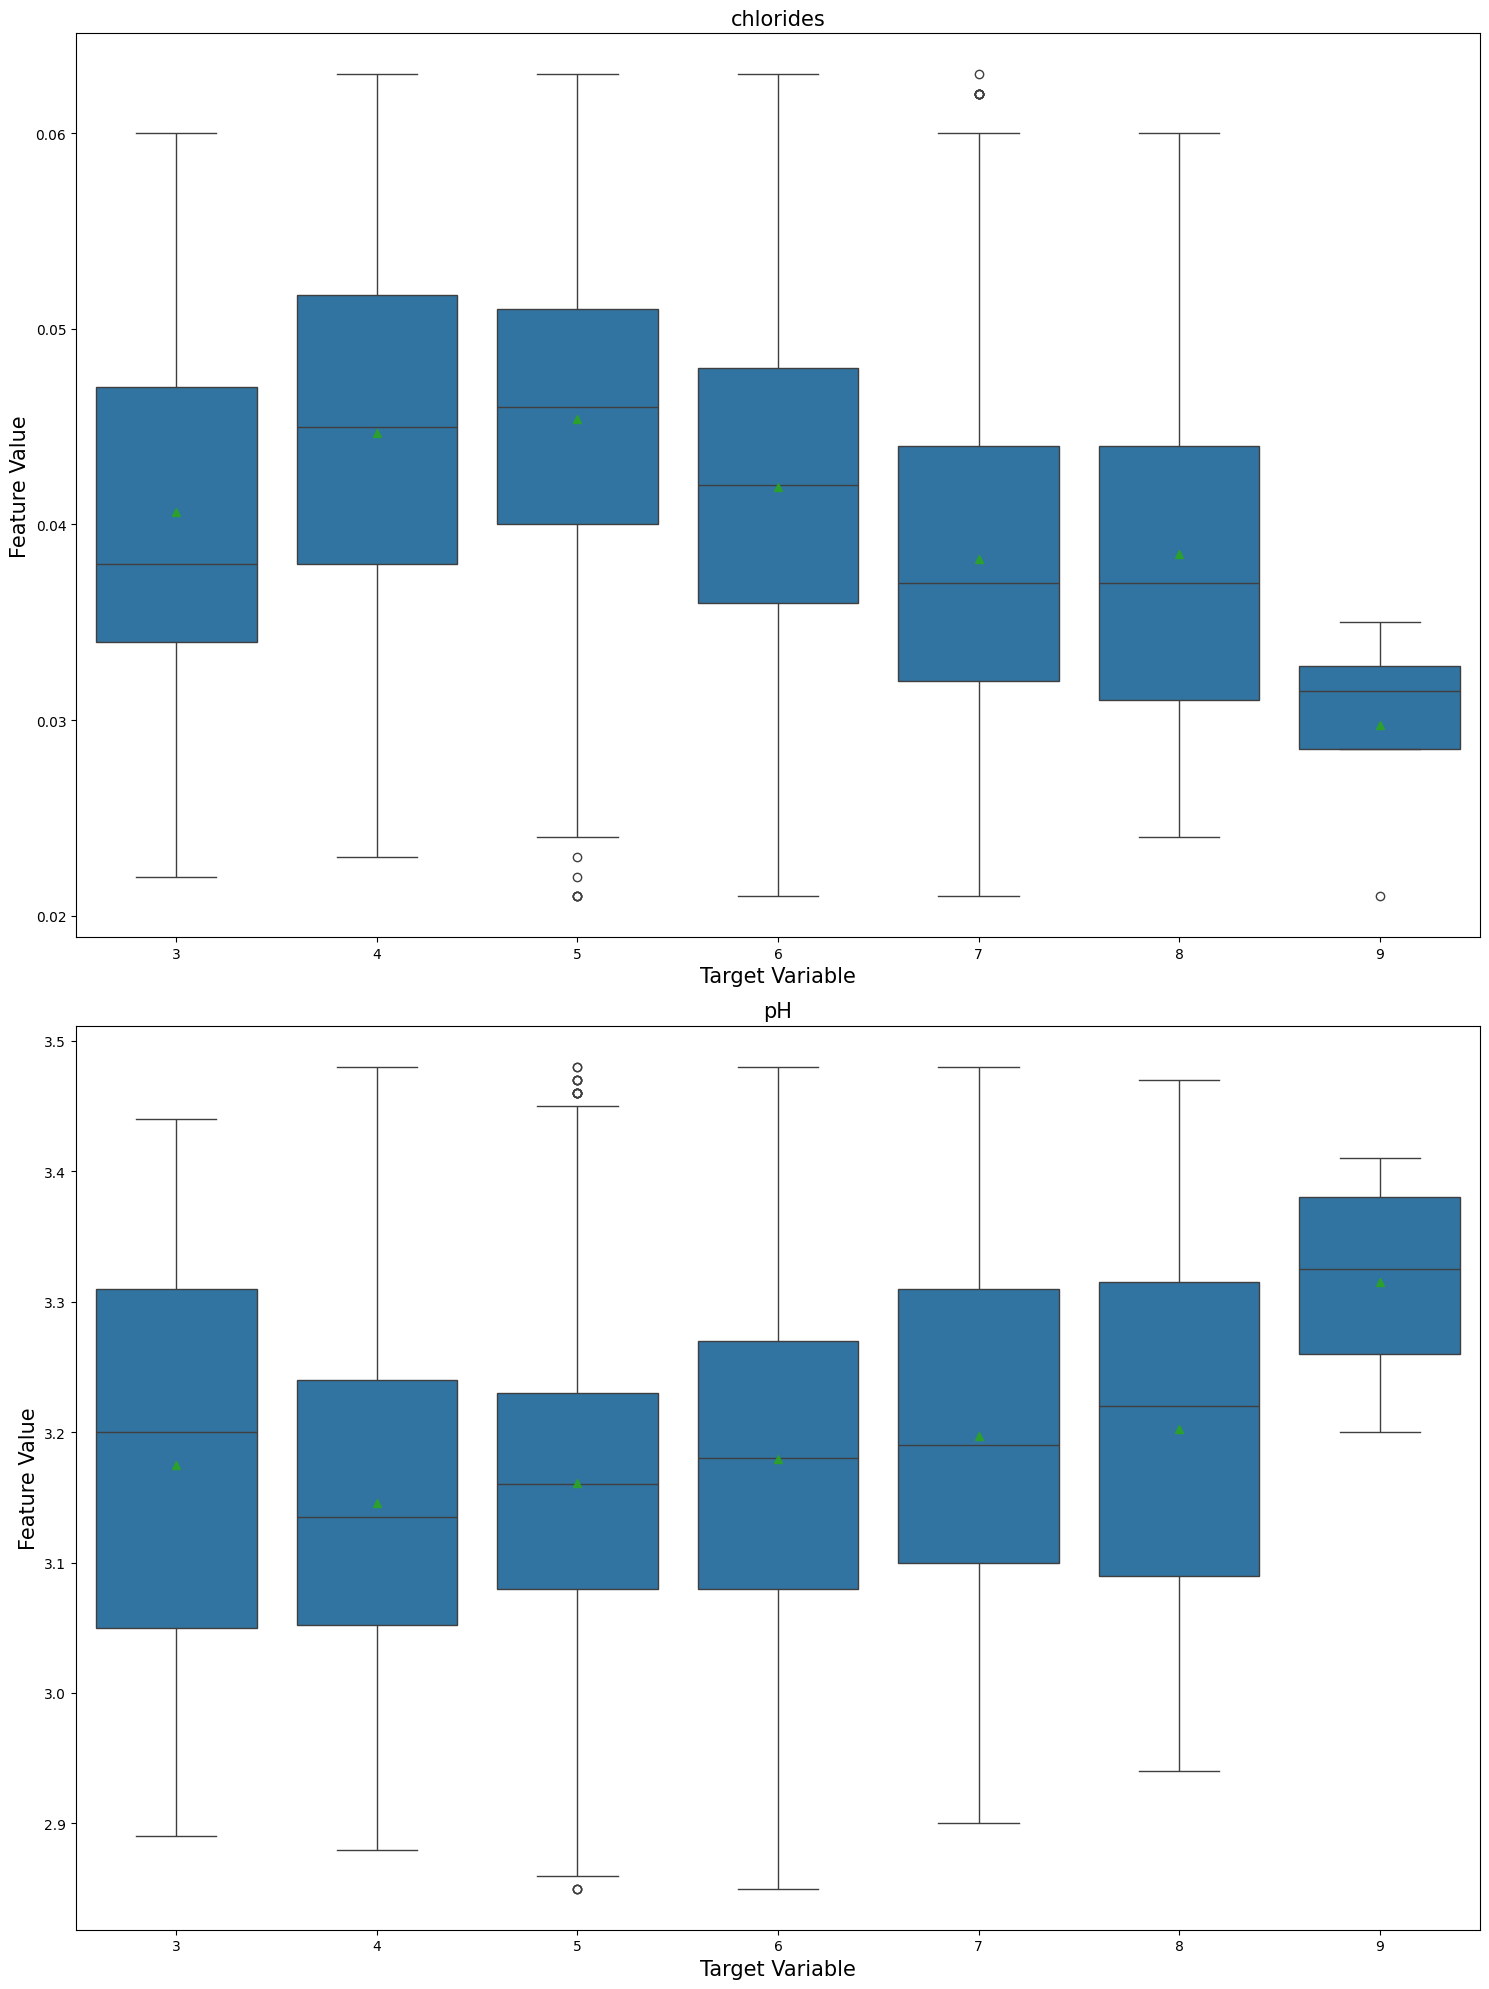

In [36]:

# Create the subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 20))

# Iterate over the features and create a boxplot for each one
for i, feature in enumerate(['chlorides','pH']):
    if feature != 'quality':
        sns.boxplot(
            y = df2[feature],
            x = df2['quality'],
            showmeans=True,
            ax=axes[i]
        )

        # Set the title and labels for each subplot
        axes[i].set_title(feature,fontsize=15)
        axes[i].set_ylabel('Feature Value',fontsize=15)
        axes[i].set_xlabel('Target Variable',fontsize=15)

# Adjust the layout of the subplots
plt.tight_layout()

# Show the plot
plt.show()

## Feature Selection

In [37]:
cor = df2.corr(numeric_only = True)
cor

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.038222     0.308677   
volatile acidity          -0.038222          1.000000    -0.104309   
citric acid                0.308677         -0.104309     1.000000   
residual sugar             0.062903          0.067611     0.094855   
chlorides                  0.092229         -0.040161     0.032188   
free sulfur dioxide       -0.055845         -0.062457     0.078142   
total sulfur dioxide       0.086794          0.109329     0.119998   
density                    0.256693         -0.007571     0.152139   
pH                        -0.395829         -0.024525    -0.161637   
sulphates                 -0.014824         -0.055629     0.074985   
alcohol                   -0.115666          0.101010    -0.070840   
quality                   -0.112437         -0.133936    -0.036459   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity               0.062903   0.092229            -0.055845   
volatile acidity            0.067611  -0.040161            -0.062457   
citric acid                 0.094855   0.032188             0.078142   
residual sugar              1.000000   0.285509             0.319343   
chlorides                   0.285509   1.000000             0.164180   
free sulfur dioxide         0.319343   0.164180             1.000000   
total sulfur dioxide        0.408536   0.359146             0.621429   
density                     0.848438   0.496752             0.312577   
pH                         -0.185735  -0.034401            -0.001322   
sulphates                  -0.034172   0.056643             0.066287   
alcohol                    -0.493410  -0.545808            -0.256162   
quality                    -0.113662  -0.266609             0.000157   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                     0.086794  0.256693 -0.395829  -0.014824   
volatile acidity                  0.109329 -0.007571 -0.024525  -0.055629   
citric acid                       0.119998  0.152139 -0.161637   0.074985   
residual sugar                    0.408536  0.848438 -0.185735  -0.034172   
chlorides                         0.359146  0.496752 -0.034401   0.056643   
free sulfur dioxide               0.621429  0.312577 -0.001322   0.066287   
total sulfur dioxide              1.000000  0.534089 -0.005221   0.124312   
density                           0.534089  1.000000 -0.104638   0.068129   
pH                               -0.005221 -0.104638  1.000000   0.125662   
sulphates                         0.124312  0.068129  0.125662   1.000000   
alcohol                          -0.456280 -0.814017  0.110993  -0.038574   
quality                          -0.172626 -0.308730  0.107652   0.052843   

                       alcohol   quality  
fixed acidity        -0.115666 -0.112437  
volatile acidity      0.101010 -0.133936  
citric acid          -0.070840 -0.036459  
residual sugar       -0.493410 -0.113662  
chlorides            -0.545808 -0.266609  
free sulfur dioxide  -0.256162  0.000157  
total sulfur dioxide -0.456280 -0.172626  
density              -0.814017 -0.308730  
pH                    0.110993  0.107652  
sulphates            -0.038574  0.052843  
alcohol               1.000000  0.427422  
quality               0.427422  1.000000

<Axes: >

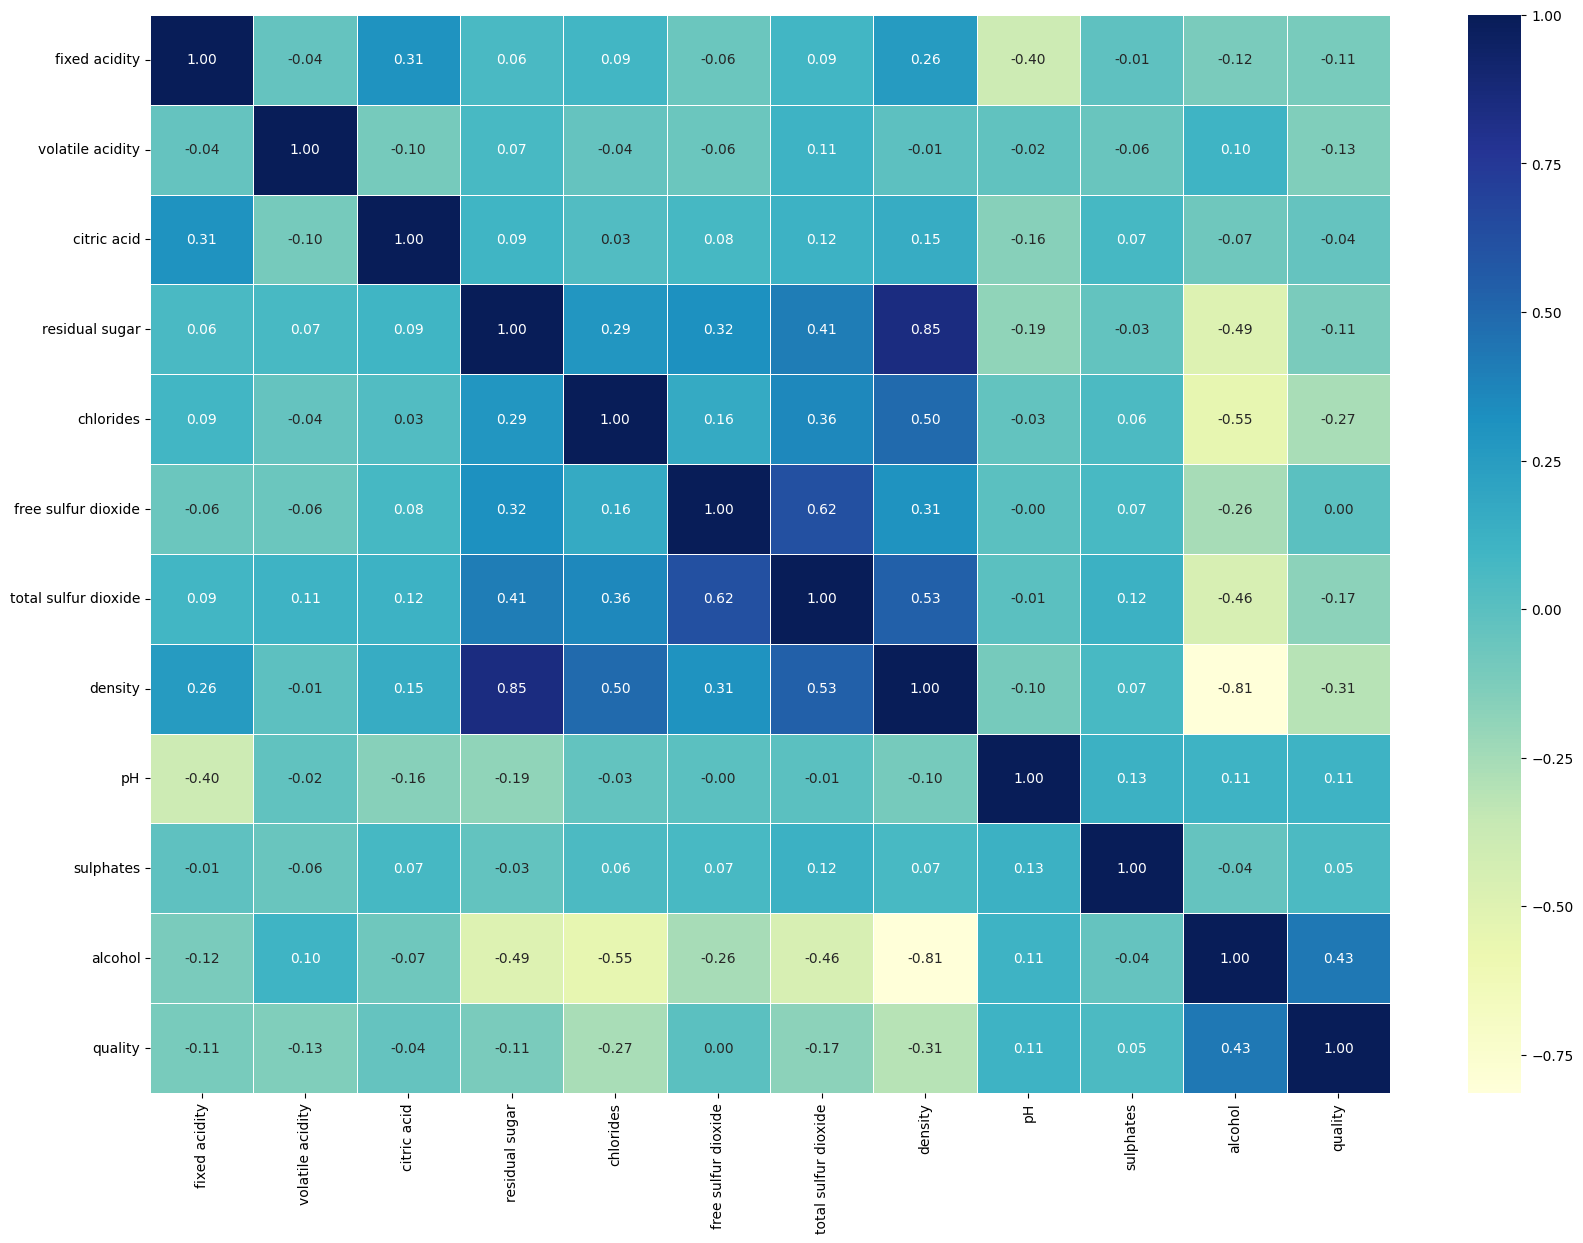

In [38]:
plt.figure(figsize=(20,14)) 
sns.heatmap(cor, annot=True, linewidths=.5, fmt=".2f", cmap="YlGnBu")

### Insight:
- There are some highly correalted features here, like density and residual sugar (0.848438 )
- There are also fields like free sulfur dioxide and total sulfur dioxide that are correlated (0.621429	)
- Let's create a new field combining those 2 and see if it has a better correlation with the target Varible.

In [39]:
df2['sulfur dioxide ratio'] = df2['free sulfur dioxide']/df2['total sulfur dioxide']
df2.corr(numeric_only = True)

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.038222     0.308677   
volatile acidity          -0.038222          1.000000    -0.104309   
citric acid                0.308677         -0.104309     1.000000   
residual sugar             0.062903          0.067611     0.094855   
chlorides                  0.092229         -0.040161     0.032188   
free sulfur dioxide       -0.055845         -0.062457     0.078142   
total sulfur dioxide       0.086794          0.109329     0.119998   
density                    0.256693         -0.007571     0.152139   
pH                        -0.395829         -0.024525    -0.161637   
sulphates                 -0.014824         -0.055629     0.074985   
alcohol                   -0.115666          0.101010    -0.070840   
quality                   -0.112437         -0.133936    -0.036459   
sulfur dioxide ratio      -0.147128         -0.182709    -0.003207   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity               0.062903   0.092229            -0.055845   
volatile acidity            0.067611  -0.040161            -0.062457   
citric acid                 0.094855   0.032188             0.078142   
residual sugar              1.000000   0.285509             0.319343   
chlorides                   0.285509   1.000000             0.164180   
free sulfur dioxide         0.319343   0.164180             1.000000   
total sulfur dioxide        0.408536   0.359146             0.621429   
density                     0.848438   0.496752             0.312577   
pH                         -0.185735  -0.034401            -0.001322   
sulphates                  -0.034172   0.056643             0.066287   
alcohol                    -0.493410  -0.545808            -0.256162   
quality                    -0.113662  -0.266609             0.000157   
sulfur dioxide ratio        0.072466  -0.082938             0.744352   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                     0.086794  0.256693 -0.395829  -0.014824   
volatile acidity                  0.109329 -0.007571 -0.024525  -0.055629   
citric acid                       0.119998  0.152139 -0.161637   0.074985   
residual sugar                    0.408536  0.848438 -0.185735  -0.034172   
chlorides                         0.359146  0.496752 -0.034401   0.056643   
free sulfur dioxide               0.621429  0.312577 -0.001322   0.066287   
total sulfur dioxide              1.000000  0.534089 -0.005221   0.124312   
density                           0.534089  1.000000 -0.104638   0.068129   
pH                               -0.005221 -0.104638  1.000000   0.125662   
sulphates                         0.124312  0.068129  0.125662   1.000000   
alcohol                          -0.456280 -0.814017  0.110993  -0.038574   
quality                          -0.172626 -0.308730  0.107652   0.052843   
sulfur dioxide ratio             -0.000620 -0.044523  0.008329  -0.003412   

                       alcohol   quality  sulfur dioxide ratio  
fixed acidity        -0.115666 -0.112437             -0.147128  
volatile acidity      0.101010 -0.133936             -0.182709  
citric acid          -0.070840 -0.036459             -0.003207  
residual sugar       -0.493410 -0.113662              0.072466  
chlorides            -0.545808 -0.266609             -0.082938  
free sulfur dioxide  -0.256162  0.000157              0.744352  
total sulfur dioxide -0.456280 -0.172626             -0.000620  
density              -0.814017 -0.308730             -0.044523  
pH                    0.110993  0.107652              0.008329  
sulphates            -0.038574  0.052843             -0.003412  
alcohol               1.000000  0.427422              0.057609  
quality               0.427422  1.000000              0.191709  
sulfur dioxide ratio  0.057609  0.191709              1.000000

##### The correaltion of the ratio has improved with the addition of this feature (0.19), let's now do feature selection to check if we should remove the other features.

## Test-Train Split of Input Dataset

In [40]:
# Putting feature variable to X

X = df2.drop(['quality'], axis=1)
y = df2['quality']

In [41]:
# order is important
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100,stratify = y)

In [42]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train[x_train.columns] = scaler.fit_transform(x_train[x_train.columns])

x_test[x_test.columns] = scaler.transform(x_test[x_test.columns])

In [43]:
x_train_df = x_train
x_test_df = x_test
print(x_test_df.shape)
print(x_train_df.shape)

(1266, 12)
(2953, 12)


In [44]:
print(y_test.shape)
print(y_train.shape)

(1266,)
(2953,)


#### Check for missing values , if imputer is required

In [45]:
x_train_df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
sulfur dioxide ratio    0
dtype: int64

In [78]:
x_test_df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
sulfur dioxide ratio    0
dtype: int64

The previous NaN values must have been removed while handling the outliers.

###  Feature selection using stats model

In [46]:
from statsmodels.discrete.discrete_model import MNLogit
def build_model(X,y):
    X = sm.add_constant(X) # Adding the constant
    lm = MNLogit(y,X).fit() # fitting the model  sm.OLS.fit_regularized(y,x)
    print(lm.summary())    # model summary
    return lm

def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [47]:
model1=build_model(x_train_df,y_train)

Optimization terminated successfully.
         Current function value: 1.059508
         Iterations 15
                          MNLogit Regression Results                          
Dep. Variable:                quality   No. Observations:                 2953
Model:                        MNLogit   Df Residuals:                     2875
Method:                           MLE   Df Model:                           72
Date:                Sun, 19 May 2024   Pseudo R-squ.:                  0.1635
Time:                        20:47:07   Log-Likelihood:                -3128.7
converged:                       True   LL-Null:                       -3740.3
Covariance Type:            nonrobust   LLR p-value:                8.441e-209
           quality=4       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    2.1506      4.377      0.491      0.623      -6.429      10.73

In [81]:
checkVIF(x_train_df)

Features     VIF
7                density  176.10
5    free sulfur dioxide   77.49
6   total sulfur dioxide   65.65
11  sulfur dioxide ratio   62.09
10               alcohol   33.12
3         residual sugar   29.72
0          fixed acidity   28.30
8                     pH   14.15
2            citric acid   10.85
4              chlorides    9.84
1       volatile acidity    7.44
9              sulphates    7.04

 ##### insight:
 As we can see density and chlorides have high VIF and high p-value for a lot of the quality values, let's drop it and check
 
 - Since density has higher we will remove that first.
 

In [82]:
# Since density has both a high VIF and p-value let's remove it
x_train_den = x_train_df.drop(["density"],axis=1)

In [83]:
model2=build_model(x_train_den,y_train)

Optimization terminated successfully.
         Current function value: 1.066181
         Iterations 15
                          MNLogit Regression Results                          
Dep. Variable:                quality   No. Observations:                 2953
Model:                        MNLogit   Df Residuals:                     2881
Method:                           MLE   Df Model:                           66
Date:                Sun, 19 May 2024   Pseudo R-squ.:                  0.1582
Time:                        07:27:28   Log-Likelihood:                -3148.4
converged:                       True   LL-Null:                       -3740.3
Covariance Type:            nonrobust   LLR p-value:                1.830e-204
           quality=4       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    2.3599      3.358      0.703      0.482      -4.221       8.94

In [84]:
checkVIF(x_train_den)

Features    VIF
5    free sulfur dioxide  63.94
10  sulfur dioxide ratio  50.43
6   total sulfur dioxide  49.63
0          fixed acidity  11.46
2            citric acid  10.48
9                alcohol   9.11
4              chlorides   8.66
7                     pH   7.97
1       volatile acidity   7.17
8              sulphates   6.36
3         residual sugar   3.46

In [85]:
# Trying removing free sulfur dioxide
x_train_fsd = x_train_den.drop(["free sulfur dioxide"],axis=1)

In [86]:
model3=build_model(x_train_fsd,y_train)

Optimization terminated successfully.
         Current function value: 1.073429
         Iterations 15
                          MNLogit Regression Results                          
Dep. Variable:                quality   No. Observations:                 2953
Model:                        MNLogit   Df Residuals:                     2887
Method:                           MLE   Df Model:                           60
Date:                Sun, 19 May 2024   Pseudo R-squ.:                  0.1525
Time:                        07:27:28   Log-Likelihood:                -3169.8
converged:                       True   LL-Null:                       -3740.3
Covariance Type:            nonrobust   LLR p-value:                1.772e-199
           quality=4       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    5.3109      2.934      1.810      0.070      -0.441      11.06

In [87]:
checkVIF(x_train_fsd)

Features    VIF
5  total sulfur dioxide  12.81
0         fixed acidity  10.40
2           citric acid  10.39
4             chlorides   8.06
8               alcohol   7.65
6                    pH   7.30
1      volatile acidity   7.00
9  sulfur dioxide ratio   6.94
7             sulphates   6.25
3        residual sugar   3.44

In [88]:
# Removing Citric Acid since it is high VIF and p value for almost all quality values
# Trying removing free sulfur dioxide
x_train_cia = x_train_fsd.drop(["citric acid"],axis=1)

In [89]:
model4=build_model(x_train_cia,y_train)

Optimization terminated successfully.
         Current function value: 1.074280
         Iterations 15
                          MNLogit Regression Results                          
Dep. Variable:                quality   No. Observations:                 2953
Model:                        MNLogit   Df Residuals:                     2893
Method:                           MLE   Df Model:                           54
Date:                Sun, 19 May 2024   Pseudo R-squ.:                  0.1519
Time:                        07:27:29   Log-Likelihood:                -3172.4
converged:                       True   LL-Null:                       -3740.3
Covariance Type:            nonrobust   LLR p-value:                2.296e-202
           quality=4       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    6.1052      2.790      2.188      0.029       0.636      11.57

In [90]:
checkVIF(x_train_cia)

Features    VIF
4  total sulfur dioxide  12.58
0         fixed acidity   8.63
3             chlorides   8.02
7               alcohol   7.45
5                    pH   7.29
1      volatile acidity   6.99
8  sulfur dioxide ratio   6.87
6             sulphates   6.15
2        residual sugar   3.39

In [91]:
# Removing Citric Acid since it is high VIF and p value for almost all quality values
# Trying removing free sulfur dioxide
x_train_chl = x_train_cia.drop(["chlorides"],axis=1)

In [92]:
model5=build_model(x_train_chl,y_train)

Optimization terminated successfully.
         Current function value: 1.077476
         Iterations 14
                          MNLogit Regression Results                          
Dep. Variable:                quality   No. Observations:                 2953
Model:                        MNLogit   Df Residuals:                     2899
Method:                           MLE   Df Model:                           48
Date:                Sun, 19 May 2024   Pseudo R-squ.:                  0.1493
Time:                        07:27:30   Log-Likelihood:                -3181.8
converged:                       True   LL-Null:                       -3740.3
Covariance Type:            nonrobust   LLR p-value:                1.661e-202
           quality=4       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    6.2321      2.450      2.544      0.011       1.431      11.03

In [93]:
checkVIF(x_train_chl)

Features    VIF
3  total sulfur dioxide  11.76
0         fixed acidity   7.81
1      volatile acidity   6.91
4                    pH   6.86
6               alcohol   6.84
7  sulfur dioxide ratio   6.78
5             sulphates   6.07
2        residual sugar   3.36

In [94]:
# Removing total sulfur dioxide since it is high VIF and p value for almost all quality values
# Trying removing free sulfur dioxide
x_train_tsd = x_train_chl.drop(["total sulfur dioxide"],axis=1)

In [95]:
model6=build_model(x_train_tsd,y_train)

Optimization terminated successfully.
         Current function value: 1.082102
         Iterations 14
                          MNLogit Regression Results                          
Dep. Variable:                quality   No. Observations:                 2953
Model:                        MNLogit   Df Residuals:                     2905
Method:                           MLE   Df Model:                           42
Date:                Sun, 19 May 2024   Pseudo R-squ.:                  0.1457
Time:                        07:27:30   Log-Likelihood:                -3195.4
converged:                       True   LL-Null:                       -3740.3
Covariance Type:            nonrobust   LLR p-value:                5.258e-201
           quality=4       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    6.2652      2.467      2.539      0.011       1.429      11.10

In [96]:
checkVIF(x_train_tsd)

Features   VIF
0         fixed acidity  6.81
6  sulfur dioxide ratio  6.52
5               alcohol  6.45
1      volatile acidity  6.34
3                    pH  6.24
4             sulphates  5.82
2        residual sugar  3.00

##  Stopping Here Try PCA 
- Fitting PCA on original data , we try models with both the PCA feature extraction nad the Feature selection done by VIF method.


In [97]:
from sklearn.decomposition import PCA
pca = PCA(random_state=10)
pca.fit(x_train_df)
pca.components_.shape

(12, 12)

In [98]:
pca.explained_variance_ratio_

array([0.3318164 , 0.15564285, 0.12997258, 0.11172856, 0.07999167,
       0.0631368 , 0.04783412, 0.04189999, 0.02304301, 0.01261259,
       0.00143005, 0.00089137])

In [99]:
# numpy has a way of storing cummalative varance
var_cumu = np.cumsum(pca.explained_variance_ratio_)

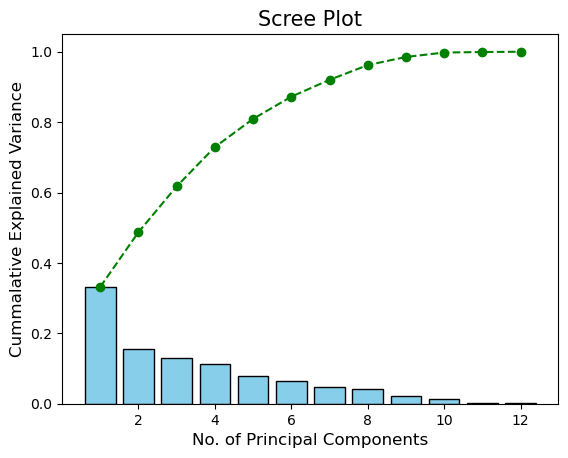

In [100]:
# This is called Scree plot
# We can see that as per the diagrams that after 12 the value isn't increasing
# Therfore, we MIGHT decide to not use the last 2 (13,14)
plt.bar(range(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_,color="skyblue",edgecolor="black")
plt.plot(range(1,len(var_cumu)+1), var_cumu,"go--")
plt.title("Scree Plot",fontsize=15)
plt.xlabel("No. of Principal Components",fontsize = 12)
plt.ylabel("Cummalative Explained Variance",fontsize = 12)
plt.show()

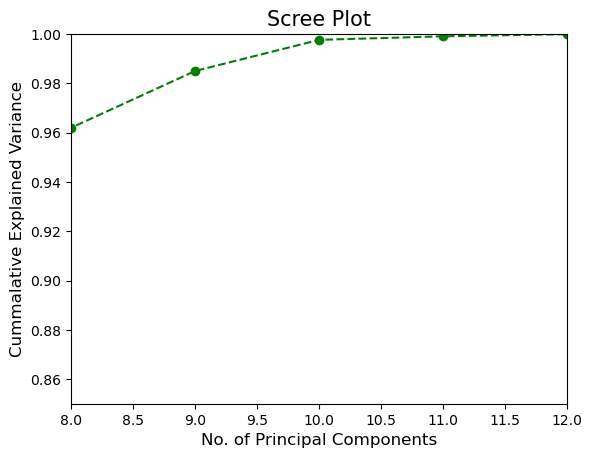

In [101]:
# This is called Scree plot
# We can see that as per the diagrams that after 12 the value isn't increasing
# Therfore, we MIGHT decide to not use the last 2 (13,14)
plt.bar(range(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_,color="skyblue",edgecolor="black")
plt.plot(range(1,len(var_cumu)+1), var_cumu,"go--")
plt.title("Scree Plot",fontsize=15)
plt.xlabel("No. of Principal Components",fontsize = 12)
plt.ylabel("Cummalative Explained Variance",fontsize = 12)
plt.xlim([8,12])
plt.ylim([0.85,1])
plt.show()

In [102]:
var_cumu[8]

0.985065993530985

In [103]:
# Let's take 9 , which explains 98.5 %
pc_selected = PCA(n_components=10, random_state=10)
# This is the new transformed data
x_train_pc = pc_selected.fit_transform(x_train_df)
x_test_pc = pc_selected.transform(x_test_df)

# Algorithms:

In [6]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve  

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier

# More advcned gradient boosting
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
import gc # for deleting unused variables
%matplotlib inline

from sklearn.model_selection import StratifiedKFold

### Setting x_train and x_test_values according to which features selection we are going with

In [105]:
#JUMP change x_train_df
#x_train_df = x_train_tsd
#x_test_df = x_test
x_train_df = x_train_pc
x_test_df = x_test_pc

In [106]:
y_test_ori = y_test
y_train_ori = y_train
y_test = y_test.map({3:0,4:1,5:2,6:3,7:4,8:5,9:6})
y_train =y_train.map({3:0,4:1,5:2,6:3,7:4,8:5,9:6})
y_test

2544    3
3772    3
4518    3
423     3
4681    3
       ..
3601    4
3451    4
2462    2
4509    2
2910    2
Name: quality, Length: 1266, dtype: int64

In [107]:
y_train.unique()

array([2, 4, 3, 5, 1, 0, 6], dtype=int64)

For Logit_Reg:



C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\metrics\

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.00      0.00      0.00        74
           2       0.60      0.49      0.54       842
           3       0.53      0.80      0.64      1363
           4       0.54      0.22      0.31       554
           5       0.00      0.00      0.00       108
           6       0.00      0.00      0.00         3

    accuracy                           0.55      2953
   macro avg       0.24      0.22      0.21      2953
weighted avg       0.52      0.55      0.51      2953



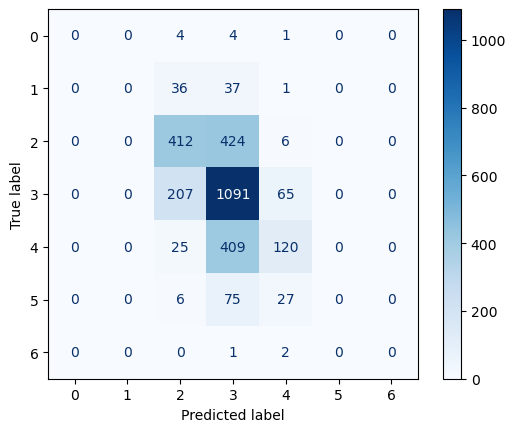

For knn:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.52      0.23      0.32        74
           2       0.70      0.75      0.72       842
           3       0.71      0.79      0.75      1363
           4       0.69      0.62      0.65       554
           5       0.86      0.18      0.29       108
           6       0.00      0.00      0.00         3

    accuracy                           0.71      2953
   macro avg       0.50      0.37      0.39      2953
weighted avg       0.70      0.71      0.69      2953



C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\metrics\

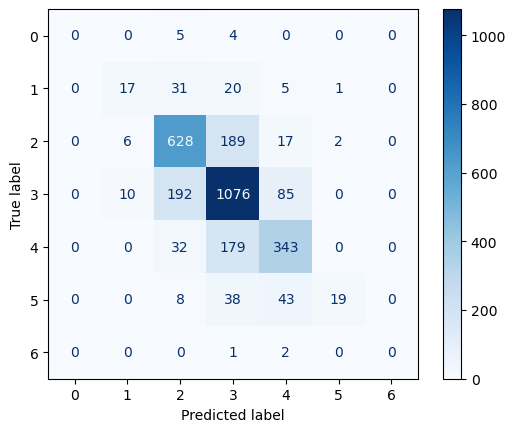

For RF:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.00      0.00      0.00        74
           2       0.75      0.55      0.64       842
           3       0.57      0.90      0.69      1363
           4       0.72      0.22      0.34       554
           5       0.00      0.00      0.00       108
           6       0.00      0.00      0.00         3

    accuracy                           0.61      2953
   macro avg       0.29      0.24      0.24      2953
weighted avg       0.61      0.61      0.57      2953



C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\metrics\

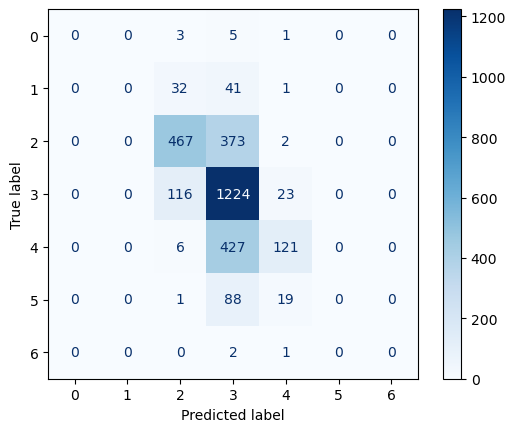

For DT:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        74
           2       1.00      1.00      1.00       842
           3       1.00      1.00      1.00      1363
           4       1.00      1.00      1.00       554
           5       1.00      1.00      1.00       108
           6       1.00      1.00      1.00         3

    accuracy                           1.00      2953
   macro avg       1.00      1.00      1.00      2953
weighted avg       1.00      1.00      1.00      2953



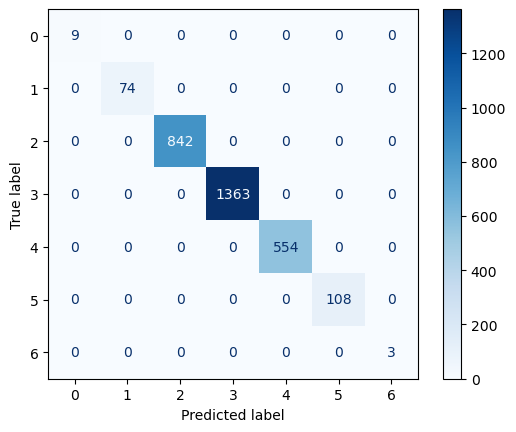

For GaussianNB:

              precision    recall  f1-score   support

           0       0.25      0.33      0.29         9
           1       0.21      0.04      0.07        74
           2       0.58      0.50      0.54       842
           3       0.53      0.69      0.60      1363
           4       0.45      0.35      0.39       554
           5       0.17      0.01      0.02       108
           6       0.60      1.00      0.75         3

    accuracy                           0.53      2953
   macro avg       0.40      0.42      0.38      2953
weighted avg       0.51      0.53      0.51      2953



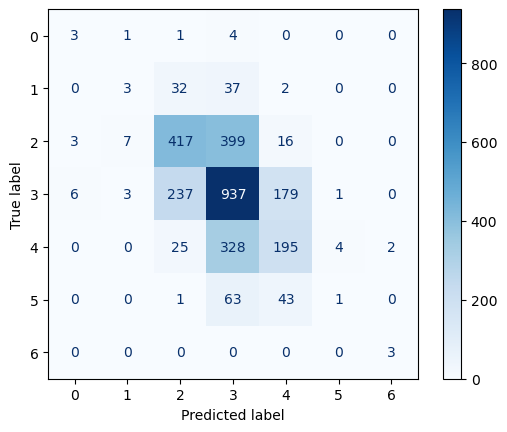

For SVC:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.00      0.00      0.00        74
           2       0.66      0.61      0.64       842
           3       0.59      0.83      0.69      1363
           4       0.69      0.34      0.45       554
           5       0.00      0.00      0.00       108
           6       0.00      0.00      0.00         3

    accuracy                           0.62      2953
   macro avg       0.28      0.25      0.25      2953
weighted avg       0.59      0.62      0.58      2953



C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\metrics\

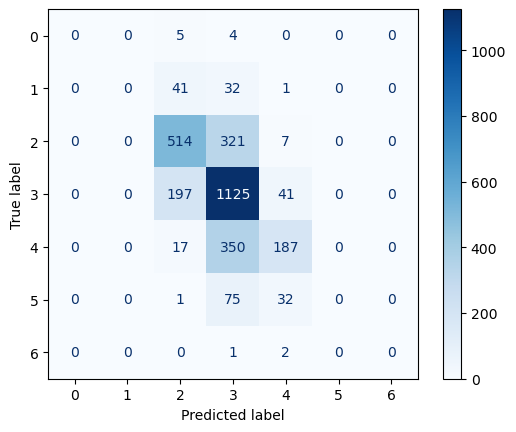

For xgboost:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        74
           2       1.00      1.00      1.00       842
           3       1.00      1.00      1.00      1363
           4       1.00      1.00      1.00       554
           5       1.00      1.00      1.00       108
           6       1.00      1.00      1.00         3

    accuracy                           1.00      2953
   macro avg       1.00      1.00      1.00      2953
weighted avg       1.00      1.00      1.00      2953



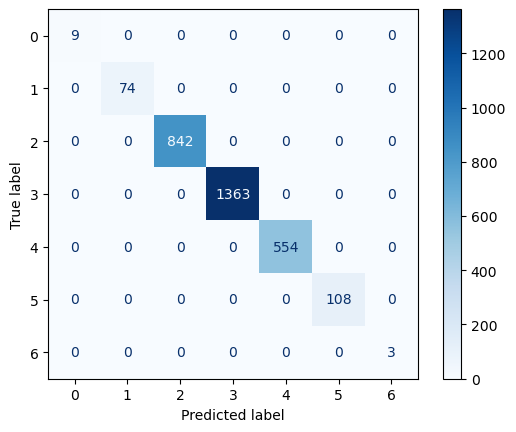

For Graboost:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      0.78      0.88        74
           2       0.83      0.74      0.78       842
           3       0.74      0.90      0.81      1363
           4       0.88      0.64      0.74       554
           5       1.00      0.70      0.83       108
           6       1.00      1.00      1.00         3

    accuracy                           0.79      2953
   macro avg       0.92      0.82      0.86      2953
weighted avg       0.81      0.79      0.79      2953



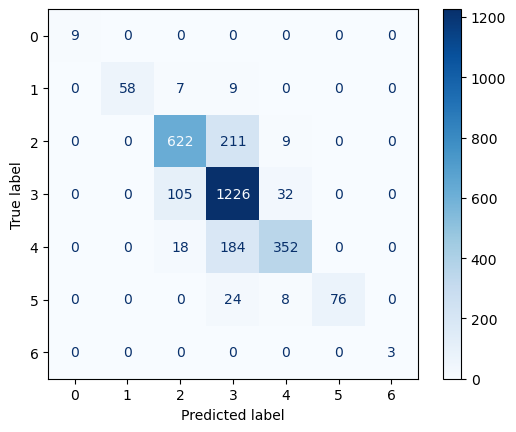

In [108]:
models = {'Logit_Reg': LogisticRegression(),
         'knn':KNeighborsClassifier(),
         'RF': RandomForestClassifier(max_depth=5),
        'DT':DecisionTreeClassifier(),
        'GaussianNB': GaussianNB(),
         'SVC':SVC(),
          'xgboost':XGBClassifier(),
          'Graboost':GradientBoostingClassifier()
         
        }
param_grid={}
folds = KFold(n_splits = 5, shuffle = True, random_state = 4) 

best_train_f1=[]
best_train_score_cv = []
best_validation_score_cv = []
weighted_f1 = []
for name,model in models.items():
    print(f"For {name}:\n")
    
    '''
    CV = GridSearchCV(model,cv = folds,
                               param_grid=param_grid,
                               scoring = 'f1',
                               return_train_score=True,
                               verbose = 0)
    '''
    CV = GridSearchCV(model,cv = folds,
                               param_grid=param_grid,
                               scoring = 'f1_weighted',
                               return_train_score=True,
                               verbose = 0)
    CV.fit(x_train_df,y_train)
    best_train_f1.append(CV.best_score_)
    
    # fitting the best model with the train data
    CV_best_fitted = CV.best_estimator_.fit(x_train_df,y_train)
    y_pred_cv = CV_best_fitted.predict(x_train_df)
  
    
    # Trying to get index of best model
    best_train_score_cv.append(CV.cv_results_['mean_train_score'][CV.best_index_])
    best_validation_score_cv.append(CV.cv_results_['mean_test_score'][CV.best_index_])
    

    #Classification Report
    print(classification_report(y_train, y_pred_cv))
    report = classification_report(y_train, y_pred_cv,output_dict=True)

    weighted_f1.append(report['weighted avg']['f1-score'])

    #Confusion Matrix
    cm_cv = confusion_matrix(y_train, y_pred_cv)

    # Display Confusion Matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm_cv,display_labels=CV.best_estimator_.classes_)
    disp.plot(cmap=plt.cm.Blues,values_format='g')
    plt.show()

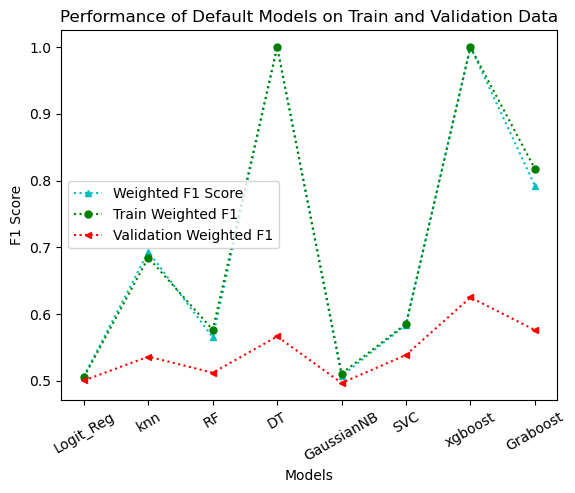

In [109]:

plt.plot(models.keys(),weighted_f1,"c^:",markersize=5,label='Weighted F1 Score')
plt.plot(models.keys(),best_train_score_cv,"go:",markersize=5,label='Train Weighted F1')
plt.plot(models.keys(),best_validation_score_cv,"r<:",markersize=5,label='Validation Weighted F1')
plt.title('Performance of Default Models on Train and Validation Data')
plt.xlabel('Models')
plt.ylabel('F1 Score')
plt.xticks(rotation=30)
plt.legend()
plt.show()

## Storing results of Models:

In [110]:
f1_final_values = {}
f1_final_test ={}
AUC_train_values = {}

AUC_test_values = {}

# Helper Function

In [215]:
def plot_roc_auc_curve(y_train, y_train_pred,):
    '''
    Generate train and test roc curve
    '''
     #creating a set of all the unique classes using the actual class list
    average='macro'
    unique_class = set(y_train)
    roc_auc_dict = {}
    for per_class in unique_class:
        #creating a list of all the classes except the current class 
        other_class = [x for x in unique_class if x != per_class]

        #marking the current class as 1 and all other classes as 0
        new_actual_class = [0 if x in other_class else 1 for x in y_train]
        new_pred_class = [0 if x in other_class else 1 for x in y_train_pred]

        #using the sklearn metrics method to calculate the roc_auc_score
        roc_auc = roc_auc_score(new_actual_class, new_pred_class, average = average)
        roc_auc_dict[per_class] = roc_auc

    
    

        fpr_train, tpr_train, thresholds = roc_curve(new_actual_class, new_pred_class)

        roc_plot(fpr_train, tpr_train,per_class)

    print(roc_auc_dict)
    return roc_auc_dict

def roc_plot(fpr_train, tpr_train,class_name):
    '''
    Generate roc plot
    '''
    
    fig = plt.plot(fpr_train, tpr_train,"ro--", label = 'Train')

    

    #plt.xlim([0.0, 1.0])
    #plt.ylim([0.0, 1.0])
    plt.title(f"ROC curve for {class_name}",fontsize=15)
    plt.xlabel("False Positive Rate (1 - Specificity)",fontsize=10)
    plt.ylabel("True Positive Rate (Sensitivity)",fontsize=10)
    plt.legend(loc = 'lower right')
    plt.grid(True)
    plt.show()    
    
    
def roc_auc_curve_scores(y_train, y_train_pred):
    '''
    Generate train and test roc curve
    '''
     #creating a set of all the unique classes using the actual class list
    average='macro'
    unique_class = set(y_train)
    roc_auc_dict = {}
    for per_class in unique_class:
        #creating a list of all the classes except the current class 
        other_class = [x for x in unique_class if x != per_class]

        #marking the current class as 1 and all other classes as 0
        new_actual_class = [0 if x in other_class else 1 for x in y_train]
        new_pred_class = [0 if x in other_class else 1 for x in y_train_pred]

        #using the sklearn metrics method to calculate the roc_auc_score
        roc_auc = roc_auc_score(new_actual_class, new_pred_class, average = average)
        roc_auc_dict[per_class] = roc_auc
    


    return roc_auc_dict

def precison_recall_curve(y_train, y_train_pred, y_test, y_test_pred):
    p_train, r_train, thresholds_train = precision_recall_curve(y_train, y_train_pred)
    p_test, r_test, thresholds_test = precision_recall_curve(y_test, y_test_pred)
    precision_recall_plot(p_train, r_train, p_test, r_test,thresholds_train,thresholds_test)
    
    
def precision_recall_plot(p_train, r_train, p_test, r_test,thresholds_train,thresholds_test):
    '''
    Generate Precision Recall  plot
    '''
    plt.figure(figsize =(8, 8))
    plt.plot(thresholds_train,p_train[:-1],"go-",lw = 0.5,ms =0.6,label = 'Precision_Train')
    plt.plot(thresholds_train,r_train[:-1],"r+--",lw = 0.5,ms =0.5, label = 'Recall_Train')
    

    #plt.xlim([0.0, 1.0])
    plt.ylim([0.2, 1.0])
    plt.xticks()
    plt.title("Precision Recall Curve - Training  ",fontsize=15)
    plt.xlabel("Thersholds",fontsize=10)
    plt.ylabel("'Precision (Green) / Recall (Red)'",fontsize=10)
    plt.legend(loc = 'lower right')
    plt.xticks(np.arange(0,1,0.05),rotation = 30)
    plt.grid(True)
    
    plt.figure(figsize =(8, 8))
    plt.plot(thresholds_test,p_test[:-1],"go-",lw = 0.7,ms =1 , label = 'Precision_Test')
    plt.plot(thresholds_test,r_test[:-1],"r+--",lw = 0.7,ms =1, label = 'Recall_Test')
    

    #plt.xlim([0.0, 1.0])
    plt.ylim([0.2, 1.0])
    plt.title("Precision Recall Curve -Testing  ",fontsize=15)
    plt.xlabel("Thersholds",fontsize=10)
    plt.ylabel("'Precision (Green) / Recall (Red)'",fontsize=10)
    plt.legend(loc = 'lower right')
    plt.xticks(np.arange(0,1,0.05),rotation = 30)
    plt.grid(True)
    
    plt.show()     

# Logistic Regression

In [127]:

param_grid = {
    'penalty': ['l1','l2',None],
    'C': [0.001, 0.01, 0.1, 1, 10],
    'solver': [ 'newton-cg', 'saga', 'lbfgs'],
    'multi_class': ['ovr', 'multinomial'],
    'max_iter':[1000]
}

scoring_LR = 'f1_weighted'
model_LR = LogisticRegression()

folds = KFold(n_splits = 5, shuffle = True, random_state = 4)


GS_LR = GridSearchCV(model_LR,cv = folds,
                               param_grid=param_grid,
                               scoring = scoring_LR,
                               return_train_score=True,
                               verbose = 1)

In [128]:
GS_LR.fit(x_train_df,y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:314: LineSearchWa

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\lin

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ig

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/prepro

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
100 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
T

GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10], 'max_iter': [1000],
                         'multi_class': ['ovr', 'multinomial'],
                         'penalty': ['l1', 'l2', None],
                         'solver': ['newton-cg', 'saga', 'lbfgs']},
             return_train_score=True, scoring='f1_weighted', verbose=1)

In [129]:

model_LR = GS_LR.best_estimator_
model_LR.fit(x_train_df,y_train)

f1_final_values['LR'] = GS_LR.best_score_
print("Best Parameter: ",GS_LR.best_params_)
print(f"Best {scoring_LR} Score: ",GS_LR.best_score_)

Best Parameter:  {'C': 0.001, 'max_iter': 1000, 'multi_class': 'multinomial', 'penalty': None, 'solver': 'newton-cg'}
Best f1_weighted Score:  0.5032060774711394


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


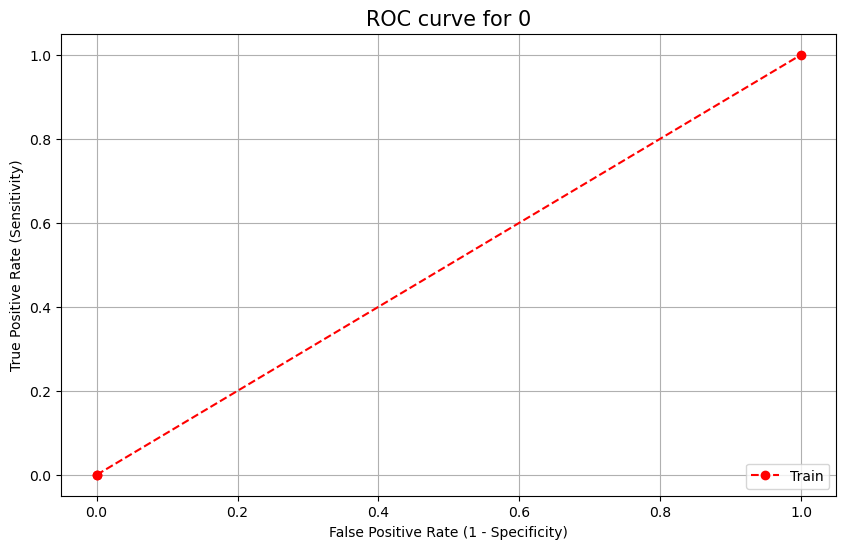

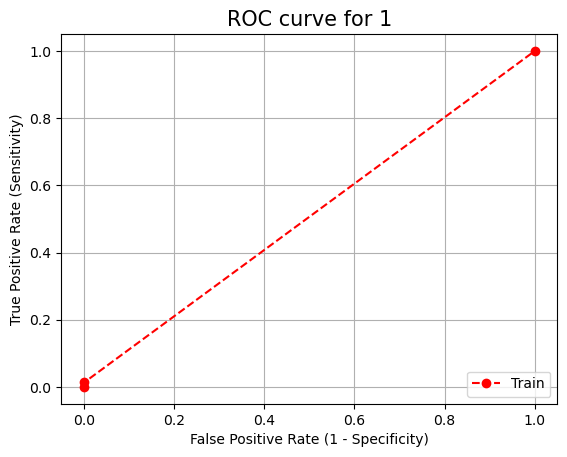

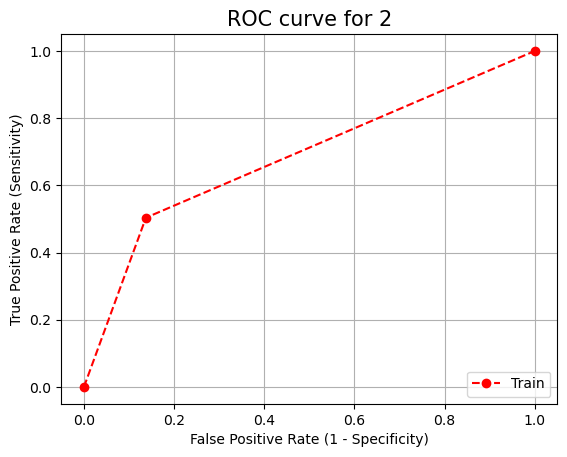

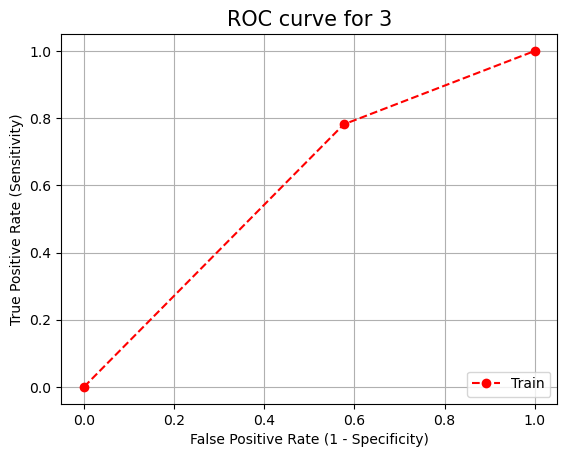

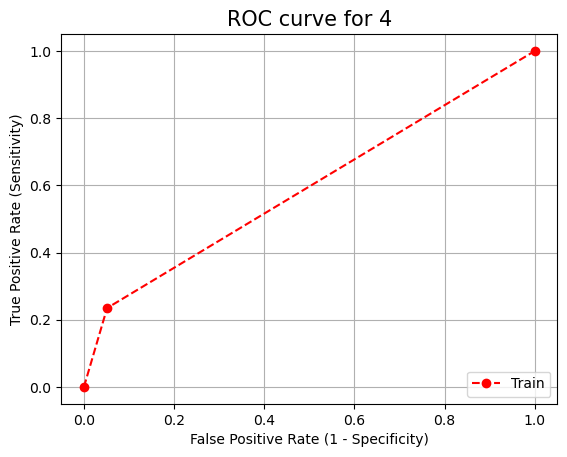

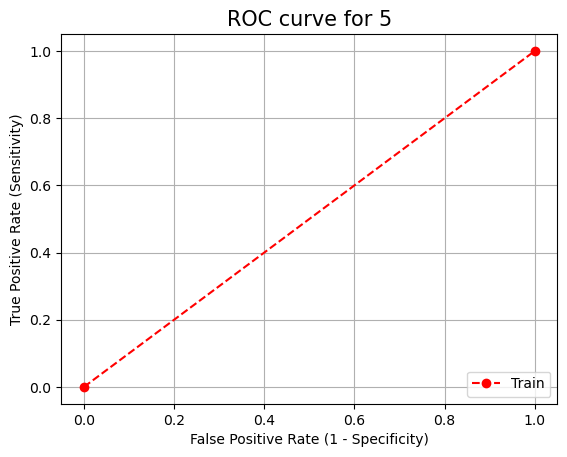

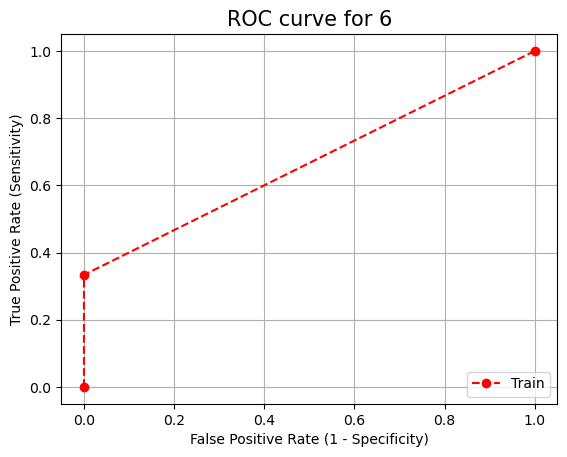

Per class: roc_auc_score
-----------------------------------------------
{0: 0.49983016304347827, 1: 0.5064094139293862, 2: 0.6830936470090501, 3: 0.6026320039498516, 4: 0.5916928383216232, 5: 0.5, 6: 0.6666666666666666}


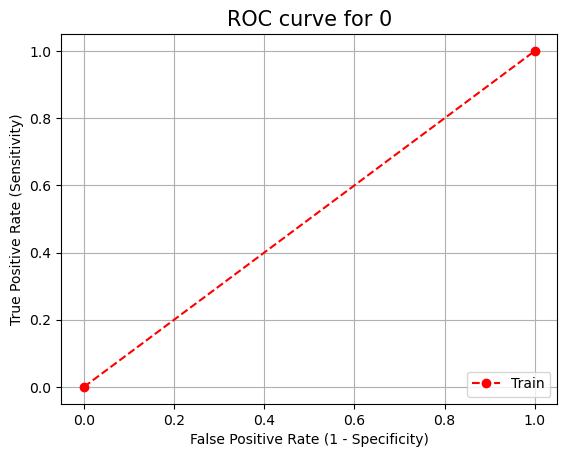

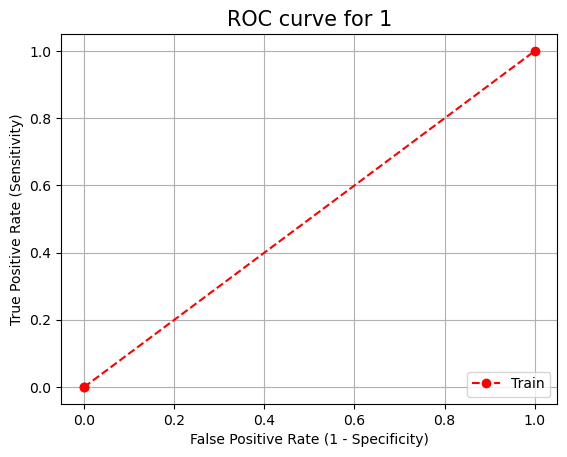

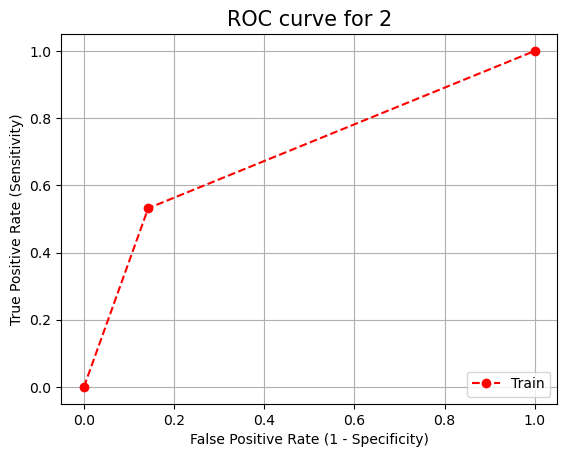

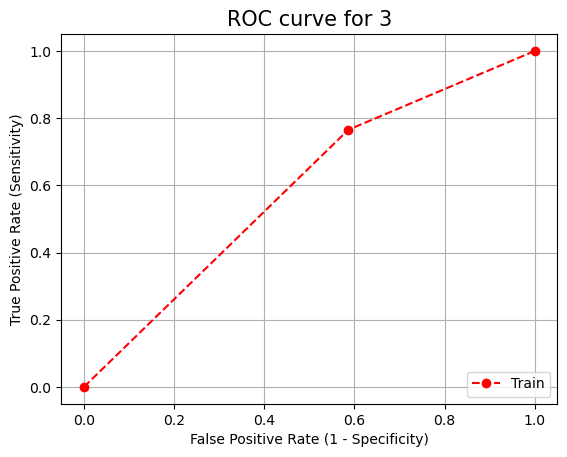

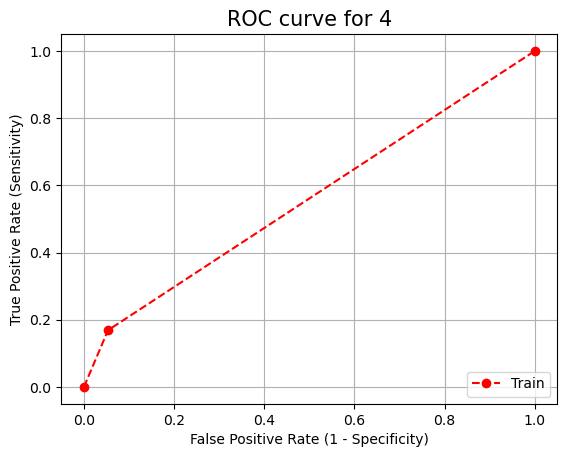

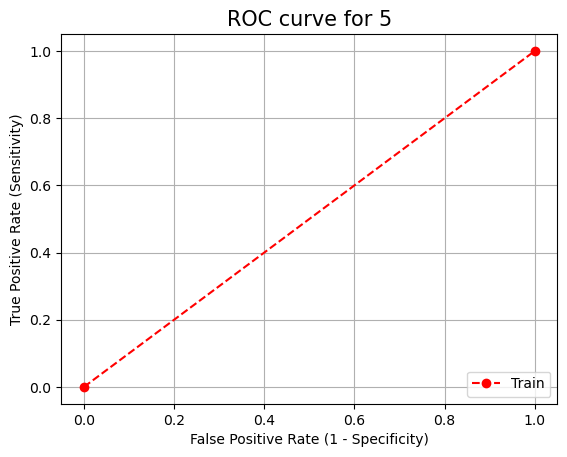

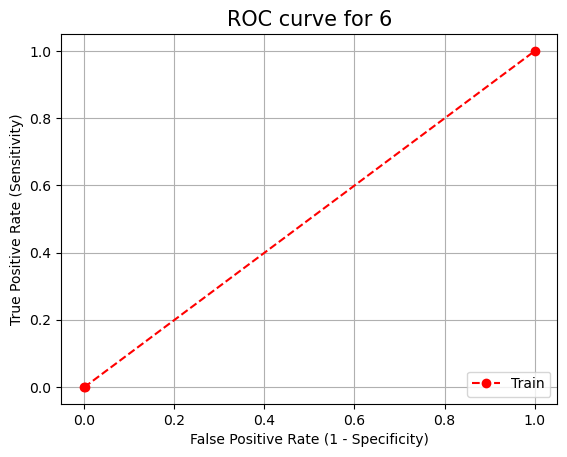

Per class: roc_auc_score
-----------------------------------------------
{0: 0.5, 1: 0.49959481361426256, 2: 0.694657259607291, 3: 0.5894503474872455, 4: 0.5576632099494409, 5: 0.5, 6: 0.4992094861660079}


In [132]:
plt.subplots(figsize = (10, 6))
y_train_pred_LR = model_LR.predict(x_train_df)
y_test_pred_LR = model_LR.predict(x_test_df)

AUC_train_values['LR'] = plot_roc_auc_curve(y_train, y_train_pred_LR)

AUC_test_values['LR'] = plot_roc_auc_curve(y_test, y_test_pred_LR)
# additional line
#precison_recall_curve(y_train, y_train_pred_LR, y_test, y_test_pred_LR

## Best Logistic Regression Model

In [134]:
# printing the optimal accuracy score and hyperparameters
print("best f1_score",GS_LR.best_score_)
print(GS_LR.best_estimator_)

best f1_score 0.5032060774711394
LogisticRegression(C=0.001, max_iter=1000, multi_class='multinomial',
                   penalty=None, solver='newton-cg')


In [135]:
# GridSearchCV Model
joblib.dump(GS_LR,"cv_LR.h5")
# The best model
joblib.dump(model_LR,"best_LR.h5")

['best_LR.h5']

In [136]:
# Other way of getting r2_score

f1_final_test['LR']= model_LR.score(x_test_df, y_test)

In [137]:
f1_final_test

{'LR': 0.5363349131121643}

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        32
           2       0.60      0.53      0.56       361
           3       0.53      0.77      0.62       584
           4       0.42      0.17      0.24       237
           5       0.00      0.00      0.00        47
           6       0.00      0.00      0.00         1

    accuracy                           0.54      1266
   macro avg       0.22      0.21      0.20      1266
weighted avg       0.49      0.54      0.49      1266



C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


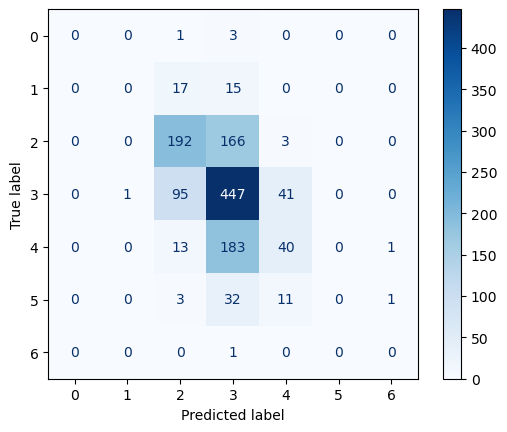

In [138]:
from sklearn.metrics import ConfusionMatrixDisplay


y_pred_LR = GS_LR.best_estimator_.predict(x_test_df)

print(classification_report(y_test, y_pred_LR))

cm = confusion_matrix(y_test, y_pred_LR)

disp = ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = GS_LR.best_estimator_.classes_)
#disp = disp.plot(cmap=plt.cm.Blues,values_format='g')
disp.plot(cmap = plt.cm.Blues,values_format='g')
plt.show()

# Desicion Tree

### Tuning Base Model

In [216]:
max_depth_range = np.arange(1,6,1)
min_samples_split_range = np.arange(10,50,5)
min_samples_leaf_range = np.arange(3,20,3)

print("Total Fits for 5 splits:",5*max_depth_range.shape[0]*min_samples_split_range.shape[0]*min_samples_leaf_range.shape[0])

Total Fits for 5 splits: 1200


In [219]:
criterion=['gini', 'entropy', 'log_loss']

criterion_perf_train = []
criterion_perf_test =[]
best_params = []
for i in criterion:
    
    params = {"max_depth": max_depth_range,
              "min_samples_split":min_samples_split_range,
             "min_samples_leaf":min_samples_leaf_range}

    folds = KFold(n_splits = 5, shuffle = True, random_state = 4)

    model = DecisionTreeClassifier(criterion=i)

    # set up grid search scheme
    # note that we are still using the 5 fold CV scheme we set up earlier
    # r2 y default
    model_cv = GridSearchCV(estimator = model, param_grid = params,
                            cv = folds,
                            verbose = 1,
                            scoring = 'f1_weighted',
                           return_train_score=True)
    
    
    fitted_model_cv = model_cv.fit(x_train_df,y_train)
    
    criterion_perf_train.append(fitted_model_cv.best_score_)
    best_params.append(fitted_model_cv.best_params_)
    criterion_perf_test.append(fitted_model_cv.best_estimator_.score(x_test_df, y_test))

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
Fitting 5 folds for each of 240 candidates, totalling 1200 fits
Fitting 5 folds for each of 240 candidates, totalling 1200 fits


In [220]:
print(criterion_perf_train)
print(criterion_perf_test)
best_params

[0.5011252717862259, 0.4807122172925819, 0.4807122172925819]
[0.509478672985782, 0.5229067930489731, 0.5229067930489731]


[{'max_depth': 5, 'min_samples_leaf': 6, 'min_samples_split': 20},
 {'max_depth': 5, 'min_samples_leaf': 9, 'min_samples_split': 10},
 {'max_depth': 5, 'min_samples_leaf': 9, 'min_samples_split': 10}]

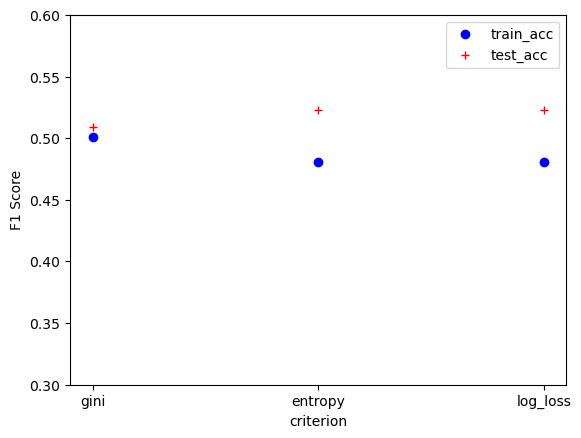

In [221]:
plt.xlabel("criterion")
plt.ylabel("F1 Score")
plt.plot(criterion,criterion_perf_train,'bo',label="train_acc")
plt.plot(criterion,criterion_perf_test,'r+',label="test_acc")
plt.ylim([0.3,0.6])
plt.legend()


# Tuning Max_depth

In [234]:
max_depth_range = np.arange(4,25,1)
print("Total Fits for 5 splits:",5*max_depth_range.shape[0])

Total Fits for 5 splits: 105


In [246]:
params = {"max_depth": max_depth_range,
          }

folds = KFold(n_splits = 5, shuffle = True, random_state = 4)

# instantiate the model
model = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)


# set up grid search scheme
# note that we are still using the 5 fold CV scheme we set up earlier
# r2 y default
model_cv = GridSearchCV(estimator = model, param_grid = params,
                        cv = folds,
                        verbose = 1,
                        scoring = 'f1_weighted',
                       return_train_score=True)

In [247]:
model_cv.fit(x_train_df,y_train)

Fitting 5 folds for each of 21 candidates, totalling 105 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'max_depth': array([ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
       21, 22, 23, 24])},
             return_train_score=True, scoring='f1_weighted', verbose=1)

In [248]:
score = pd.DataFrame(model_cv.cv_results_)
print(model_cv.best_params_)
print(model_cv.best_score_)

{'max_depth': 17}
0.5661145941282503


In [ ]:
"""
{'max_depth': 17}
0.5661145941282503
"""

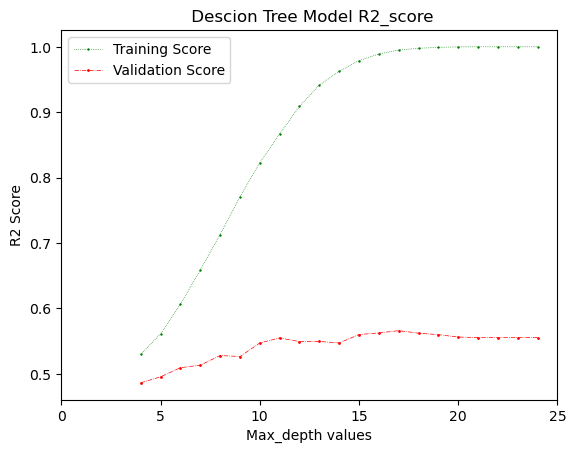

In [238]:
plt.plot(max_depth_range,score['mean_train_score'], 'g+:',linewidth=0.5,label="Training Score",markersize=1)
plt.plot(max_depth_range,score['mean_test_score'], 'ro-.',linewidth=0.5,label="Validation Score",markersize =1)
plt.title(" Descion Tree Model R2_score")
#plt.axis([0,0,7])
plt.xlabel("Max_depth values")
plt.ylabel("R2 Score")
plt.xlim([0,25])
#plt.ylim([0.2,0.9])
plt.legend(loc=2)
plt.show()

# Tuning min_samples_leaf

In [265]:
range_2 = np.arange(1,20,1)
print("Total Fits for 5 splits:",5*range_2.shape[0])

Total Fits for 5 splits: 95


In [266]:
params = {"min_samples_leaf": range_2,
          'max_depth': [17]
          
          }

folds = KFold(n_splits = 5, shuffle = True, random_state = 4)

# instantiate the model
model = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)


# set up grid search scheme
# note that we are still using the 5 fold CV scheme we set up earlier
# r2 y default
model_cv = GridSearchCV(estimator = model, param_grid = params,
                        cv = folds,
                        verbose = 1,
                        scoring = 'f1_weighted',
                       return_train_score=True)

In [267]:
model_cv.fit(x_train_df,y_train)

Fitting 5 folds for each of 19 candidates, totalling 95 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'max_depth': [17],
                         'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])},
             return_train_score=True, scoring='f1_weighted', verbose=1)

In [268]:
score = pd.DataFrame(model_cv.cv_results_)
print(model_cv.best_params_)
print(model_cv.best_score_)

{'max_depth': 17, 'min_samples_leaf': 1}
0.5661145941282503


In [ ]:
"""
{'max_depth': 17}
0.5661145941282503

{'max_depth': 17, 'min_samples_leaf': 1}
0.5661145941282503
"""

In [269]:
plot_range =range_2

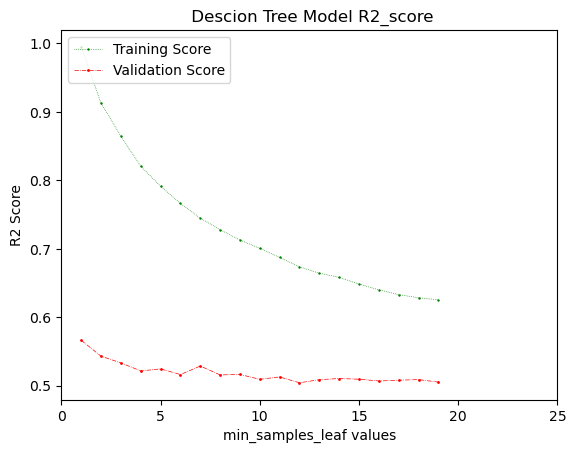

In [270]:
plt.plot(plot_range,score['mean_train_score'], 'g+:',linewidth=0.5,label="Training Score",markersize=1)
plt.plot(plot_range,score['mean_test_score'], 'ro-.',linewidth=0.5,label="Validation Score",markersize =1)
plt.title(" Descion Tree Model R2_score")
#plt.axis([0,0,7])
plt.xlabel("min_samples_leaf values")
plt.ylabel("R2 Score")
plt.xlim([0,25])
#plt.ylim([0.2,0.9])
plt.legend(loc=2)
plt.show()

### Tuning min_samples_split

In [279]:
range_2 = np.arange(1,50,1)
print("Total Fits for 5 splits:",5*range_2.shape[0])

Total Fits for 5 splits: 245


In [286]:
params = {"min_samples_leaf": [1],
          'max_depth': [17],
          'min_samples_split':range_2
          
          
          }

folds = KFold(n_splits = 5, shuffle = True, random_state = 4)

# instantiate the model
model = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)


# set up grid search scheme
# note that we are still using the 5 fold CV scheme we set up earlier
# r2 y default
model_cv = GridSearchCV(estimator = model, param_grid = params,
                        cv = folds,
                        verbose = 1,
                        scoring = 'f1_weighted',
                       return_train_score=True)

In [287]:
model_cv.fit(x_train_df,y_train)

Fitting 5 folds for each of 49 candidates, totalling 245 fits


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
5 fits failed out of a total of 245.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\tree\_classes.py", line 889, in fit
    super().fit(
  File "C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\tree\_classes.py", line 177, in fit
    self._validate_params()
  File "C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\base.py", line 600, in

GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'max_depth': [17], 'min_samples_leaf': [1],
                         'min_samples_split': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
             return_train_score=True, scoring='f1_weighted', verbose=1)

In [285]:
score = pd.DataFrame(model_cv.cv_results_)
print(model_cv.best_params_)
print(model_cv.best_score_)

{'max_depth': 17, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 3}
0.5572906356810743


In [ ]:
"""
{'max_depth': 17}
0.5661145941282503

{'max_depth': 17, 'min_samples_leaf': 1}
0.5661145941282503

{'max_depth': 17, 'min_samples_leaf': 1, 'min_samples_split': 2}
0.5661145941282503
"""

In [275]:
plot_range =range_2

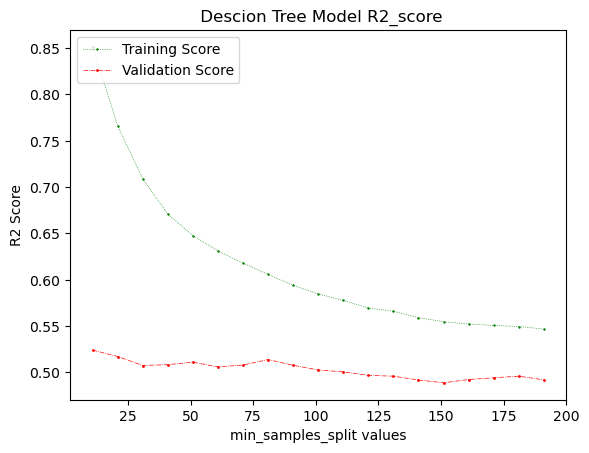

In [277]:
plt.plot(plot_range,score['mean_train_score'], 'g+:',linewidth=0.5,label="Training Score",markersize=1)
plt.plot(plot_range,score['mean_test_score'], 'ro-.',linewidth=0.5,label="Validation Score",markersize =1)
plt.title(" Descion Tree Model R2_score")
#plt.axis([0,0,7])
plt.xlabel("min_samples_split values")
plt.ylabel("R2 Score")
#plt.xlim([0,25])
#plt.ylim([0.2,0.9])
plt.legend(loc=2)
plt.show()

### Tuning max_features

In [303]:
range_2 = np.arange(1,11,1)
print("Total Fits for 5 splits:",5*range_2.shape[0])

Total Fits for 5 splits: 50


In [304]:
params = {"min_samples_leaf": [1],
          'max_depth': [17],
          'min_samples_split':[2],
          'max_features':range_2
          
          
          }

folds = KFold(n_splits = 5, shuffle = True, random_state = 4)

# instantiate the model
model = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)


# set up grid search scheme
# note that we are still using the 5 fold CV scheme we set up earlier
# r2 y default
model_cv = GridSearchCV(estimator = model, param_grid = params,
                        cv = folds,
                        verbose = 1,
                        scoring = 'f1_weighted',
                       return_train_score=True)

In [305]:
model_cv.fit(x_train_df,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'max_depth': [17],
                         'max_features': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'min_samples_leaf': [1], 'min_samples_split': [2]},
             return_train_score=True, scoring='f1_weighted', verbose=1)

In [306]:
score = pd.DataFrame(model_cv.cv_results_)
print(model_cv.best_params_)
print(model_cv.best_score_)

{'max_depth': 17, 'max_features': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
0.5661145941282503


In [ ]:
"""
{'max_depth': 17}
0.5661145941282503

{'max_depth': 17, 'min_samples_leaf': 1}
0.5661145941282503

{'max_depth': 17, 'min_samples_leaf': 1, 'min_samples_split': 2}
0.5661145941282503

{'max_depth': 17, 'max_features': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
0.5661145941282503

"""

In [307]:
plot_range =range_2
print(range_2)

[ 1  2  3  4  5  6  7  8  9 10]


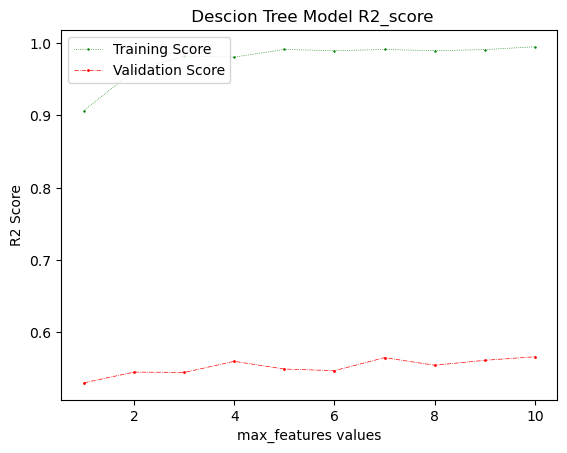

In [308]:
plt.plot(plot_range,score['mean_train_score'], 'g+:',linewidth=0.5,label="Training Score",markersize=1)
plt.plot(plot_range,score['mean_test_score'], 'ro-.',linewidth=0.5,label="Validation Score",markersize =1)
plt.title(" Descion Tree Model R2_score")
#plt.axis([0,0,7])
plt.xlabel("max_features values")
plt.ylabel("R2 Score")
#plt.xlim([0,25])
#plt.ylim([0.2,0.9])
plt.legend(loc=2)
plt.show()

### Tuning max_leaf_nodes

In [339]:
range_2 = np.arange(500,650,1)
print("Total Fits for 5 splits:",5*range_2.shape[0])

Total Fits for 5 splits: 750


In [340]:
params = {"min_samples_leaf": [1],
          'max_depth': [17],
          'min_samples_split':[2],
          'max_features':[10],
          'max_leaf_nodes':range_2
          
          
          }

folds = KFold(n_splits = 5, shuffle = True, random_state = 4)

# instantiate the model
model = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)


# set up grid search scheme
# note that we are still using the 5 fold CV scheme we set up earlier
# r2 y default
model_cv = GridSearchCV(estimator = model, param_grid = params,
                        cv = folds,
                        verbose = 1,
                        scoring = 'f1_weighted',
                       return_train_score=True)

In [341]:
model_cv.fit(x_train_df,y_train)

Fitting 5 folds for each of 150 candidates, totalling 750 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'max_depth': [17], 'max_features': [10],
                         'max_leaf_nodes': array([500, 501, 502, 503, 504, 505, 506, 507, 508, 509, 510, 511, 512,
       513, 514, 515, 516, 517, 518, 519, 520, 521, 522, 523, 524, 525,
       526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538,
       539, 540,...
       578, 579, 580, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590,
       591, 592, 593, 594, 595, 596, 597, 598, 599, 600, 601, 602, 603,
       604, 605, 606, 607, 608, 609, 610, 611, 612, 613, 614, 615, 616,
       617, 618, 619, 620, 621, 622, 623, 624, 625, 626, 627, 628, 629,
       630, 631, 632, 633, 634, 635, 636, 637, 638, 639, 640, 641, 642,
       643, 644, 645, 646, 647, 648, 649]),
                         'min_samples_leaf': [1], 'min_samples_split': [2]},
             return_train_score=True, scoring='f1_weighted', verbose=1)

In [342]:
score = pd.DataFrame(model_cv.cv_results_)
print(model_cv.best_params_)
print(model_cv.best_score_)

{'max_depth': 17, 'max_features': 10, 'max_leaf_nodes': 568, 'min_samples_leaf': 1, 'min_samples_split': 2}
0.5644350934371003


In [343]:
"""
{'max_depth': 17}
0.5661145941282503

{'max_depth': 17, 'min_samples_leaf': 1}
0.5661145941282503

{'max_depth': 17, 'min_samples_leaf': 1, 'min_samples_split': 2}
0.5661145941282503

{'max_depth': 17, 'max_features': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
0.5661145941282503


{'max_depth': 17, 'max_features': 10, 'max_leaf_nodes': 568, 'min_samples_leaf': 1, 'min_samples_split': 2}
0.5644350934371003
"""

"\n{'max_depth': 17}\n0.5661145941282503\n\n{'max_depth': 17, 'min_samples_leaf': 1}\n0.5661145941282503\n\n{'max_depth': 17, 'min_samples_leaf': 1, 'min_samples_split': 2}\n0.5661145941282503\n\n{'max_depth': 17, 'max_features': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}\n0.5661145941282503\n\n"

In [344]:
plot_range =range_2
print(range_2)

[500 501 502 503 504 505 506 507 508 509 510 511 512 513 514 515 516 517
 518 519 520 521 522 523 524 525 526 527 528 529 530 531 532 533 534 535
 536 537 538 539 540 541 542 543 544 545 546 547 548 549 550 551 552 553
 554 555 556 557 558 559 560 561 562 563 564 565 566 567 568 569 570 571
 572 573 574 575 576 577 578 579 580 581 582 583 584 585 586 587 588 589
 590 591 592 593 594 595 596 597 598 599 600 601 602 603 604 605 606 607
 608 609 610 611 612 613 614 615 616 617 618 619 620 621 622 623 624 625
 626 627 628 629 630 631 632 633 634 635 636 637 638 639 640 641 642 643
 644 645 646 647 648 649]


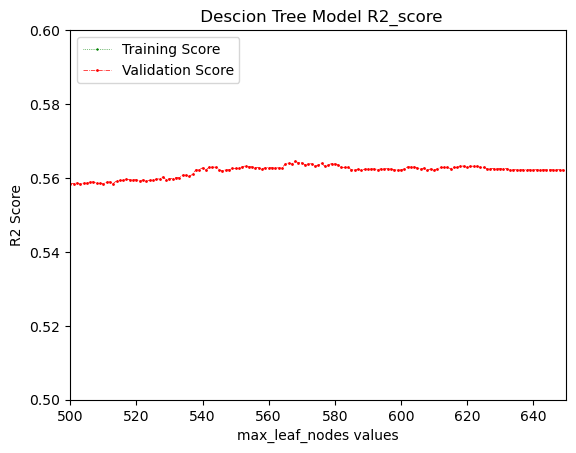

In [382]:
plt.plot(plot_range,score['mean_train_score'], 'g+:',linewidth=0.5,label="Training Score",markersize=1)
plt.plot(plot_range,score['mean_test_score'], 'ro-.',linewidth=0.5,label="Validation Score",markersize =1)
plt.title(" Descion Tree Model R2_score")
#plt.axis([0,0,7])
plt.xlabel("max_leaf_nodes values")
plt.ylabel("R2 Score")
plt.xlim([500,650])
plt.ylim([0.5,0.6])
plt.legend(loc=2)
plt.show()

## Decision Tree

In [366]:

# parameter grid
param_grid = {'max_depth': np.arange(15,19,1),
              
              'min_samples_split':[1,2,3,4],
              'max_features':[4,5,6,7,8],
              
              'criterion':['gini','entropy','log_loss'],
              'class_weight':[{0: 1.5,1:1,2:0.8,3:0.6,4:0.8,5:1,6:2}]
              
              
              
    
             }
scoring_DT = 'f1_weighted'
model_DT = DecisionTreeClassifier(random_state=10)

folds = KFold(n_splits = 5, shuffle = True, random_state = 4)


GS_DT = GridSearchCV(model_DT,cv = folds,
                               param_grid=param_grid,
                               scoring = scoring_DT,
                               return_train_score=True,
                               verbose = 1)

In [367]:
GS_DT.fit(x_train_df,y_train)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
300 fits failed out of a total of 1200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
300 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\tree\_classes.py", line 889, in fit
    super().fit(
  File "C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\tree\_classes.py", line 177, in fit
    self._validate_params()
  File "C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\base.py", line 60

GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=10),
             param_grid={'class_weight': [{0: 1.5, 1: 1, 2: 0.8, 3: 0.6, 4: 0.8,
                                           5: 1, 6: 2}],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': array([15, 16, 17, 18]),
                         'max_features': [4, 5, 6, 7, 8],
                         'min_samples_split': [1, 2, 3, 4]},
             return_train_score=True, scoring='f1_weighted', verbose=1)

In [371]:

model_DT = GS_DT.best_estimator_
model_DT.fit(x_train_df,y_train)

f1_final_values['Decision Tree'] = GS_DT.best_score_
print("Best Parameter: ",GS_DT.best_params_)
print(f"Best {scoring_DT} Score: ",GS_DT.best_score_)

Best Parameter:  {'class_weight': {0: 1.5, 1: 1, 2: 0.8, 3: 0.6, 4: 0.8, 5: 1, 6: 2}, 'criterion': 'entropy', 'max_depth': 18, 'max_features': 7, 'min_samples_split': 4}
Best f1_weighted Score:  0.5730889191568533


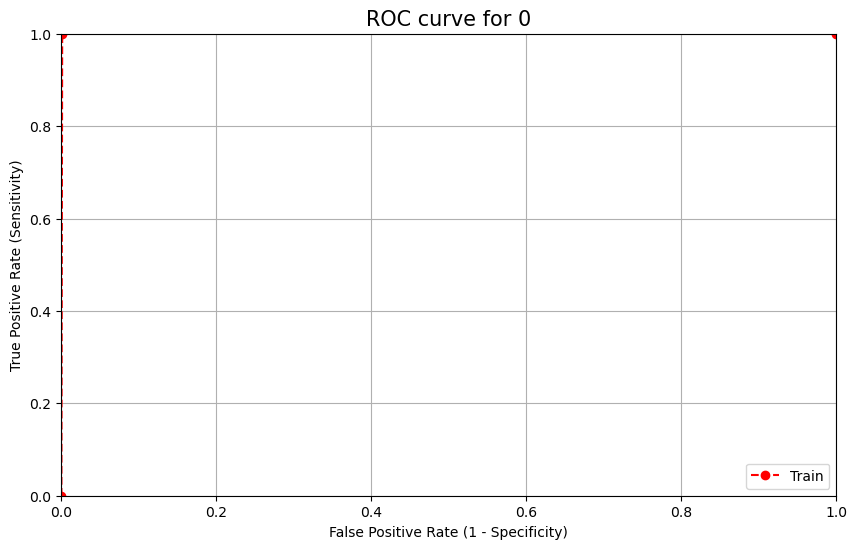

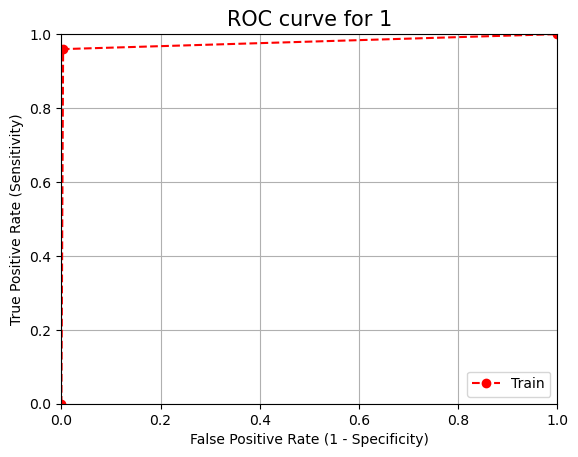

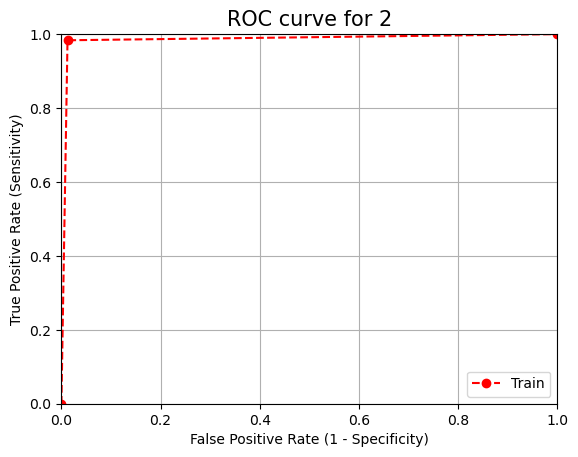

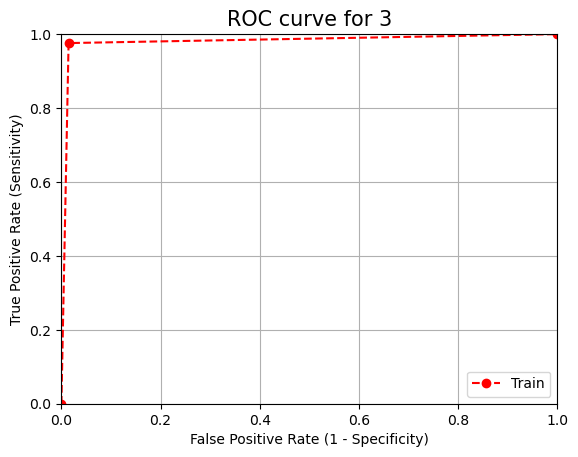

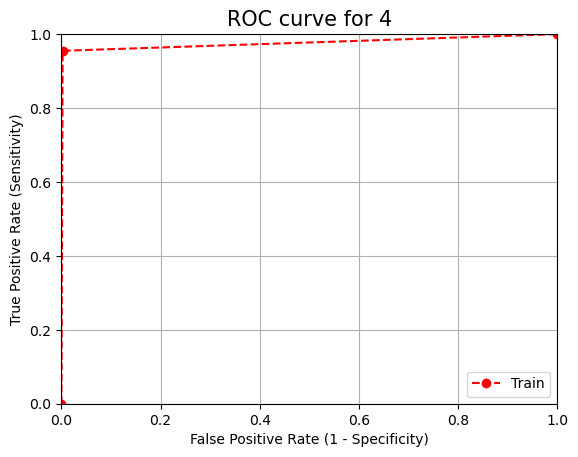

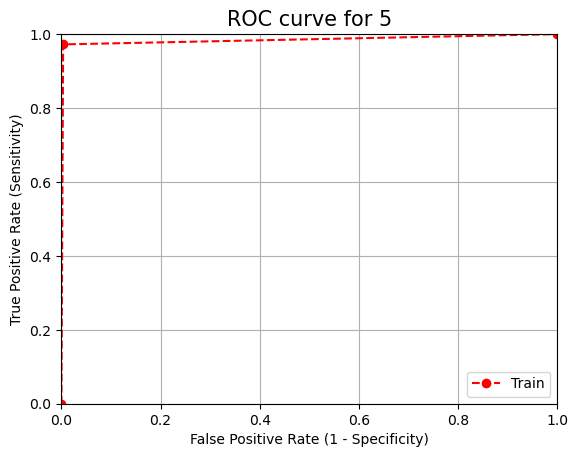

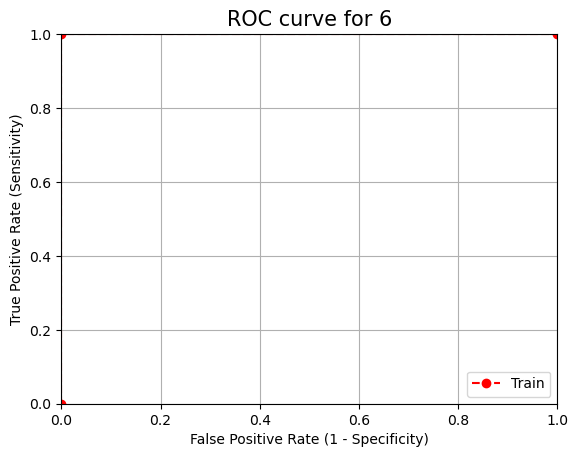

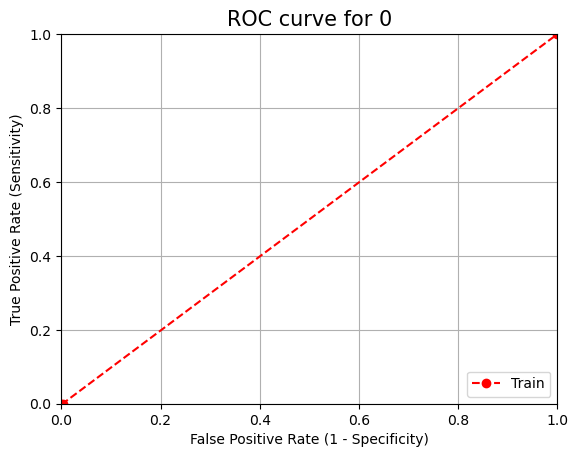

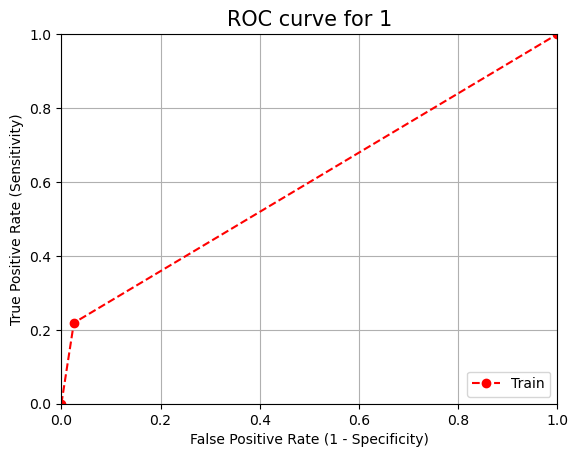

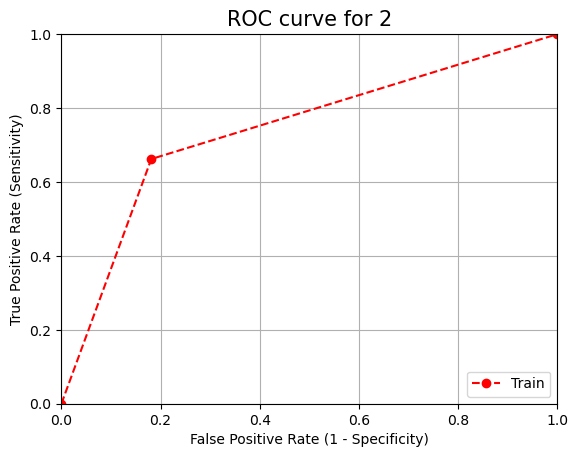

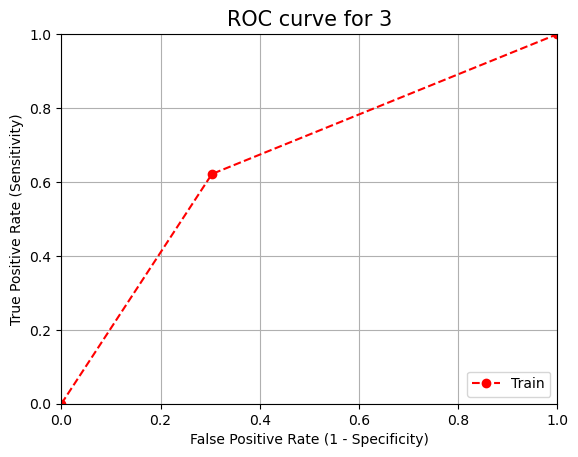

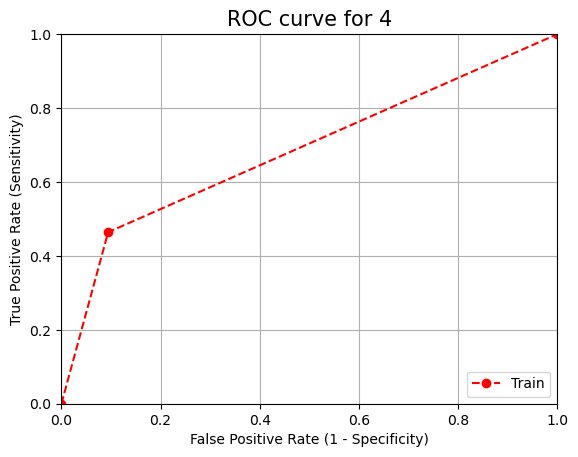

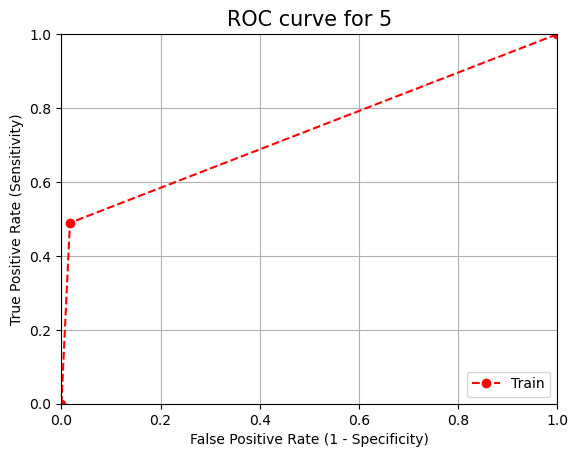

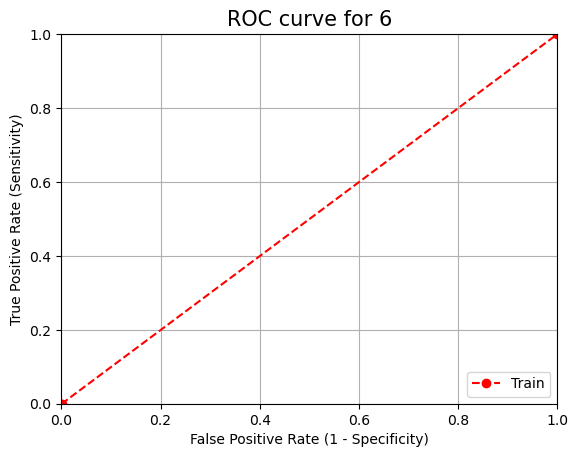

{0: 0.49881141045958793,
 1: 0.5968142220421394,
 2: 0.7404171959412926,
 3: 0.6590281404410879,
 4: 0.6849343715786496,
 5: 0.7360672333443875,
 6: 0.49960474308300395}

In [369]:
plt.subplots(figsize = (10, 6))
y_train_pred_DT = model_DT.predict(x_train_df)
y_test_pred_DT = model_DT.predict(x_test_df)

AUC_train_values['DT'] = plot_roc_auc_curve(y_train, y_train_pred_DT)

AUC_test_values['DT'] = plot_roc_auc_curve(y_test, y_test_pred_DT)
# additional line
#precison_recall_curve(y_train, y_train_pred_DT, y_test, y_test_pred_DT

## Best Decision Tree Model

In [373]:
# printing the optimal accuracy score and hyperparameters
print("best f1_score",GS_DT.best_score_)
print(GS_DT.best_estimator_)

best f1_score 0.5730889191568533
DecisionTreeClassifier(class_weight={0: 1.5, 1: 1, 2: 0.8, 3: 0.6, 4: 0.8, 5: 1,
                                     6: 2},
                       criterion='entropy', max_depth=18, max_features=7,
                       min_samples_split=4, random_state=10)


In [374]:
# GridSearchCV Model
joblib.dump(GS_DT,"DT_cv.h5")
# The best model
joblib.dump(model_DT,"DT_best.h5")

['DT_best.h5']

In [378]:
# Other way of getting r2_score

f1_final_test['Decision_Tree']= model_DT.score(x_test_df, y_test)

In [380]:
f1_final_test

{'Decision_Tree': 0.5860979462875198}

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.18      0.22      0.20        32
           2       0.59      0.66      0.63       361
           3       0.64      0.62      0.63       584
           4       0.53      0.46      0.50       237
           5       0.52      0.49      0.51        47
           6       0.00      0.00      0.00         1

    accuracy                           0.59      1266
   macro avg       0.35      0.35      0.35      1266
weighted avg       0.59      0.59      0.59      1266



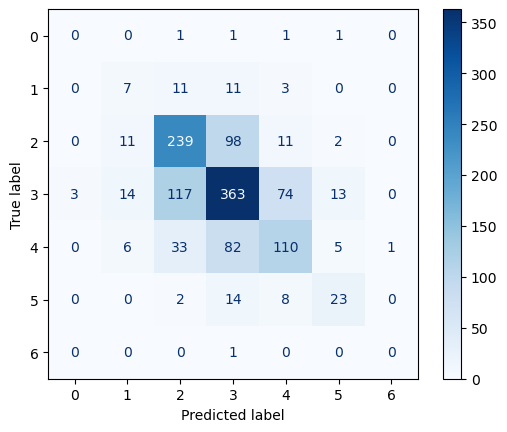

In [381]:
from sklearn.metrics import ConfusionMatrixDisplay


y_pred_DT = GS_DT.best_estimator_.predict(x_test_df)

print(classification_report(y_test, y_pred_DT))

cm = confusion_matrix(y_test, y_pred_DT)

disp = ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = GS_DT.best_estimator_.classes_)
#disp = disp.plot(cmap=plt.cm.Blues,values_format='g')
disp.plot(cmap = plt.cm.Blues,values_format='g')
plt.show()

## XGBoost

### Setting Inital Parameters

In [386]:
range_3 = np.arange(2,10,1)
range_4 = np.arange(1,8,1)
print("Total Fits for 5 splits:",5*range_3.shape[0]*range_4.shape[0])

Total Fits for 5 splits: 280


In [390]:
params = { 'max_depth':range_3,
          'min_child_weight':range_4
          
          
          }

folds = KFold(n_splits = 5, shuffle = True, random_state = 4)

# instantiate the model
model = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,

 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'multi:softmax',
 nthread=4,
 
 seed=27)


# set up grid search scheme
# note that we are still using the 5 fold CV scheme we set up earlier
# r2 y default
model_cv = GridSearchCV(estimator = model, param_grid = params,
                        cv = folds,
                        verbose = 1,
                        scoring = 'f1_weighted',
                       return_train_score=True)

In [391]:
model_cv.fit(x_train_df,y_train)

Fitting 5 folds for each of 56 candidates, totalling 280 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.8, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=0,
                                     grow_policy=None, importance_type=None,
                                     interact...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=1000,
                                     n_jobs=None, nthread=4,
                                     num_parallel_tree=None, ...),
             param_grid={'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_child_weight': array([1, 2, 3, 4, 5, 6, 7])},
             return_train_score=True, scoring='f1_weighted', verbose=1)

In [392]:
score = pd.DataFrame(model_cv.cv_results_)
print(model_cv.best_params_)
print(model_cv.best_score_)

{'max_depth': 9, 'min_child_weight': 1}
0.6296509622196231


In [343]:
"""
NO params , this is base 
learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'multi:softmax',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
0.6231196438019652

----------------------Along with base as above
{'max_depth': 9, 'min_child_weight': 1}
0.6296509622196231

"""

"\n{'max_depth': 17}\n0.5661145941282503\n\n{'max_depth': 17, 'min_samples_leaf': 1}\n0.5661145941282503\n\n{'max_depth': 17, 'min_samples_leaf': 1, 'min_samples_split': 2}\n0.5661145941282503\n\n{'max_depth': 17, 'max_features': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}\n0.5661145941282503\n\n"

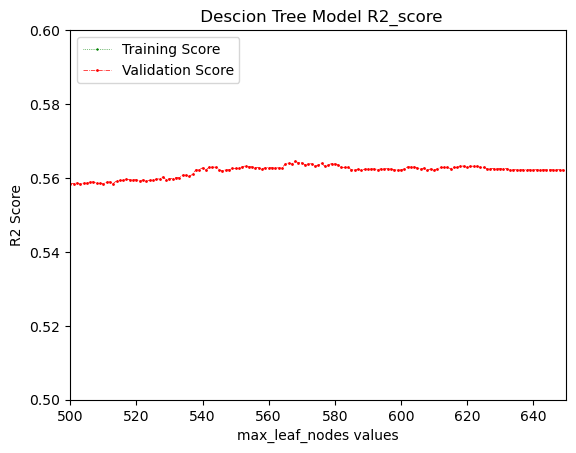

In [382]:
plt.plot(plot_range,score['mean_train_score'], 'g+:',linewidth=0.5,label="Training Score",markersize=1)
plt.plot(plot_range,score['mean_test_score'], 'ro-.',linewidth=0.5,label="Validation Score",markersize =1)
plt.title(" Descion Tree Model F1_score")
#plt.axis([0,0,7])
plt.xlabel("max_leaf_nodes values")
plt.ylabel("R2 Score")
plt.xlim([500,650])
plt.ylim([0.5,0.6])
plt.legend(loc=2)
plt.show()

### Tuning Gamma

In [406]:
range_3 = np.arange(0,0.5,0.03)
range_4 = np.arange(1,8,1)
print("Total Fits for 5 splits:",5* range_3.shape[0])

Total Fits for 5 splits: 85


In [409]:
params = { 'max_depth':[9],
          'min_child_weight':[1],
          'gamma':[range_3]
          
          
          }

folds = KFold(n_splits = 5, shuffle = True, random_state = 4)

# instantiate the model
model = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'multi:softmax',
 nthread=4,
 seed=27)


# set up grid search scheme
# note that we are still using the 5 fold CV scheme we set up earlier
# r2 y default
model_cv = GridSearchCV(estimator = model, param_grid = params,
                        cv = folds,
                        verbose = 1,
                        scoring = 'f1_weighted',
                       return_train_score=True)

In [410]:
model_cv.fit(x_train_df,y_train)

Fitting 5 folds for each of 17 candidates, totalling 85 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.8, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     inter...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=1000,
                                     n_jobs=None, nthread=4,
                                     num_parallel_tree=None, ...),
             param_grid={'gamma': array([0.  , 0.03, 0.06, 0.09, 0.12, 0.15, 0.18, 0.21, 0.24, 0.27, 0.3 ,
       0.33, 0.36, 0.39, 0.42, 0.45, 0.48]),
                         'max_depth': [9], 'min_child_weight': [1]},
             return_train_score=True, scoring='f1_weighted', verbose=1)

In [411]:
score = pd.DataFrame(model_cv.cv_results_)
print(model_cv.best_params_)
print(model_cv.best_score_)

{'gamma': 0.21, 'max_depth': 9, 'min_child_weight': 1}
0.6352982526353752


In [343]:
"""
NO params , this is base 
learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'multi:softmax',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
0.6231196438019652

----------------------Along with base as above
{'max_depth': 9, 'min_child_weight': 1}
0.6296509622196231
---------------------------------------------------

{'gamma': 0.4, 'max_depth': 9, 'min_child_weight': 1}
0.6353896260151835
"""

"\n{'max_depth': 17}\n0.5661145941282503\n\n{'max_depth': 17, 'min_samples_leaf': 1}\n0.5661145941282503\n\n{'max_depth': 17, 'min_samples_leaf': 1, 'min_samples_split': 2}\n0.5661145941282503\n\n{'max_depth': 17, 'max_features': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}\n0.5661145941282503\n\n"

### Tuning subsample and colsample_bytree

In [416]:
range_3 = np.arange(0.6,1,0.1)
range_4 = np.arange(0.5,1,0.1)
print("Total Fits for 5 splits:",5* range_3.shape[0]*range_4.shape[0])

Total Fits for 5 splits: 100


In [417]:
params = { 'max_depth':[9],
          'min_child_weight':[1],
          'gamma':[0.4],
          'subsample': range_3,
          'colsample_bytree':range_4
          
          
          
          }

folds = KFold(n_splits = 5, shuffle = True, random_state = 4)

# instantiate the model
model = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 objective= 'multi:softmax',
 nthread=4,
 seed=27)


# set up grid search scheme
# note that we are still using the 5 fold CV scheme we set up earlier
# r2 y default
model_cv = GridSearchCV(estimator = model, param_grid = params,
                        cv = folds,
                        verbose = 1,
                        scoring = 'f1_weighted',
                       return_train_score=True)

In [418]:
model_cv.fit(x_train_df,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     inte...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=1000,
                                     n_jobs=None, nthread=4,
                                     num_parallel_tree=None, ...),
             param_grid={'colsample_bytree': array([0.5, 0.6, 0.7, 0.8, 0.9]),
                         'gamma': [0.4], 'max_depth': [9],
                         'min_child_weight': [1],
                         'subsample': array([0.6, 0.7, 0.8, 0.9])},
             return_train_score=True, scoring='f1_weighted', verbose=1)

In [419]:
score = pd.DataFrame(model_cv.cv_results_)
print(model_cv.best_params_)
print(model_cv.best_score_)

{'colsample_bytree': 0.7, 'gamma': 0.4, 'max_depth': 9, 'min_child_weight': 1, 'subsample': 0.8999999999999999}
0.6404274651948192


In [343]:
"""
NO params , this is base 
learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'multi:softmax',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
0.6231196438019652

----------------------Along with base as above
{'max_depth': 9, 'min_child_weight': 1}
0.6296509622196231
---------------------------------------------------

{'gamma': 0.4, 'max_depth': 9, 'min_child_weight': 1}
0.6353896260151835

{'colsample_bytree': 0.7, 'gamma': 0.4, 'max_depth': 9, 'min_child_weight': 1, 'subsample': 0.8999999999999999}
0.6404274651948192
"""

"\n{'max_depth': 17}\n0.5661145941282503\n\n{'max_depth': 17, 'min_samples_leaf': 1}\n0.5661145941282503\n\n{'max_depth': 17, 'min_samples_leaf': 1, 'min_samples_split': 2}\n0.5661145941282503\n\n{'max_depth': 17, 'max_features': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}\n0.5661145941282503\n\n"

In [398]:
plot_range =range_3

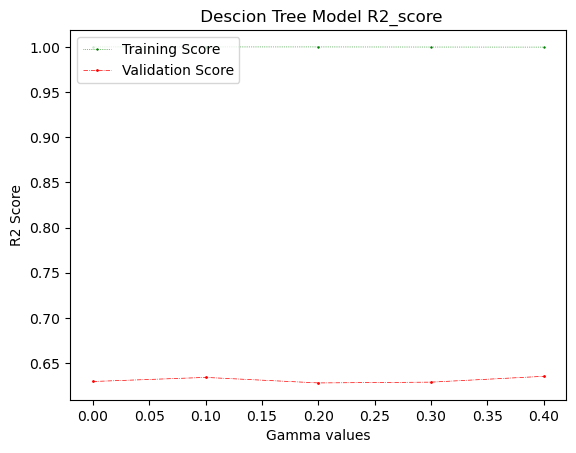

In [401]:
plt.plot(plot_range,score['mean_train_score'], 'g+:',linewidth=0.5,label="Training Score",markersize=1)
plt.plot(plot_range,score['mean_test_score'], 'ro-.',linewidth=0.5,label="Validation Score",markersize =1)
plt.title(" Descion Tree Model R2_score")
#plt.axis([0,0,7])
plt.xlabel("Gamma values")
plt.ylabel("R2 Score")
#plt.xlim([500,650])
#plt.ylim([0.5,0.6])
plt.legend(loc=2)
plt.show()

### Tuning subsample and colsample_bytree

In [425]:
range_3 = np.arange(1000,10000,1000)
range_4 = np.arange(0.01,0.1,0.05)
print("Total Fits for 5 splits:",5* range_3.shape[0]*range_4.shape[0])

Total Fits for 5 splits: 90


In [430]:
params = { 'max_depth':[9],
          'min_child_weight':[1],
          'gamma':[0.4],
          'subsample': [0.8999999999999999],
          'colsample_bytree':[0.7],
          'n_estimators':range_3,
          'learning_rate':[0.1]
          
          
          
          }

folds = KFold(n_splits = 5, shuffle = True, random_state = 4)

# instantiate the model
model = XGBClassifier(

 objective= 'multi:softmax',
 nthread=4,
 seed=27)


# set up grid search scheme
# note that we are still using the 5 fold CV scheme we set up earlier
# r2 y default
model_cv = GridSearchCV(estimator = model, param_grid = params,
                        cv = folds,
                        verbose = 1,
                        scoring = 'f1_weighted',
                       return_train_score=True)

In [431]:
model_cv.fit(x_train_df,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     inte...
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, nthread=4,
                                     num_parallel_tree=None, ...),
             param_grid={'colsample_bytree': [0.7], 'gamma': [0.4],
                         'learning_rate': [0.1], 'max_depth': [9],
                         'min_child_weight': [1],
                         'n_estimators': array([1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000]),
                         'subsample': [0.8999999999999999]},
             return_train_score=True, scoring='f1_weighted', verbose=1)

In [433]:
score = pd.DataFrame(model_cv.cv_results_)
print(model_cv.best_params_)
print(model_cv.best_score_)

{'colsample_bytree': 0.7, 'gamma': 0.4, 'learning_rate': 0.1, 'max_depth': 9, 'min_child_weight': 1, 'n_estimators': 7000, 'subsample': 0.8999999999999999}
0.6431044753018004


In [343]:
"""
NO params , this is base 
learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'multi:softmax',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
0.6231196438019652

----------------------Along with base as above
{'max_depth': 9, 'min_child_weight': 1}
0.6296509622196231
---------------------------------------------------

{'gamma': 0.4, 'max_depth': 9, 'min_child_weight': 1}
0.6353896260151835

{'colsample_bytree': 0.7, 'gamma': 0.4, 'max_depth': 9, 'min_child_weight': 1, 'subsample': 0.8999999999999999}
0.6404274651948192

{'colsample_bytree': 0.7, 'gamma': 0.4, 'learning_rate': 0.1, 'max_depth': 9, 'min_child_weight': 1, 'n_estimators': 7000, 'subsample': 0.8999999999999999}
0.6431044753018004
"""

"\n{'max_depth': 17}\n0.5661145941282503\n\n{'max_depth': 17, 'min_samples_leaf': 1}\n0.5661145941282503\n\n{'max_depth': 17, 'min_samples_leaf': 1, 'min_samples_split': 2}\n0.5661145941282503\n\n{'max_depth': 17, 'max_features': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}\n0.5661145941282503\n\n"

In [435]:
plot_range =range_3

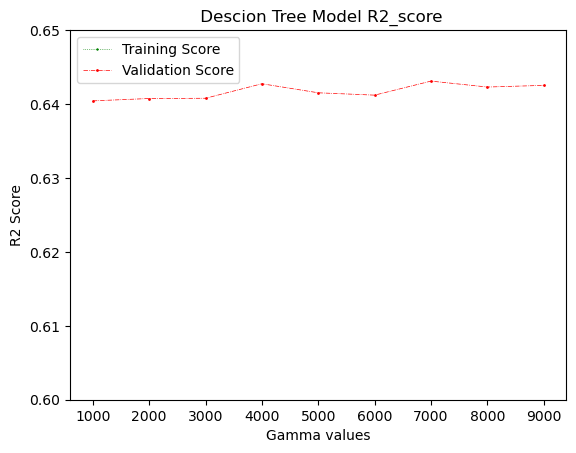

In [441]:
plt.plot(plot_range,score['mean_train_score'], 'g+:',linewidth=0.5,label="Training Score",markersize=1)
plt.plot(plot_range,score['mean_test_score'], 'ro-.',linewidth=0.5,label="Validation Score",markersize =1)
plt.title(" Descion Tree Model R2_score")
#plt.axis([0,0,7])
plt.xlabel("Gamma values")
plt.ylabel("R2 Score")
#plt.xlim([500,650])
#
plt.ylim([0.6,0.65])
plt.legend(loc=2)
plt.show()

## Combined Model

In [443]:
#'max_leaf_nodes':[None],
# 'min_weight_fraction_leaf':[0.0],

# parameter grid
param_grid = {'max_depth':[8,9],
          'min_child_weight':[1,2],
          'gamma':[0.4],
          'subsample': [0.8999999999999999],
          'colsample_bytree':[0.7],
          'n_estimators':[6800,7000,7200],
          'learning_rate':[0.1,0.15]
              
              
              
    
             }
scoring_xgb = 'f1_weighted'
model_xgb = XGBClassifier(

 objective= 'multi:softmax',
 nthread=4,
 seed=27)

folds = KFold(n_splits = 5, shuffle = True, random_state = 4)


GS_xgb = GridSearchCV(model_xgb,cv = folds,
                               param_grid=param_grid,
                               scoring = scoring_xgb,
                               return_train_score=True,
                               verbose = 1)

In [444]:
GS_xgb.fit(x_train_df,y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     inte...
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, nthread=4,
                                     num_parallel_tree=None, ...),
             param_grid={'colsample_bytree': [0.7], 'gamma': [0.4],
                         'learning_rate': [0.1, 0.15], 'max_depth': [8, 9],
                         'min_child_weight': [1, 2],
                         'n_estimators': [6800, 7000, 7200],
                         'subsample': [0.8999999999999999]},
             return_train_score=True, scoring='f1_weighted', verbose=1)

In [445]:

model_xgb = GS_xgb.best_estimator_
model_xgb.fit(x_train_df,y_train)

f1_final_values['xgb'] = GS_xgb.best_score_
print("Best Parameter: ",GS_xgb.best_params_)
print(f"Best {scoring_xgb} Score: ",GS_xgb.best_score_)

Best Parameter:  {'colsample_bytree': 0.7, 'gamma': 0.4, 'learning_rate': 0.1, 'max_depth': 9, 'min_child_weight': 1, 'n_estimators': 6800, 'subsample': 0.8999999999999999}
Best f1_weighted Score:  0.6431640362348141


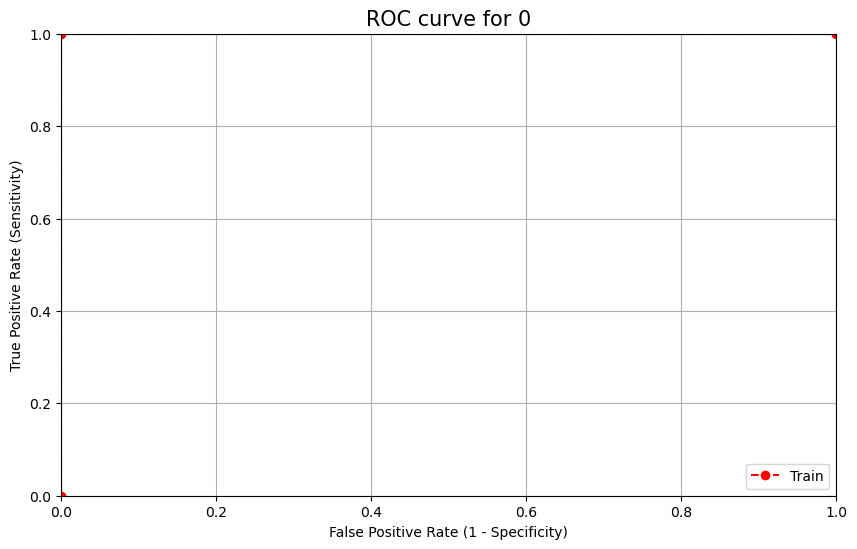

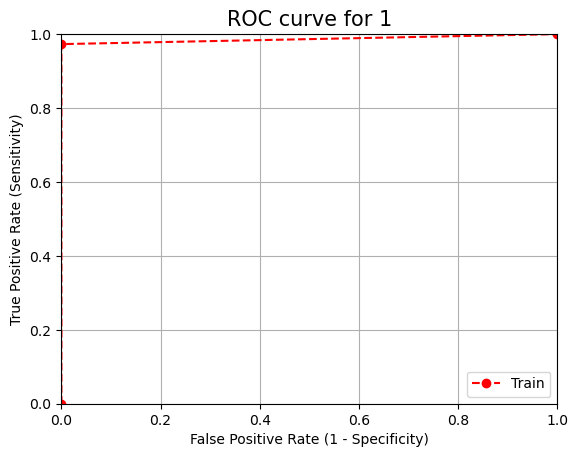

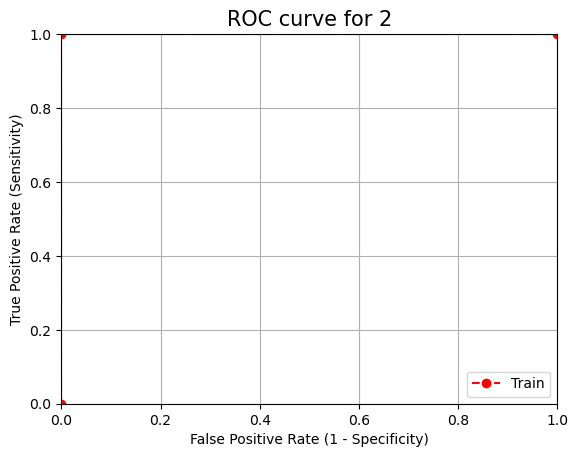

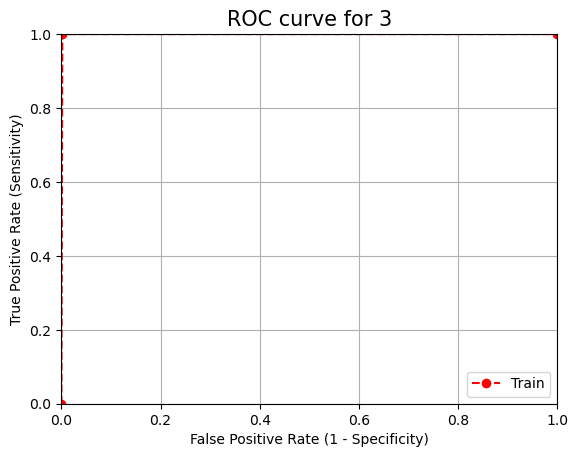

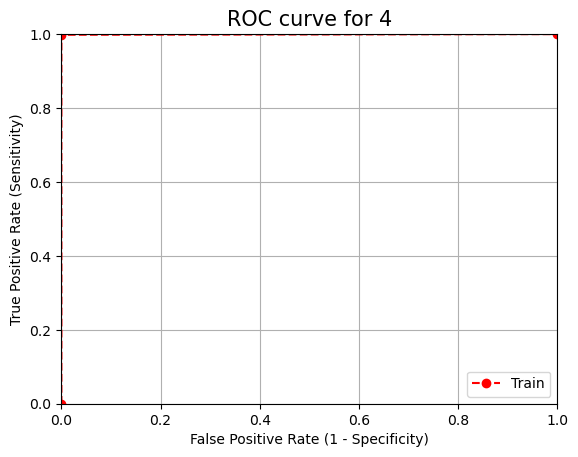

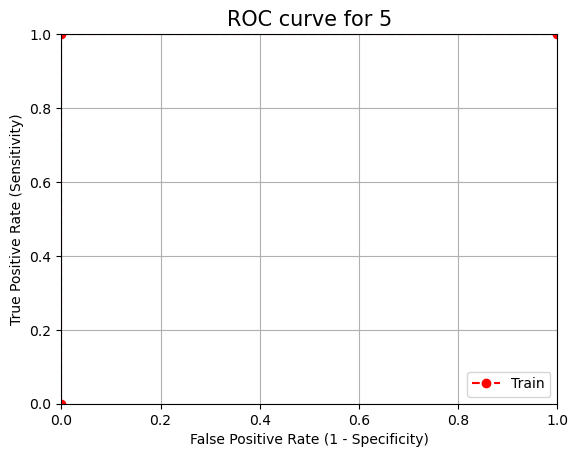

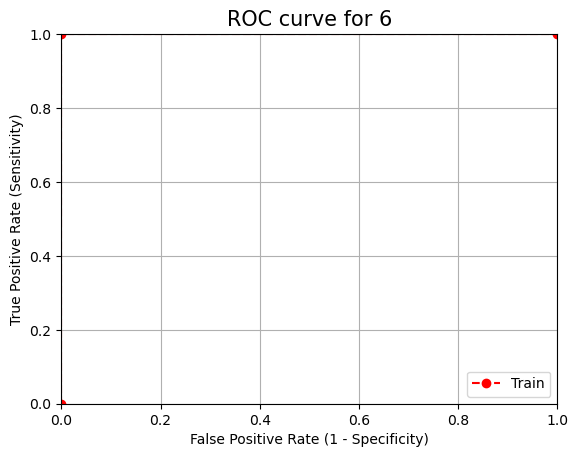

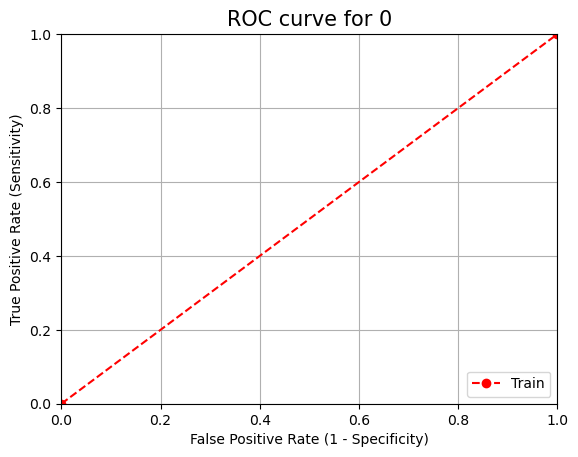

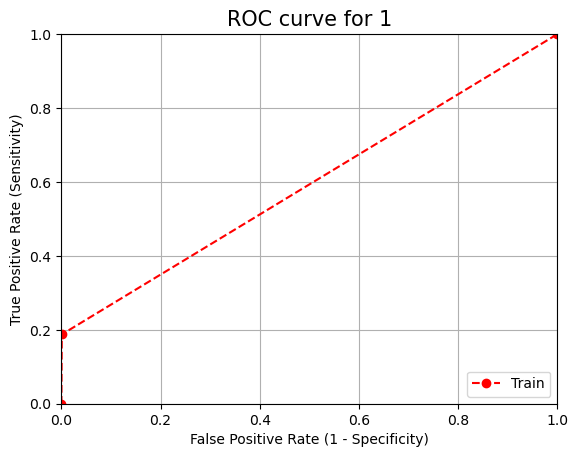

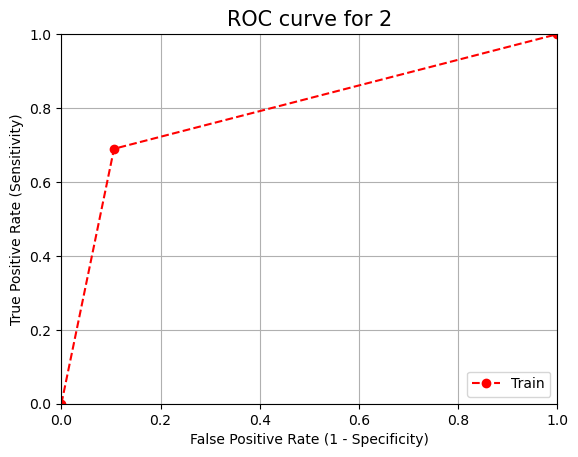

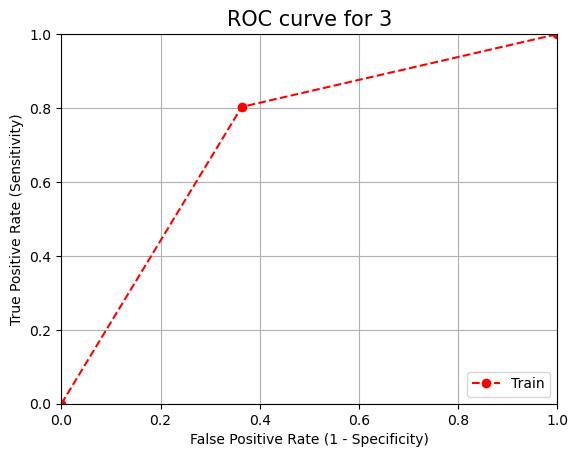

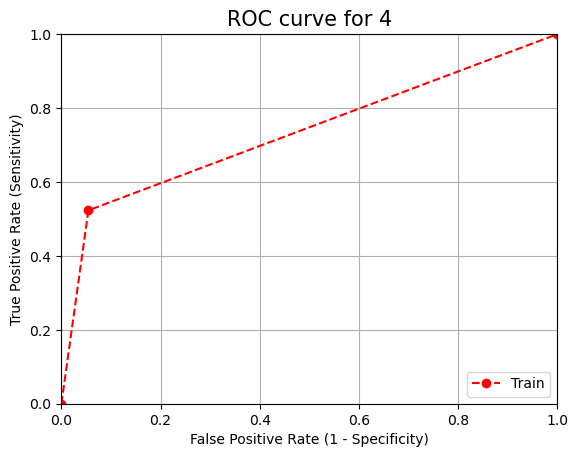

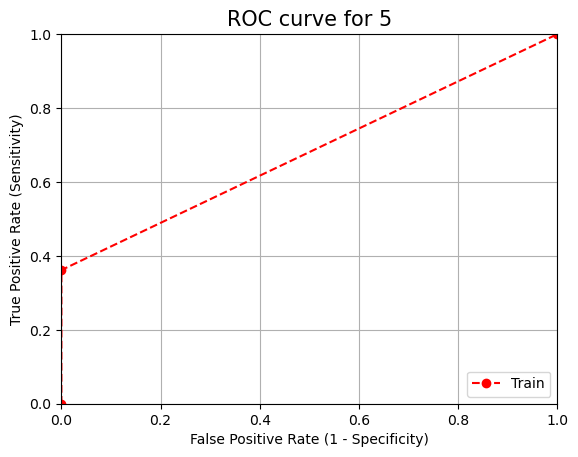

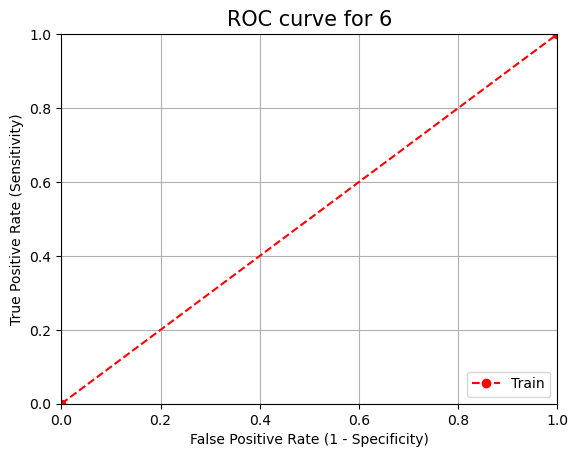

In [446]:
plt.subplots(figsize = (10, 6))
y_train_pred_xgb = model_xgb.predict(x_train_df)
y_test_pred_xgb = model_xgb.predict(x_test_df)

AUC_train_values['xgb'] = plot_roc_auc_curve(y_train, y_train_pred_xgb)

AUC_test_values['xgb'] = plot_roc_auc_curve(y_test, y_test_pred_xgb)
# additional line
#precison_recall_curve(y_train, y_train_pred_xgb, y_test, y_test_pred_xgb

## Best XGBoost Model

In [447]:
# printing the optimal accuracy score and hyperparameters
print("best f1_score",GS_xgb.best_score_)
print(GS_xgb.best_estimator_)

best f1_score 0.6431640362348141
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.4, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=6800, n_jobs=None, nthread=4,
              num_parallel_tree=None, ...)


In [448]:
# GridSearchCV Model
joblib.dump(GS_xgb,"cv_xgb.h5")
# The best model
joblib.dump(model_xgb,"best_xgb.h5")

['best_xgb.h5']

In [449]:
# Other way of getting r2_score

f1_final_test['xgb']= model_xgb.score(x_test_df, y_test)

In [450]:
f1_final_test

{'Decision_Tree': 0.5860979462875198, 'xgb': 0.6832543443917851}

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.86      0.19      0.31        32
           2       0.72      0.69      0.71       361
           3       0.65      0.80      0.72       584
           4       0.69      0.52      0.59       237
           5       1.00      0.36      0.53        47
           6       0.00      0.00      0.00         1

    accuracy                           0.68      1266
   macro avg       0.56      0.37      0.41      1266
weighted avg       0.70      0.68      0.67      1266



C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


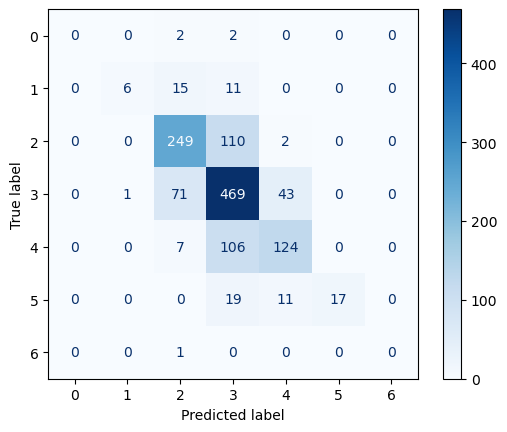

In [451]:
from sklearn.metrics import ConfusionMatrixDisplay


y_pred_xgb = GS_xgb.best_estimator_.predict(x_test_df)

print(classification_report(y_test, y_pred_xgb))

cm = confusion_matrix(y_test, y_pred_xgb)

disp = ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = GS_xgb.best_estimator_.classes_)
#disp = disp.plot(cmap=plt.cm.Blues,values_format='g')
disp.plot(cmap = plt.cm.Blues,values_format='g')
plt.show()

## Random Forest

### Tuning Max_depth

In [464]:
range_3 = np.arange(4,25,1)
print("Total Fits for 5 splits:",5*range_3.shape[0])

Total Fits for 5 splits: 105


In [465]:
params = {'n_estimators' : [60],
            'max_features' : [7],
              'class_weight':[{0: 1.5, 1: 1, 2: 0.8, 3: 0.6, 4: 0.8, 5: 1, 6: 2}],
              'max_depth': range_3
          }

folds = KFold(n_splits = 5, shuffle = True, random_state = 4)

# instantiate the model
model = RandomForestClassifier()


# set up grid search scheme
# note that we are still using the 5 fold CV scheme we set up earlier
# r2 y default
model_cv = GridSearchCV(estimator = model, param_grid = params,
                        cv = folds,
                        verbose = 1,
                        scoring = 'f1_weighted',
                       return_train_score=True)

In [466]:
model_cv.fit(x_train_df,y_train)

Fitting 5 folds for each of 21 candidates, totalling 105 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=RandomForestClassifier(),
             param_grid={'class_weight': [{0: 1.5, 1: 1, 2: 0.8, 3: 0.6, 4: 0.8,
                                           5: 1, 6: 2}],
                         'max_depth': array([ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
       21, 22, 23, 24]),
                         'max_features': [7], 'n_estimators': [60]},
             return_train_score=True, scoring='f1_weighted', verbose=1)

In [467]:
score = pd.DataFrame(model_cv.cv_results_)
print(model_cv.best_params_)
print(model_cv.best_score_)

{'class_weight': {0: 1.5, 1: 1, 2: 0.8, 3: 0.6, 4: 0.8, 5: 1, 6: 2}, 'max_depth': 16, 'max_features': 7, 'n_estimators': 60}
0.6371152617622438


In [ ]:
"""
Best Parameter:  {'class_weight': {0: 1.5, 1: 1, 2: 0.8, 3: 0.6, 4: 0.8, 5: 1, 6: 2}, 'max_features': 7, 'n_estimators': 60}
Best f1_weighted Score:  0.6350155738188306

{'class_weight': {0: 1.5, 1: 1, 2: 0.8, 3: 0.6, 4: 0.8, 5: 1, 6: 2}, 'max_depth': 16, 'max_features': 7, 'n_estimators': 60}
0.6371152617622438
"""

In [468]:
plot_range = range_3

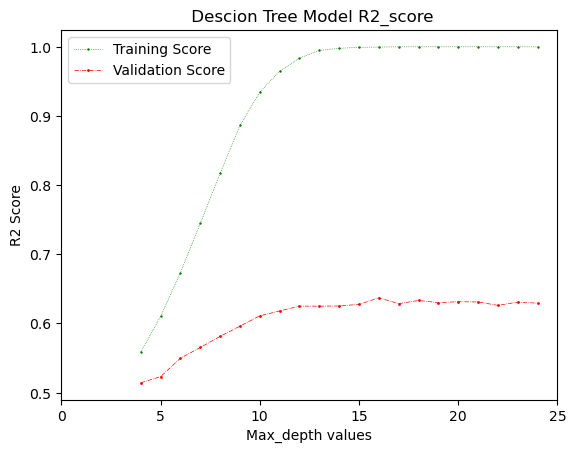

In [469]:
plt.plot(plot_range,score['mean_train_score'], 'g+:',linewidth=0.5,label="Training Score",markersize=1)
plt.plot(plot_range,score['mean_test_score'], 'ro-.',linewidth=0.5,label="Validation Score",markersize =1)
plt.title(" Descion Tree Model R2_score")
#plt.axis([0,0,7])
plt.xlabel("Max_depth values")
plt.ylabel("R2 Score")
plt.xlim([0,25])
#plt.ylim([0.2,0.9])
plt.legend(loc=2)
plt.show()

### Tuning Max_depth

In [464]:
range_3 = np.arange(4,25,1)
print("Total Fits for 5 splits:",5*range_3.shape[0])

Total Fits for 5 splits: 105


In [465]:
params = {'n_estimators' : [60],
            'max_features' : [7],
              'class_weight':[{0: 1.5, 1: 1, 2: 0.8, 3: 0.6, 4: 0.8, 5: 1, 6: 2}],
              'max_depth': range_3
          }

folds = KFold(n_splits = 5, shuffle = True, random_state = 4)

# instantiate the model
model = RandomForestClassifier()


# set up grid search scheme
# note that we are still using the 5 fold CV scheme we set up earlier
# r2 y default
model_cv = GridSearchCV(estimator = model, param_grid = params,
                        cv = folds,
                        verbose = 1,
                        scoring = 'f1_weighted',
                       return_train_score=True)

In [466]:
model_cv.fit(x_train_df,y_train)

Fitting 5 folds for each of 21 candidates, totalling 105 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=RandomForestClassifier(),
             param_grid={'class_weight': [{0: 1.5, 1: 1, 2: 0.8, 3: 0.6, 4: 0.8,
                                           5: 1, 6: 2}],
                         'max_depth': array([ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
       21, 22, 23, 24]),
                         'max_features': [7], 'n_estimators': [60]},
             return_train_score=True, scoring='f1_weighted', verbose=1)

In [467]:
score = pd.DataFrame(model_cv.cv_results_)
print(model_cv.best_params_)
print(model_cv.best_score_)

{'class_weight': {0: 1.5, 1: 1, 2: 0.8, 3: 0.6, 4: 0.8, 5: 1, 6: 2}, 'max_depth': 16, 'max_features': 7, 'n_estimators': 60}
0.6371152617622438


In [ ]:
"""
Best Parameter:  {'class_weight': {0: 1.5, 1: 1, 2: 0.8, 3: 0.6, 4: 0.8, 5: 1, 6: 2}, 'max_features': 7, 'n_estimators': 60}
Best f1_weighted Score:  0.6350155738188306

{'class_weight': {0: 1.5, 1: 1, 2: 0.8, 3: 0.6, 4: 0.8, 5: 1, 6: 2}, 'max_depth': 16, 'max_features': 7, 'n_estimators': 60}
0.6371152617622438
"""

In [468]:
plot_range = range_3

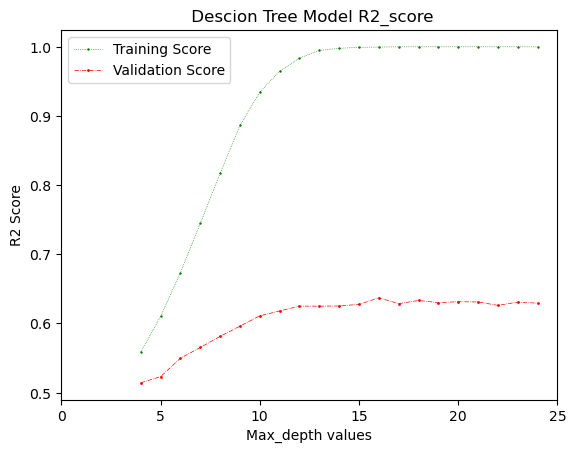

In [469]:
plt.plot(plot_range,score['mean_train_score'], 'g+:',linewidth=0.5,label="Training Score",markersize=1)
plt.plot(plot_range,score['mean_test_score'], 'ro-.',linewidth=0.5,label="Validation Score",markersize =1)
plt.title(" Descion Tree Model R2_score")
#plt.axis([0,0,7])
plt.xlabel("Max_depth values")
plt.ylabel("R2 Score")
plt.xlim([0,25])
#plt.ylim([0.2,0.9])
plt.legend(loc=2)
plt.show()

### Combined Model

In [463]:
x1=len(list(range(10,200,20)))
range_3 = np.arange(5,100,30)
x1*len(range_3)*5

200

In [474]:
#'max_leaf_nodes':[None],
# 'min_weight_fraction_leaf':[0.0],

# parameter grid
param_grid = {'n_estimators' : [50,60,70],
            'max_features' : [7],
              'class_weight':[{0: 1.5, 1: 1, 2: 0.8, 3: 0.6, 4: 0.8, 5: 1, 6: 2}]
              
              
              
              
              
    
             }
scoring_RF = 'f1_weighted'
model_RF = RandomForestClassifier()

folds = KFold(n_splits = 5, shuffle = True, random_state = 4)


GS_RF = GridSearchCV(model_RF,cv = folds,
                               param_grid=param_grid,
                               scoring = scoring_RF,
                               return_train_score=True,
                               verbose = 1)

In [476]:
GS_RF.fit(x_train_df,y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=RandomForestClassifier(),
             param_grid={'class_weight': [{0: 1.5, 1: 1, 2: 0.8, 3: 0.6, 4: 0.8,
                                           5: 1, 6: 2}],
                         'max_features': [7], 'n_estimators': [50, 60, 70]},
             return_train_score=True, scoring='f1_weighted', verbose=1)

In [477]:

model_RF = GS_RF.best_estimator_
model_RF.fit(x_train_df,y_train)

f1_final_values['RF'] = GS_RF.best_score_
print("Best Parameter: ",GS_RF.best_params_)
print(f"Best {scoring_RF} Score: ",GS_RF.best_score_)

Best Parameter:  {'class_weight': {0: 1.5, 1: 1, 2: 0.8, 3: 0.6, 4: 0.8, 5: 1, 6: 2}, 'max_features': 7, 'n_estimators': 50}
Best f1_weighted Score:  0.6339544755114601


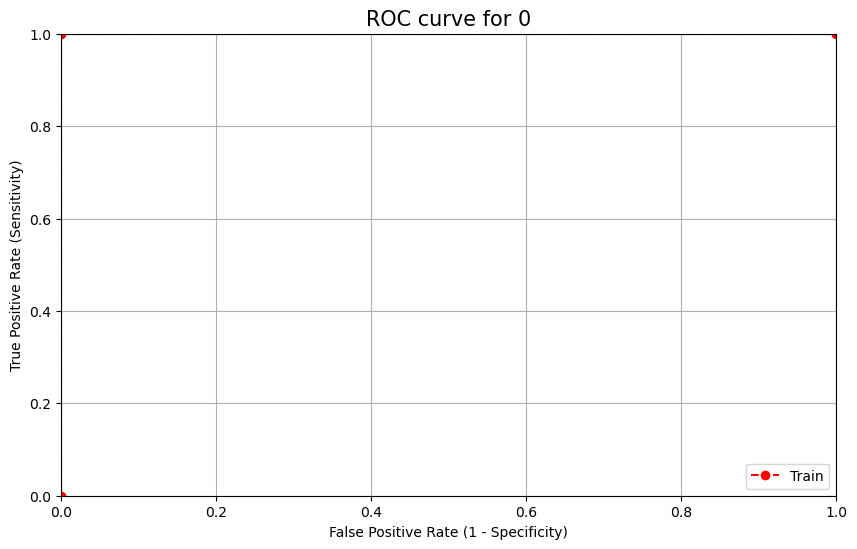

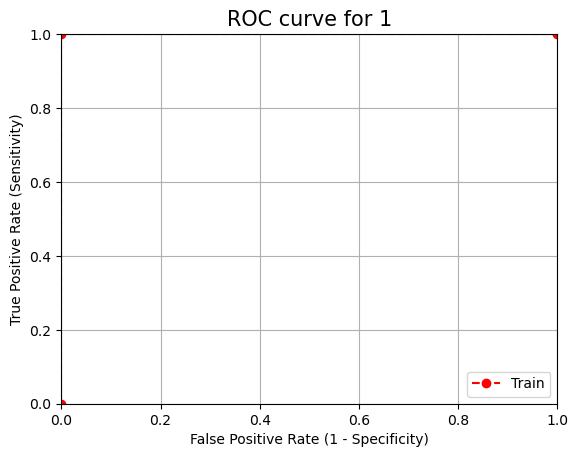

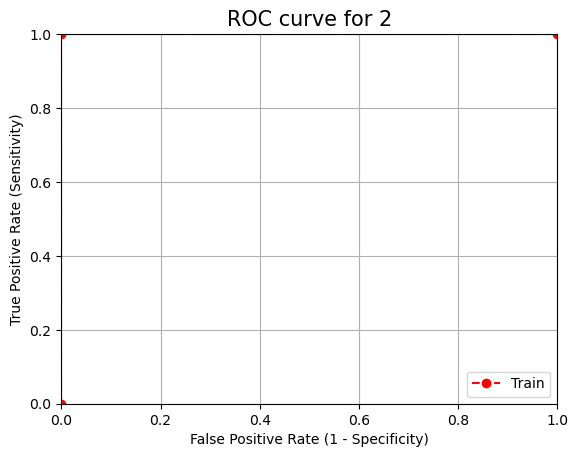

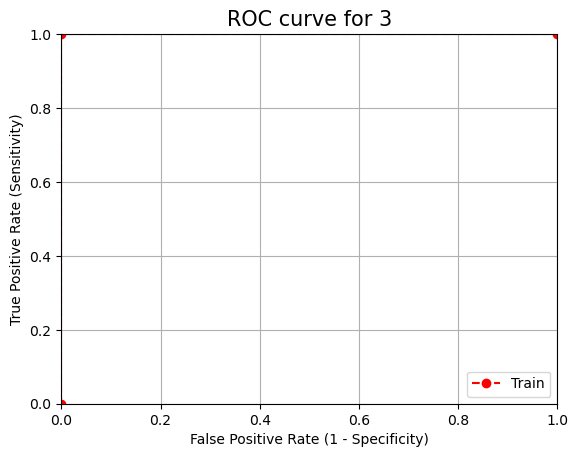

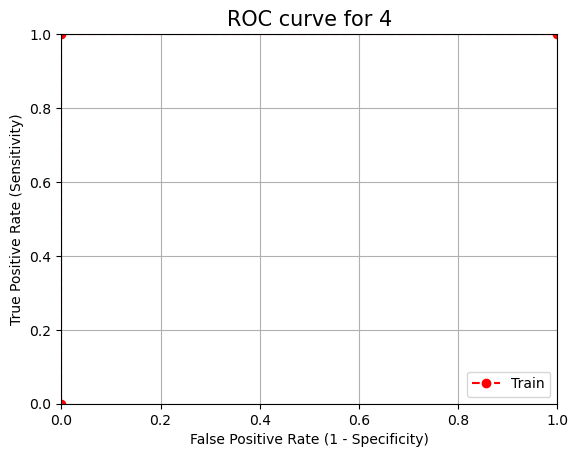

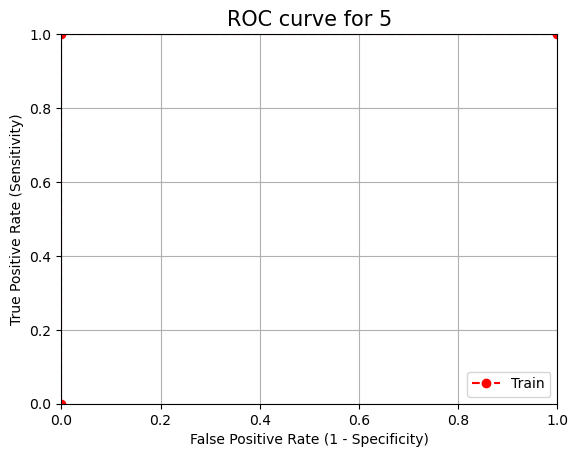

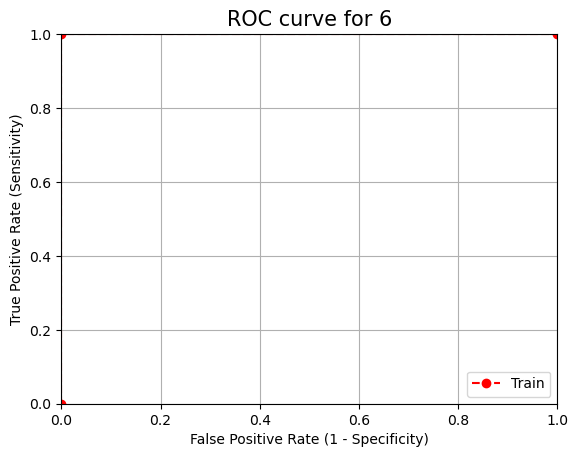

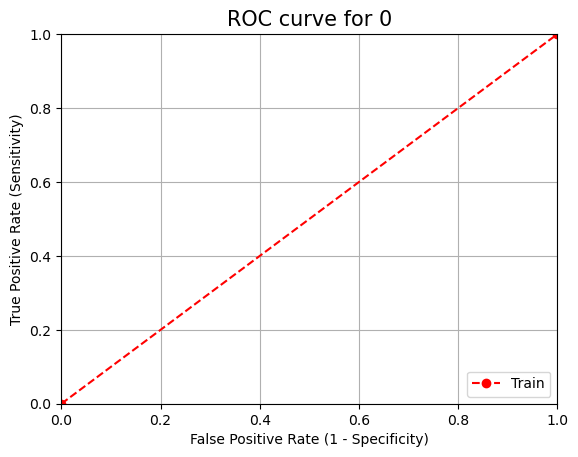

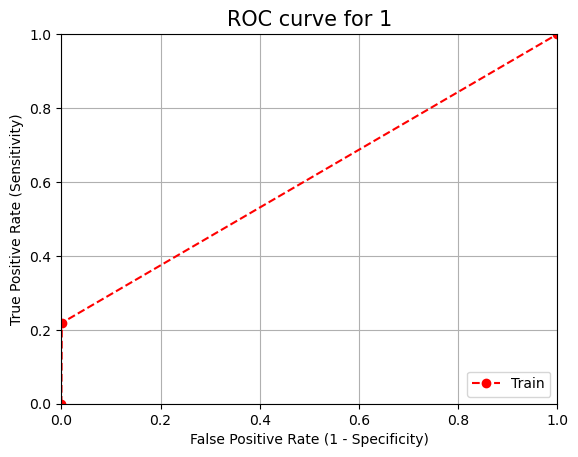

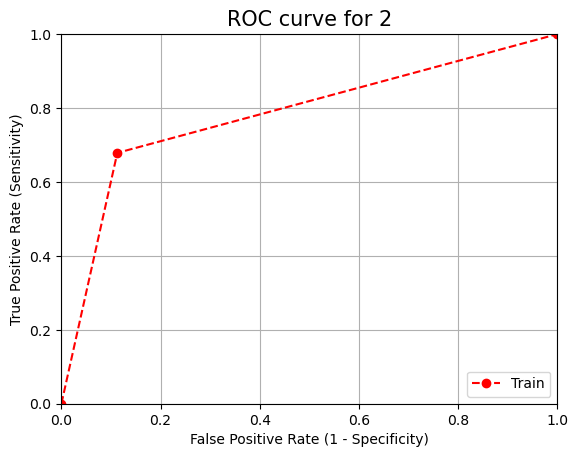

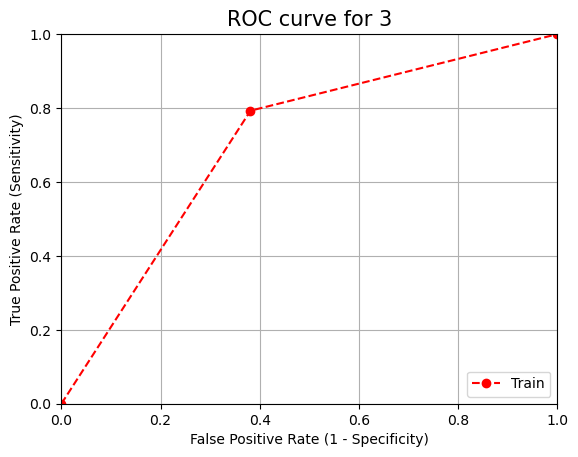

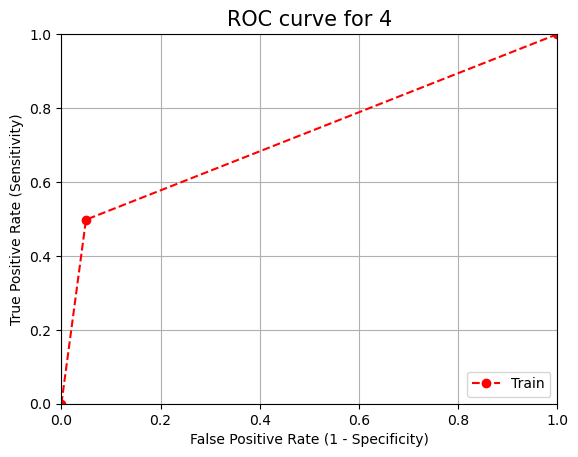

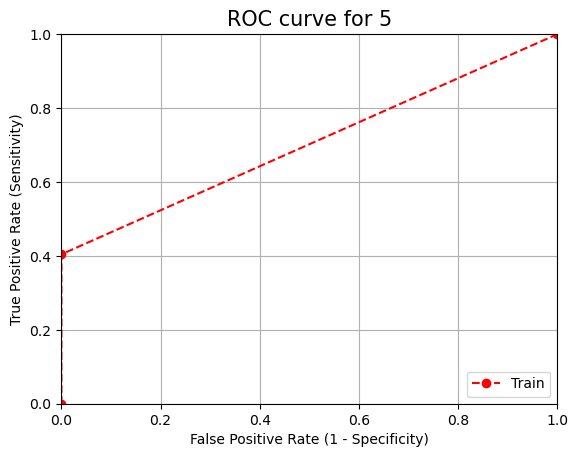

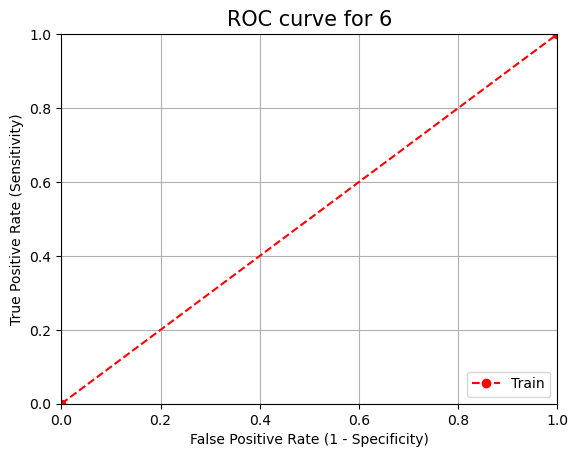

In [479]:
plt.subplots(figsize = (10, 6))
y_train_pred_RF = model_RF.predict(x_train_df)
y_test_pred_RF = model_RF.predict(x_test_df)

AUC_train_values['RF'] = plot_roc_auc_curve(y_train, y_train_pred_RF)

AUC_test_values['RF'] = plot_roc_auc_curve(y_test, y_test_pred_RF)
# additional line
#precison_recall_curve(y_train, y_train_pred_RF, y_test, y_test_pred_RF

## Best Random Forest Model

In [480]:
# printing the optimal accuracy score and hyperparameters
print("best f1_score",GS_RF.best_score_)
print(GS_RF.best_estimator_)

best f1_score 0.6339544755114601
RandomForestClassifier(class_weight={0: 1.5, 1: 1, 2: 0.8, 3: 0.6, 4: 0.8, 5: 1,
                                     6: 2},
                       max_features=7, n_estimators=50)


In [481]:
# GridSearchCV Model
joblib.dump(GS_RF,"cv_RF.h5")
# The best model
joblib.dump(model_RF,"best_RF.h5")

['best_RF.h5']

In [482]:
# Other way of getting r2_score

f1_final_test['RF']= model_RF.score(x_test_df, y_test)

In [483]:
f1_final_test

{'Decision_Tree': 0.5860979462875198,
 'xgb': 0.6832543443917851,
 'RF': 0.6729857819905213}

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.88      0.22      0.35        32
           2       0.71      0.68      0.69       361
           3       0.64      0.79      0.71       584
           4       0.70      0.50      0.58       237
           5       1.00      0.40      0.58        47
           6       0.00      0.00      0.00         1

    accuracy                           0.67      1266
   macro avg       0.56      0.37      0.42      1266
weighted avg       0.69      0.67      0.66      1266



C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


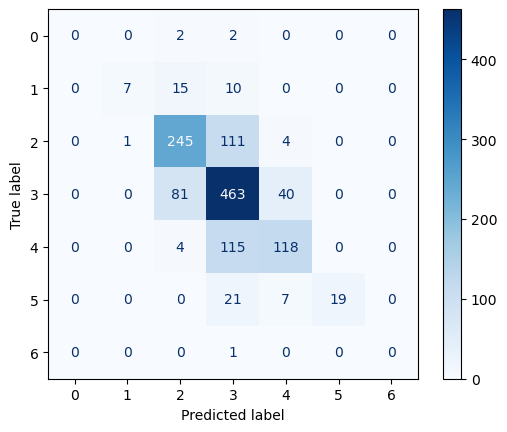

In [484]:
from sklearn.metrics import ConfusionMatrixDisplay


y_pred_RF = GS_RF.best_estimator_.predict(x_test_df)

print(classification_report(y_test, y_pred_RF))

cm = confusion_matrix(y_test, y_pred_RF)

disp = ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = GS_RF.best_estimator_.classes_)
#disp = disp.plot(cmap=plt.cm.Blues,values_format='g')
disp.plot(cmap = plt.cm.Blues,values_format='g')
plt.show()

## SVC

In [495]:
#'max_leaf_nodes':[None],
# 'min_weight_fraction_leaf':[0.0],

# parameter grid
param_grid = {'C':np.arange(0.4,1,0.1),
          'class_weight':[{0: 1.5, 1: 1, 2: 0.8, 3: 0.6, 4: 0.8, 5: 1, 6: 2}],
          'kernel':['linear', 'poly', 'rbf', 'sigmoid' ]
              
              
              
    
             }
scoring_SVC = 'f1_weighted'
model_SVC = SVC()

folds = KFold(n_splits = 5, shuffle = True, random_state = 4)


GS_SVC = GridSearchCV(model_SVC,cv = folds,
                               param_grid=param_grid,
                               scoring = scoring_SVC,
                               return_train_score=True,
                               verbose = 1)

In [496]:
GS_SVC.fit(x_train_df,y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=SVC(),
             param_grid={'C': array([0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                         'class_weight': [{0: 1.5, 1: 1, 2: 0.8, 3: 0.6, 4: 0.8,
                                           5: 1, 6: 2}],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             return_train_score=True, scoring='f1_weighted', verbose=1)

In [497]:

model_SVC = GS_SVC.best_estimator_
model_SVC.fit(x_train_df,y_train)

f1_final_values['SVC'] = GS_SVC.best_score_
print("Best Parameter: ",GS_SVC.best_params_)
print(f"Best {scoring_SVC} Score: ",GS_SVC.best_score_)

Best Parameter:  {'C': 0.7999999999999999, 'class_weight': {0: 1.5, 1: 1, 2: 0.8, 3: 0.6, 4: 0.8, 5: 1, 6: 2}, 'kernel': 'rbf'}
Best f1_weighted Score:  0.5435255173181094


In [ ]:
"""
Best Parameter:  {'C': 0.8, 'class_weight': {0: 1.5, 1: 1, 2: 0.8, 3: 0.6, 4: 0.8, 5: 1, 6: 2}, 'kernel': 'rbf'}
Best f1_weighted Score:  0.5435255173181094

Best Parameter:  {'criterion': 'entropy', 'max_depth': 18, 'max_features': 7, 'min_samples_split': 3}
Best f1_weighted Score:  0.5711406429209784

Best Parameter:  {'class_weight': {0: 1, 1: 1, 2: 1, 3: 0.6, 4: 1, 5: 1, 6: 1}, 'criterion': 'entropy', 'max_depth': 18, 'max_features': 6, 'min_samples_split': 2}
Best f1_weighted Score:  0.5717408424074909

Best Parameter:  {'class_weight': {0: 1, 1: 1, 2: 0.8, 3: 0.6, 4: 0.8, 5: 1, 6: 1.5}, 'criterion': 'gini', 'max_depth': 16, 'max_features': 6, 'min_samples_split': 2}
Best f1_weighted Score:  0.5726053157875484

Best Parameter:  {'class_weight': {0: 1.5, 1: 1, 2: 0.8, 3: 0.6, 4: 0.8, 5: 1, 6: 2}, 'criterion': 'entropy', 'max_depth': 18, 'max_features': 7, 'min_samples_split': 4}
Best f1_weighted Score:  0.5730889191568533

"""

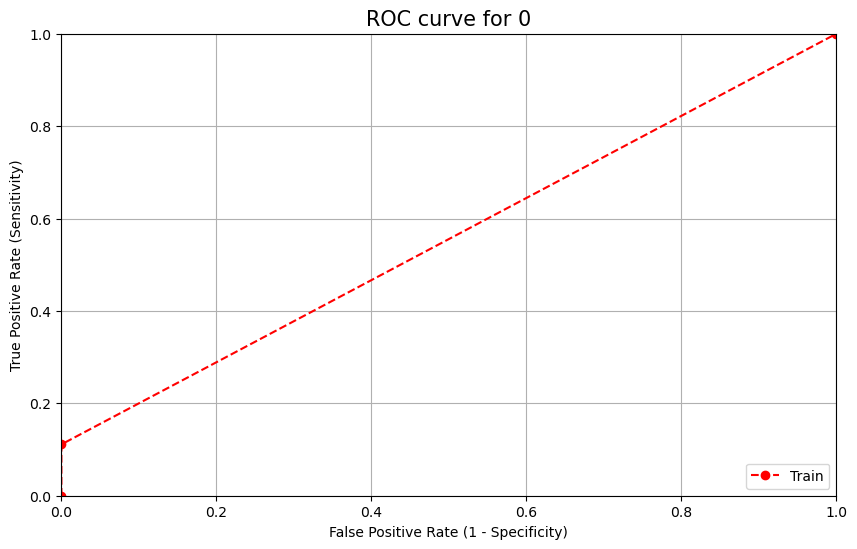

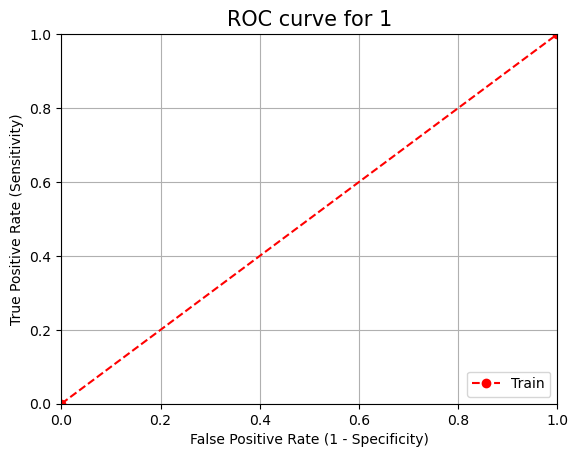

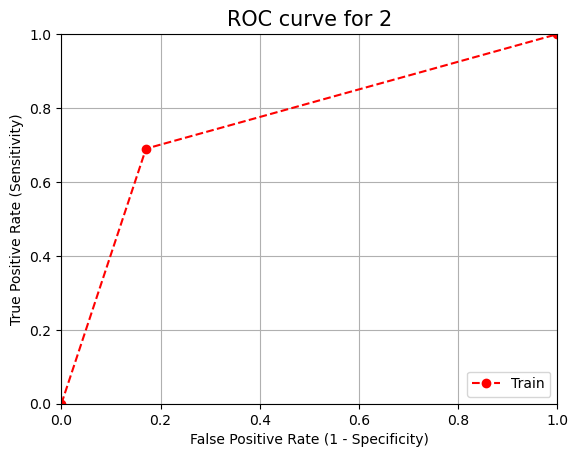

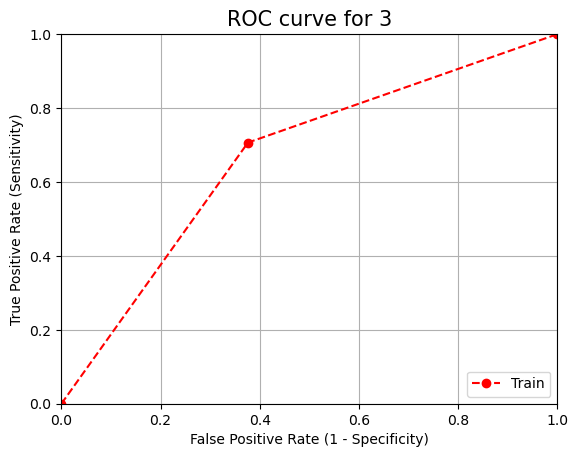

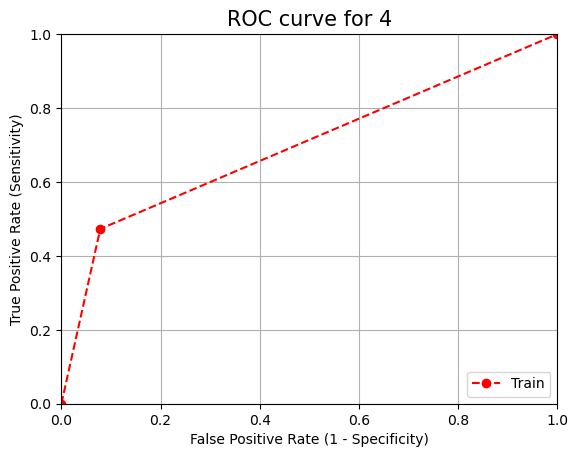

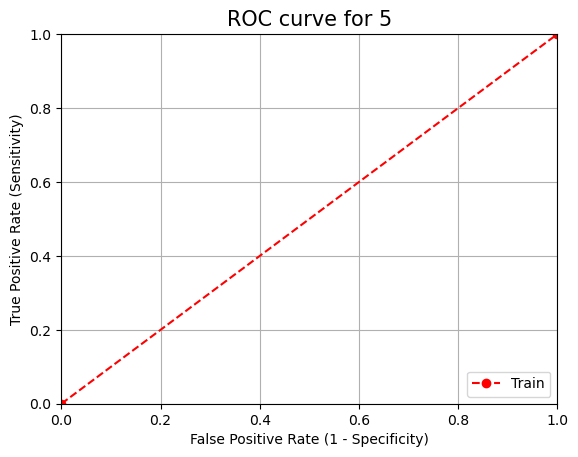

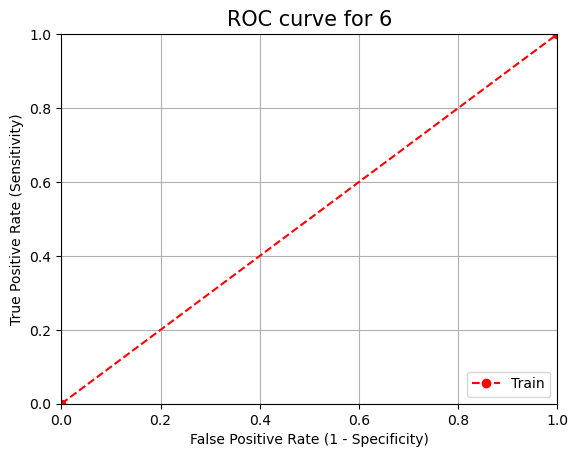

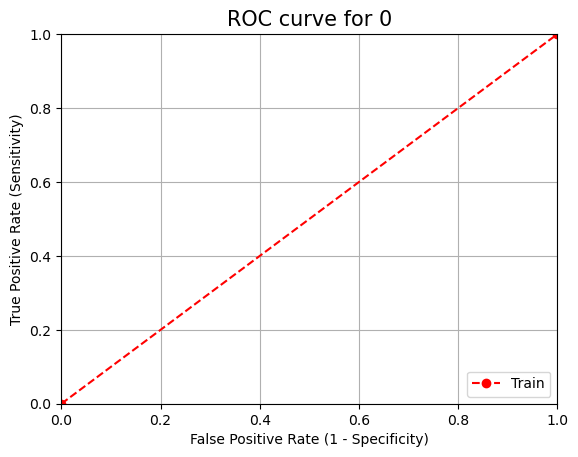

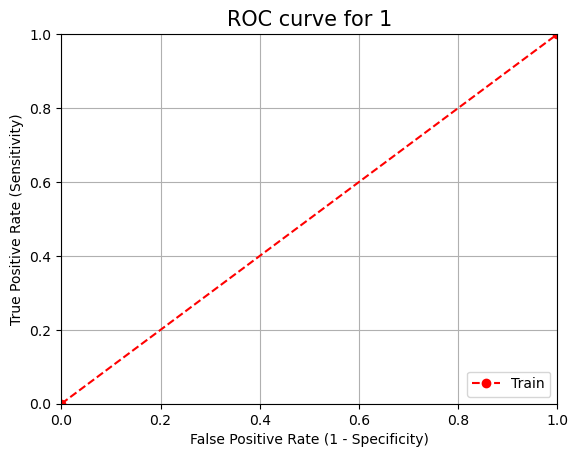

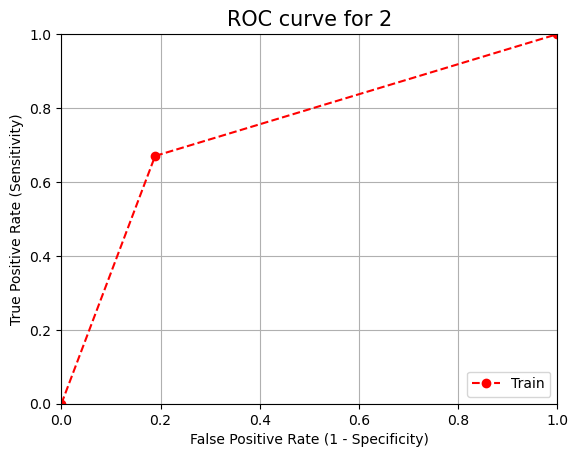

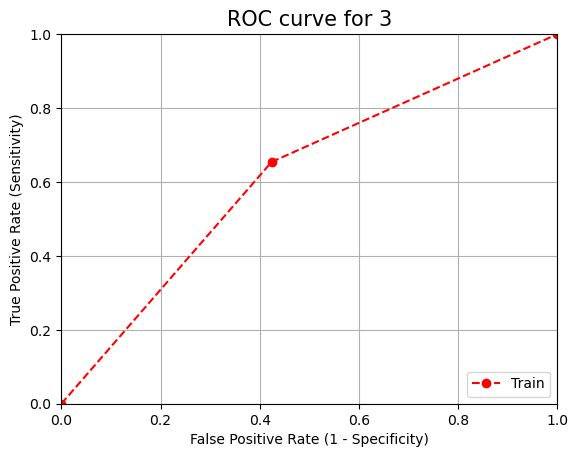

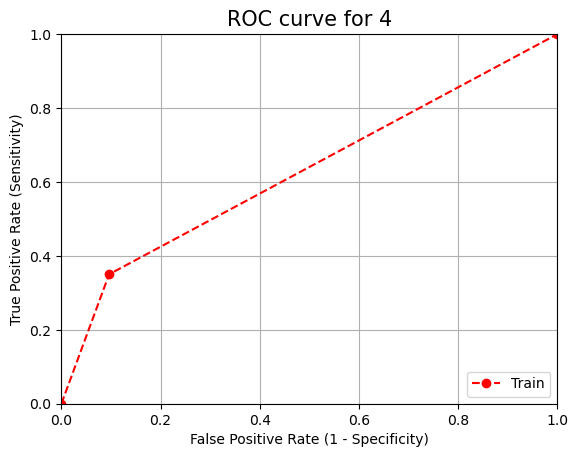

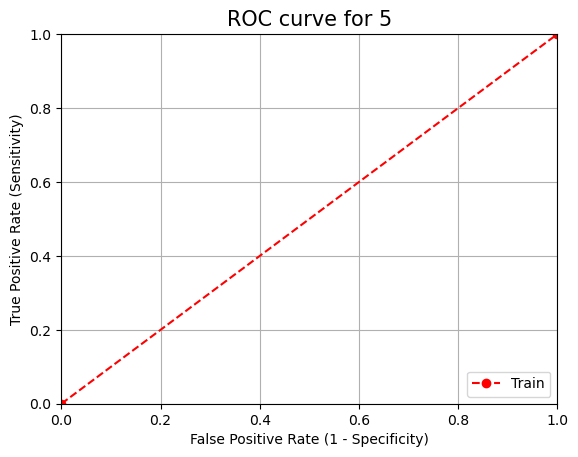

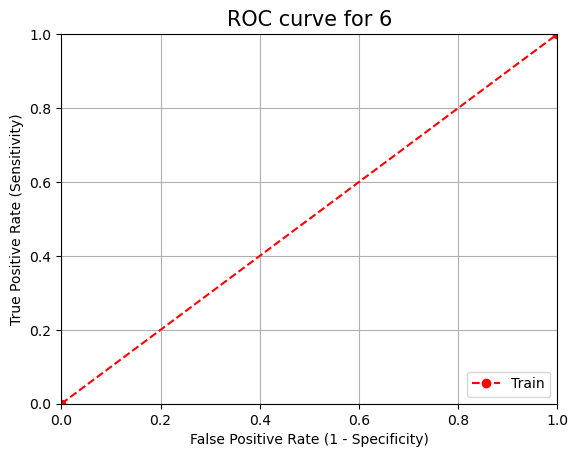

In [491]:
plt.subplots(figsize = (10, 6))
y_train_pred_SVC = model_SVC.predict(x_train_df)
y_test_pred_SVC = model_SVC.predict(x_test_df)

AUC_train_values['SVC'] = plot_roc_auc_curve(y_train, y_train_pred_SVC)

AUC_test_values['SVC'] = plot_roc_auc_curve(y_test, y_test_pred_SVC)
# additional line
#precison_recall_curve(y_train, y_train_pred_SVC, y_test, y_test_pred_SVC

## Best SVC Model

In [498]:
# printing the optimal accuracy score and hyperparameters
print("best f1_score",GS_SVC.best_score_)
print(GS_SVC.best_estimator_)

best f1_score 0.5435255173181094
SVC(C=0.7999999999999999,
    class_weight={0: 1.5, 1: 1, 2: 0.8, 3: 0.6, 4: 0.8, 5: 1, 6: 2})


In [499]:
# GridSearchCV Model
joblib.dump(GS_SVC,"cv_SVC.h5")
# The best model
joblib.dump(model_SVC,"best_SVC.h5")

['best_SVC.h5']

In [500]:
# Other way of getting r2_score

f1_final_test['SVC']= model_SVC.score(x_test_df, y_test)

In [501]:
f1_final_test

{'Decision_Tree': 0.5860979462875198,
 'xgb': 0.6832543443917851,
 'RF': 0.6729857819905213,
 'SVC': 0.5529225908372828}

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        32
           2       0.59      0.67      0.63       361
           3       0.56      0.65      0.60       584
           4       0.44      0.33      0.38       237
           5       0.00      0.00      0.00        47
           6       0.00      0.00      0.00         1

    accuracy                           0.55      1266
   macro avg       0.23      0.24      0.23      1266
weighted avg       0.51      0.55      0.53      1266



C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


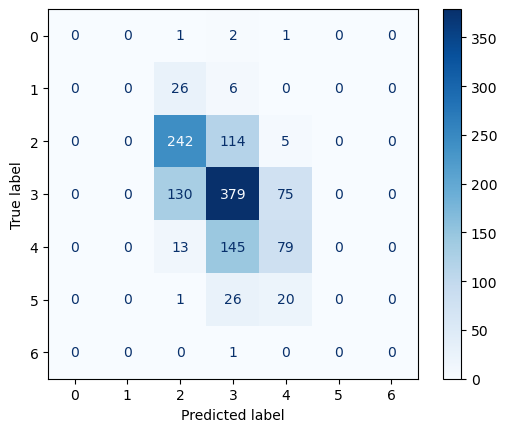

In [502]:
from sklearn.metrics import ConfusionMatrixDisplay


y_pred_SVC = GS_SVC.best_estimator_.predict(x_test_df)

print(classification_report(y_test, y_pred_SVC))

cm = confusion_matrix(y_test, y_pred_SVC)

disp = ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = GS_SVC.best_estimator_.classes_)
#disp = disp.plot(cmap=plt.cm.Blues,values_format='g')
disp.plot(cmap = plt.cm.Blues,values_format='g')
plt.show()

## Gradient Boosting

### Initial Setup

In [339]:
range_2 = np.arange(500,650,1)
print("Total Fits for 5 splits:",5*range_2.shape[0])

Total Fits for 5 splits: 750


In [513]:
params = {
          
          }

folds = KFold(n_splits = 5, shuffle = True, random_state = 4)

# instantiate the model
model = GradientBoostingClassifier(learning_rate=0.1, min_samples_split=500,
                                   min_samples_leaf=50,max_depth=8,
                                   max_features='sqrt',subsample=0.8,random_state=10)


# set up grid search scheme
# note that we are still using the 5 fold CV scheme we set up earlier
# r2 y default
model_cv = GridSearchCV(estimator = model, param_grid = params,
                        cv = folds,
                        verbose = 1,
                        scoring = 'f1_weighted',
                       return_train_score=True)

In [514]:
model_cv.fit(x_train_df,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=GradientBoostingClassifier(max_depth=8,
                                                  max_features='sqrt',
                                                  min_samples_leaf=50,
                                                  min_samples_split=500,
                                                  random_state=10,
                                                  subsample=0.8),
             param_grid={}, return_train_score=True, scoring='f1_weighted',
             verbose=1)

In [515]:
score = pd.DataFrame(model_cv.cv_results_)
print(model_cv.best_params_)
print(model_cv.best_score_)

{}
0.5762008736289627


In [343]:
"""
{}
0.5762008736289627


"""

"\n{'max_depth': 17}\n0.5661145941282503\n\n{'max_depth': 17, 'min_samples_leaf': 1}\n0.5661145941282503\n\n{'max_depth': 17, 'min_samples_leaf': 1, 'min_samples_split': 2}\n0.5661145941282503\n\n{'max_depth': 17, 'max_features': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}\n0.5661145941282503\n\n"

In [344]:
plot_range =range_2
print(range_2)

[500 501 502 503 504 505 506 507 508 509 510 511 512 513 514 515 516 517
 518 519 520 521 522 523 524 525 526 527 528 529 530 531 532 533 534 535
 536 537 538 539 540 541 542 543 544 545 546 547 548 549 550 551 552 553
 554 555 556 557 558 559 560 561 562 563 564 565 566 567 568 569 570 571
 572 573 574 575 576 577 578 579 580 581 582 583 584 585 586 587 588 589
 590 591 592 593 594 595 596 597 598 599 600 601 602 603 604 605 606 607
 608 609 610 611 612 613 614 615 616 617 618 619 620 621 622 623 624 625
 626 627 628 629 630 631 632 633 634 635 636 637 638 639 640 641 642 643
 644 645 646 647 648 649]


###  Tune max_depth and num_samples_split

In [518]:
range_2 = np.arange(5,16,2)
range_3 = np.arange(200,1000,200)
print("Total Fits for 5 splits:",5*range_2.shape[0]*range_3.shape[0])

Total Fits for 5 splits: 120


In [519]:
params = {'max_depth':range_2,
          'min_samples_split': range_3
          
          }

folds = KFold(n_splits = 5, shuffle = True, random_state = 4)

# instantiate the model
model = GradientBoostingClassifier(learning_rate=0.1,
                                   min_samples_leaf=50,
                                   max_features='sqrt',subsample=0.8,random_state=10)


# set up grid search scheme
# note that we are still using the 5 fold CV scheme we set up earlier
# r2 y default
model_cv = GridSearchCV(estimator = model, param_grid = params,
                        cv = folds,
                        verbose = 1,
                        scoring = 'f1_weighted',
                       return_train_score=True)

In [520]:
model_cv.fit(x_train_df,y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=GradientBoostingClassifier(max_features='sqrt',
                                                  min_samples_leaf=50,
                                                  random_state=10,
                                                  subsample=0.8),
             param_grid={'max_depth': array([ 5,  7,  9, 11, 13, 15]),
                         'min_samples_split': array([200, 400, 600, 800])},
             return_train_score=True, scoring='f1_weighted', verbose=1)

In [521]:
score = pd.DataFrame(model_cv.cv_results_)
print(model_cv.best_params_)
print(model_cv.best_score_)

{'max_depth': 13, 'min_samples_split': 200}
0.612720921576928


In [343]:
"""
With base
learning_rate=0.1, min_samples_split=500,
                                   min_samples_leaf=50,max_depth=8,
                                   max_features='sqrt',subsample=0.8,random_state=10)

{}
0.5762008736289627

{'max_depth': 13, 'min_samples_split': 200}
0.612720921576928
"""

"\n{'max_depth': 17}\n0.5661145941282503\n\n{'max_depth': 17, 'min_samples_leaf': 1}\n0.5661145941282503\n\n{'max_depth': 17, 'min_samples_leaf': 1, 'min_samples_split': 2}\n0.5661145941282503\n\n{'max_depth': 17, 'max_features': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}\n0.5661145941282503\n\n"

In [344]:
plot_range =range_2
print(range_2)

[500 501 502 503 504 505 506 507 508 509 510 511 512 513 514 515 516 517
 518 519 520 521 522 523 524 525 526 527 528 529 530 531 532 533 534 535
 536 537 538 539 540 541 542 543 544 545 546 547 548 549 550 551 552 553
 554 555 556 557 558 559 560 561 562 563 564 565 566 567 568 569 570 571
 572 573 574 575 576 577 578 579 580 581 582 583 584 585 586 587 588 589
 590 591 592 593 594 595 596 597 598 599 600 601 602 603 604 605 606 607
 608 609 610 611 612 613 614 615 616 617 618 619 620 621 622 623 624 625
 626 627 628 629 630 631 632 633 634 635 636 637 638 639 640 641 642 643
 644 645 646 647 648 649]


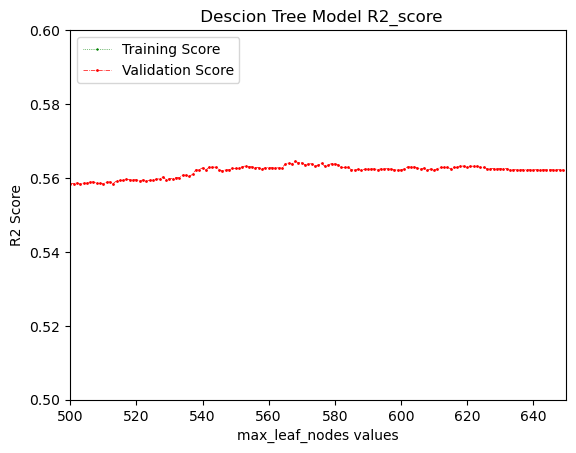

In [382]:
plt.plot(plot_range,score['mean_train_score'], 'g+:',linewidth=0.5,label="Training Score",markersize=1)
plt.plot(plot_range,score['mean_test_score'], 'ro-.',linewidth=0.5,label="Validation Score",markersize =1)
plt.title(" Descion Tree Model R2_score")
#plt.axis([0,0,7])
plt.xlabel("max_leaf_nodes values")
plt.ylabel("R2 Score")
plt.xlim([500,650])
plt.ylim([0.5,0.6])
plt.legend(loc=2)
plt.show()

###  Tune max_depth and num_samples_split

In [522]:
range_2 = np.arange(30,70,10)
range_3 = np.arange(100,500,100)
print("Total Fits for 5 splits:",5*range_2.shape[0]*range_3.shape[0])

Total Fits for 5 splits: 80


In [530]:
params = {'max_depth':[13],
          'min_samples_split': [200],
          'min_samples_leaf': [50]
          
          }

folds = KFold(n_splits = 5, shuffle = True, random_state = 4)

# instantiate the model
model = GradientBoostingClassifier(learning_rate=0.1,
                                   max_features='sqrt',subsample=0.8,random_state=10)


# set up grid search scheme
# note that we are still using the 5 fold CV scheme we set up earlier
# r2 y default
model_cv = GridSearchCV(estimator = model, param_grid = params,
                        cv = folds,
                        verbose = 1,
                        scoring = 'f1_weighted',
                       return_train_score=True)

In [531]:
model_cv.fit(x_train_df,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=GradientBoostingClassifier(max_features='sqrt',
                                                  random_state=10,
                                                  subsample=0.8),
             param_grid={'max_depth': [13], 'min_samples_leaf': [50],
                         'min_samples_split': [200]},
             return_train_score=True, scoring='f1_weighted', verbose=1)

In [533]:
score = pd.DataFrame(model_cv.cv_results_)
print(model_cv.best_params_)
print(model_cv.best_score_)

{'max_depth': 13, 'min_samples_leaf': 50, 'min_samples_split': 200}
0.612720921576928


In [343]:
"""
With base
learning_rate=0.1, min_samples_split=500,
                                   min_samples_leaf=50,max_depth=8,
                                   max_features='sqrt',subsample=0.8,random_state=10)

{}
0.5762008736289627

{'max_depth': 13, 'min_samples_split': 200}
0.612720921576928


{'max_depth': 13, 'min_samples_leaf': 100, 'min_samples_split': 30}
0.5928053921758808
"""

"\n{'max_depth': 17}\n0.5661145941282503\n\n{'max_depth': 17, 'min_samples_leaf': 1}\n0.5661145941282503\n\n{'max_depth': 17, 'min_samples_leaf': 1, 'min_samples_split': 2}\n0.5661145941282503\n\n{'max_depth': 17, 'max_features': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}\n0.5661145941282503\n\n"

###  Tune max_depth and num_samples_split

In [538]:
range_2 = np.arange(2,11,1)
range_3 = np.arange(100,500,100)
print("Total Fits for 5 splits:",5*range_2.shape[0]*range_3.shape[0])

Total Fits for 5 splits: 180


In [539]:
params = {'max_depth':[8,9,15],
          'min_samples_split': [200],
          'min_samples_leaf': [50],
          'max_features': range_2
          
          }

folds = KFold(n_splits = 5, shuffle = True, random_state = 4)

# instantiate the model
model = GradientBoostingClassifier(learning_rate=0.1,
                                   subsample=0.8,random_state=10)


# set up grid search scheme
# note that we are still using the 5 fold CV scheme we set up earlier
# r2 y default
model_cv = GridSearchCV(estimator = model, param_grid = params,
                        cv = folds,
                        verbose = 1,
                        scoring = 'f1_weighted',
                       return_train_score=True)

In [540]:
model_cv.fit(x_train_df,y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=GradientBoostingClassifier(random_state=10,
                                                  subsample=0.8),
             param_grid={'max_depth': [8, 9, 15],
                         'max_features': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'min_samples_leaf': [50], 'min_samples_split': [200]},
             return_train_score=True, scoring='f1_weighted', verbose=1)

In [541]:
score = pd.DataFrame(model_cv.cv_results_)
print(model_cv.best_params_)
print(model_cv.best_score_)

{'max_depth': 15, 'max_features': 7, 'min_samples_leaf': 50, 'min_samples_split': 200}
0.6199775171609158


In [343]:
"""
With base
learning_rate=0.1, min_samples_split=500,
                                   min_samples_leaf=50,max_depth=8,
                                   max_features='sqrt',subsample=0.8,random_state=10)

{}
0.5762008736289627

{'max_depth': 13, 'min_samples_split': 200}
0.612720921576928


{'max_depth': 13, 'min_samples_leaf': 100, 'min_samples_split': 30}
0.5928053921758808


{'max_depth': 15, 'max_features': 7, 'min_samples_leaf': 50, 'min_samples_split': 200}
0.6199775171609158
"""

"\n{'max_depth': 17}\n0.5661145941282503\n\n{'max_depth': 17, 'min_samples_leaf': 1}\n0.5661145941282503\n\n{'max_depth': 17, 'min_samples_leaf': 1, 'min_samples_split': 2}\n0.5661145941282503\n\n{'max_depth': 17, 'max_features': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}\n0.5661145941282503\n\n"

###  Tuning subsample

In [538]:
range_2 = np.arange(2,11,1)
range_3 = np.arange(100,500,100)
print("Total Fits for 5 splits:",5*range_2.shape[0]*range_3.shape[0])

Total Fits for 5 splits: 180


In [543]:
params = {'max_depth':[8,9,15],
          'min_samples_split': [200],
          'min_samples_leaf': [50],
          'max_features': [7],
          'subsample':[0.6,0.7,0.75,0.8,0.85,0.9]
          
          }

folds = KFold(n_splits = 5, shuffle = True, random_state = 4)

# instantiate the model
model = GradientBoostingClassifier(learning_rate=0.1,
                                   subsample=0.8,random_state=10)


# set up grid search scheme
# note that we are still using the 5 fold CV scheme we set up earlier
# r2 y default
model_cv = GridSearchCV(estimator = model, param_grid = params,
                        cv = folds,
                        verbose = 1,
                        scoring = 'f1_weighted',
                       return_train_score=True)

In [544]:
model_cv.fit(x_train_df,y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=GradientBoostingClassifier(random_state=10,
                                                  subsample=0.8),
             param_grid={'max_depth': [8, 9, 15], 'max_features': [7],
                         'min_samples_leaf': [50], 'min_samples_split': [200],
                         'subsample': [0.6, 0.7, 0.75, 0.8, 0.85, 0.9]},
             return_train_score=True, scoring='f1_weighted', verbose=1)

In [545]:
score = pd.DataFrame(model_cv.cv_results_)
print(model_cv.best_params_)
print(model_cv.best_score_)

{'max_depth': 15, 'max_features': 7, 'min_samples_leaf': 50, 'min_samples_split': 200, 'subsample': 0.8}
0.6199775171609158


In [343]:
"""
With base
learning_rate=0.1, min_samples_split=500,
                                   min_samples_leaf=50,max_depth=8,
                                   max_features='sqrt',subsample=0.8,random_state=10)

{}
0.5762008736289627

{'max_depth': 13, 'min_samples_split': 200}
0.612720921576928


{'max_depth': 13, 'min_samples_leaf': 100, 'min_samples_split': 30}
0.5928053921758808


{'max_depth': 15, 'max_features': 7, 'min_samples_leaf': 50, 'min_samples_split': 200}
0.6199775171609158

{'max_depth': 15, 'max_features': 7, 'min_samples_leaf': 50, 'min_samples_split': 200, 'subsample': 0.8}
0.6199775171609158
"""

"\n{'max_depth': 17}\n0.5661145941282503\n\n{'max_depth': 17, 'min_samples_leaf': 1}\n0.5661145941282503\n\n{'max_depth': 17, 'min_samples_leaf': 1, 'min_samples_split': 2}\n0.5661145941282503\n\n{'max_depth': 17, 'max_features': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}\n0.5661145941282503\n\n"

###  Tuning Learning Rate and n_estimators

In [538]:
range_2 = np.arange(2,11,1)
range_3 = np.arange(100,500,100)
print("Total Fits for 5 splits:",5*range_2.shape[0]*range_3.shape[0])

Total Fits for 5 splits: 180


In [552]:
params = {'max_depth':[15],
          'min_samples_split': [200],
          'min_samples_leaf': [50],
          'max_features': [7],
          'subsample':[0.8],
          'learning_rate':[0.1,0.05],
          'n_estimators':[100,200,300,400]
          
          
          }

folds = KFold(n_splits = 5, shuffle = True, random_state = 4)

# instantiate the model
model = GradientBoostingClassifier(
                                random_state=10)


# set up grid search scheme
# note that we are still using the 5 fold CV scheme we set up earlier
# r2 y default
model_cv = GridSearchCV(estimator = model, param_grid = params,
                        cv = folds,
                        verbose = 1,
                        scoring = 'f1_weighted',
                       return_train_score=True)

In [553]:
model_cv.fit(x_train_df,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=GradientBoostingClassifier(random_state=10),
             param_grid={'learning_rate': [0.1, 0.05], 'max_depth': [15],
                         'max_features': [7], 'min_samples_leaf': [50],
                         'min_samples_split': [200],
                         'n_estimators': [100, 200, 300, 400],
                         'subsample': [0.8]},
             return_train_score=True, scoring='f1_weighted', verbose=1)

In [554]:
score = pd.DataFrame(model_cv.cv_results_)
print(model_cv.best_params_)
print(model_cv.best_score_)

{'learning_rate': 0.1, 'max_depth': 15, 'max_features': 7, 'min_samples_leaf': 50, 'min_samples_split': 200, 'n_estimators': 300, 'subsample': 0.8}
0.6225182905345548


In [343]:
"""
With base
learning_rate=0.1, min_samples_split=500,
                                   min_samples_leaf=50,max_depth=8,
                                   max_features='sqrt',subsample=0.8,random_state=10)

{}
0.5762008736289627

{'max_depth': 13, 'min_samples_split': 200}
0.612720921576928


{'max_depth': 13, 'min_samples_leaf': 100, 'min_samples_split': 30}
0.5928053921758808


{'max_depth': 15, 'max_features': 7, 'min_samples_leaf': 50, 'min_samples_split': 200}
0.6199775171609158

{'max_depth': 15, 'max_features': 7, 'min_samples_leaf': 50, 'min_samples_split': 200, 'subsample': 0.8}
0.6199775171609158

{'learning_rate': 0.1, 'max_depth': 15, 'max_features': 7, 'min_samples_leaf': 50, 'min_samples_split': 200, 'n_estimators': 300, 'subsample': 0.8}
0.6225182905345548
"""

"\n{'max_depth': 17}\n0.5661145941282503\n\n{'max_depth': 17, 'min_samples_leaf': 1}\n0.5661145941282503\n\n{'max_depth': 17, 'min_samples_leaf': 1, 'min_samples_split': 2}\n0.5661145941282503\n\n{'max_depth': 17, 'max_features': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}\n0.5661145941282503\n\n"

### Combined Model

In [560]:
#'max_leaf_nodes':[None],
# 'min_weight_fraction_leaf':[0.0],

# parameter grid
param_grid = {'learning_rate': [0.1],
              'max_depth': [15],
              'max_features': [7], 
              'min_samples_leaf': [50], 
              'min_samples_split': [200],
              'n_estimators': [300],
              'subsample': [0.8]}

              
              
              
    
             
scoring_GB = 'f1_weighted'
model_GB = GradientBoostingClassifier(
                                random_state=10)

folds = KFold(n_splits = 5, shuffle = True, random_state = 4)


GS_GB = GridSearchCV(model_GB,cv = folds,
                    param_grid=param_grid,
                    scoring = scoring_GB,
                    return_train_score=True,
                    verbose = 1)

In [561]:
GS_GB.fit(x_train_df,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=GradientBoostingClassifier(random_state=10),
             param_grid={'learning_rate': [0.1], 'max_depth': [15],
                         'max_features': [7], 'min_samples_leaf': [50],
                         'min_samples_split': [200], 'n_estimators': [300],
                         'subsample': [0.8]},
             return_train_score=True, scoring='f1_weighted', verbose=1)

In [562]:

model_GB = GS_GB.best_estimator_
model_GB.fit(x_train_df,y_train)

f1_final_values['GB'] = GS_GB.best_score_
print("Best Parameter: ",GS_GB.best_params_)
print(f"Best {scoring_GB} Score: ",GS_GB.best_score_)

Best Parameter:  {'learning_rate': 0.1, 'max_depth': 15, 'max_features': 7, 'min_samples_leaf': 50, 'min_samples_split': 200, 'n_estimators': 300, 'subsample': 0.8}
Best f1_weighted Score:  0.6225182905345548


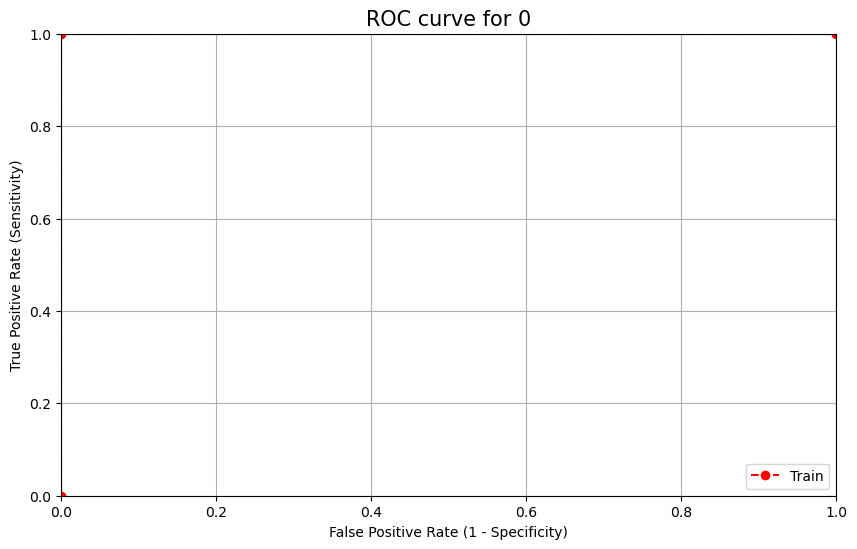

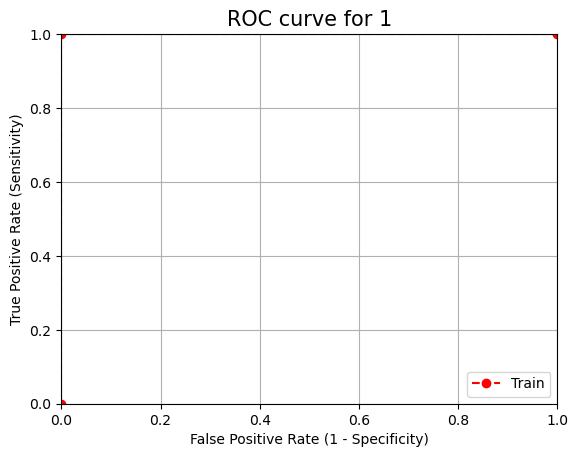

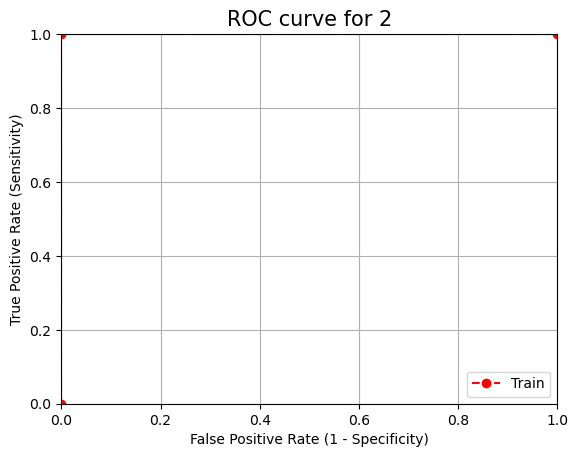

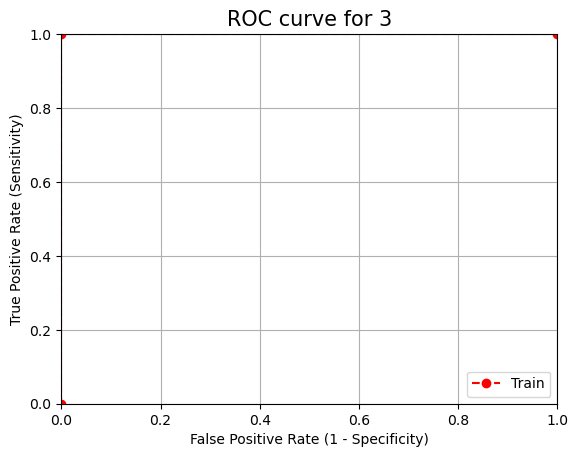

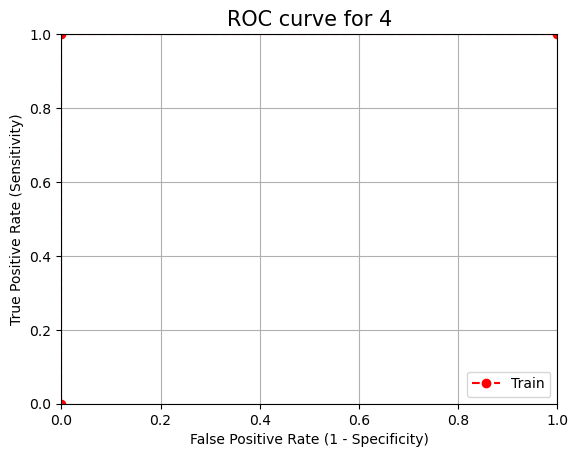

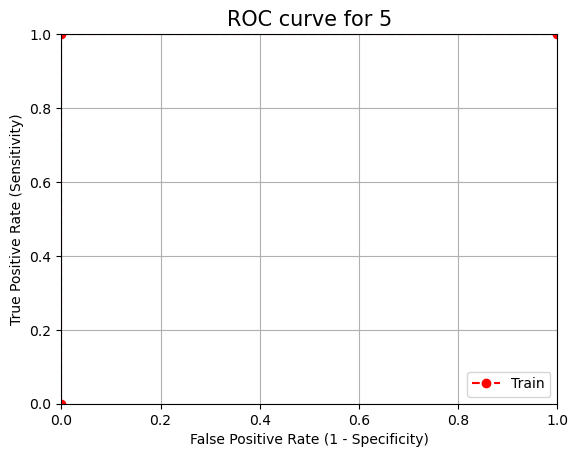

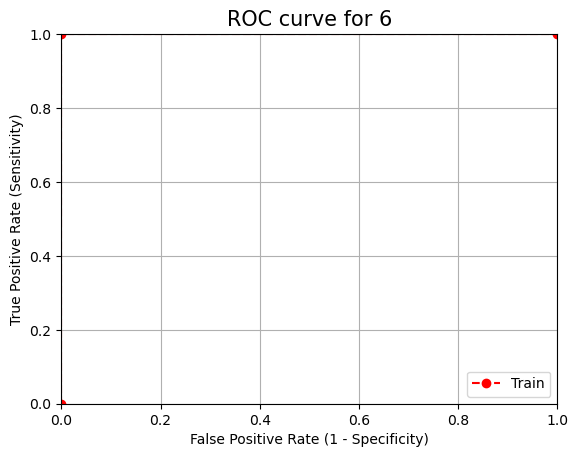

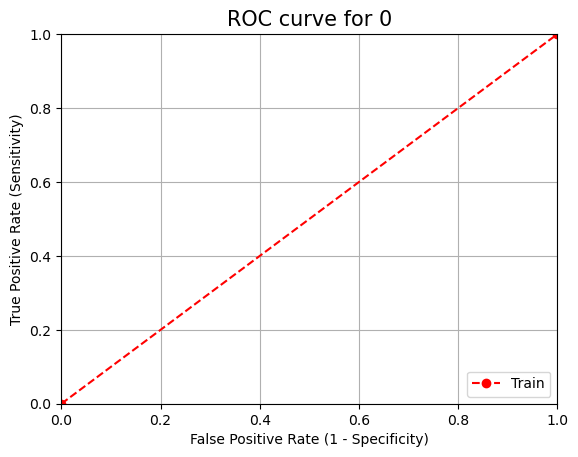

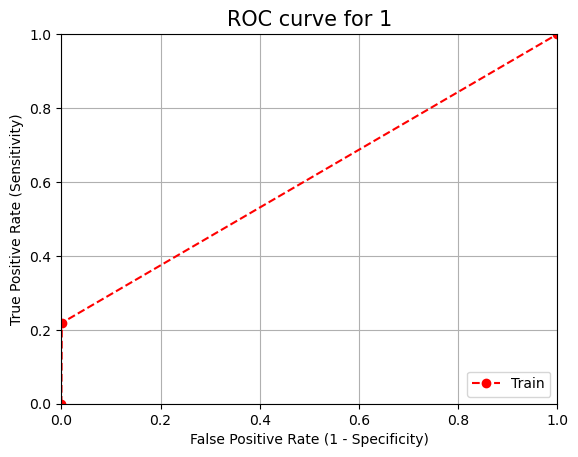

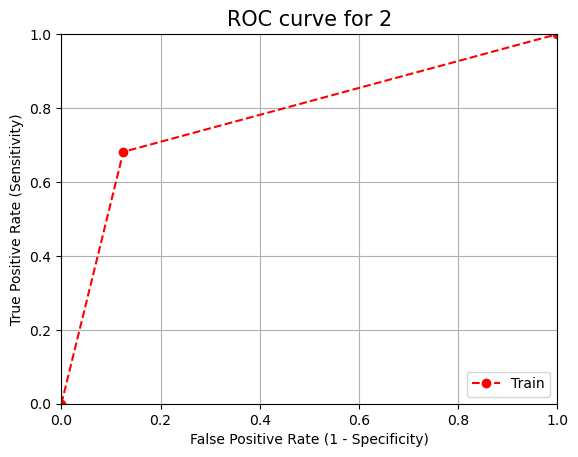

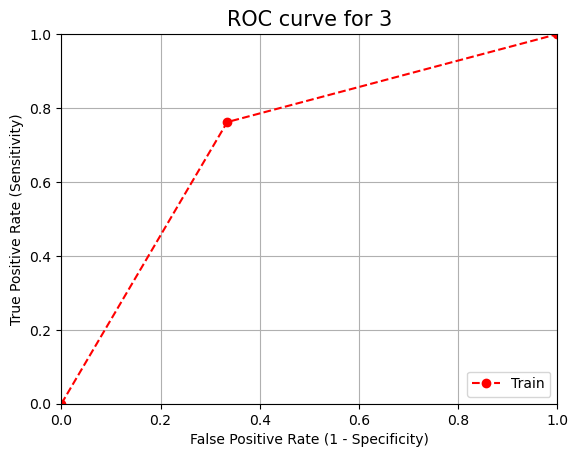

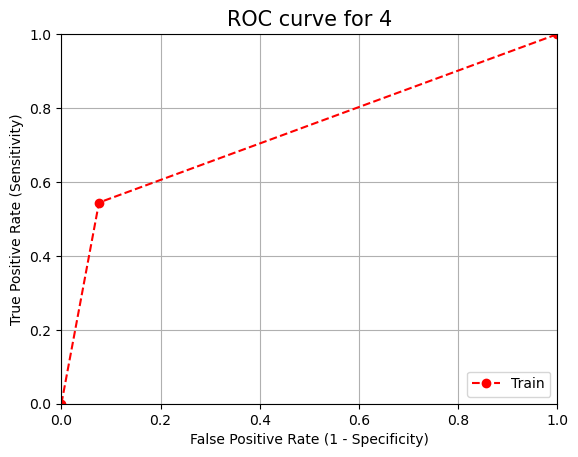

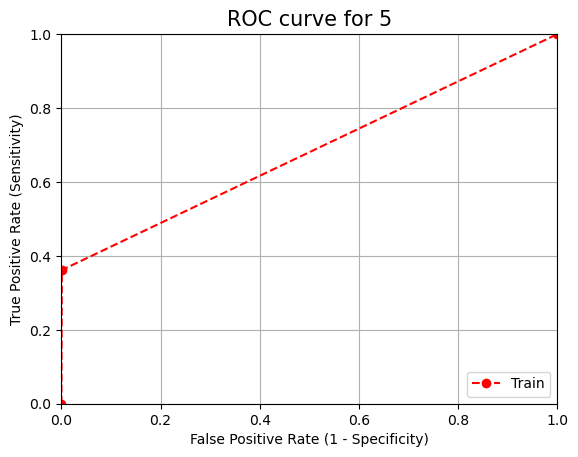

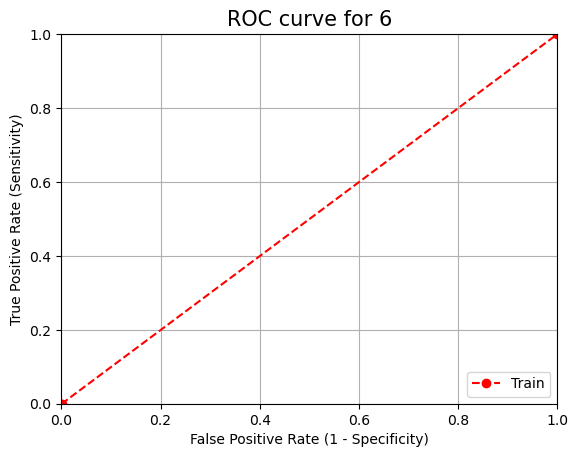

In [563]:
plt.subplots(figsize = (10, 6))
y_train_pred_GB = model_GB.predict(x_train_df)
y_test_pred_GB = model_GB.predict(x_test_df)

AUC_train_values['GB'] = plot_roc_auc_curve(y_train, y_train_pred_GB)

AUC_test_values['GB'] = plot_roc_auc_curve(y_test, y_test_pred_GB)
# additional line
#precison_recall_curve(y_train, y_train_pred_GB, y_test, y_test_pred_GB

## Best GradientBoosting Model

In [564]:
# printing the optimal accuracy score and hyperparameters
print("best f1_score",GS_GB.best_score_)
print(GS_GB.best_estimator_)

best f1_score 0.6225182905345548
GradientBoostingClassifier(max_depth=15, max_features=7, min_samples_leaf=50,
                           min_samples_split=200, n_estimators=300,
                           random_state=10, subsample=0.8)


In [565]:
# GridSearchCV Model
joblib.dump(GS_GB,"cv_GB.h5")
# The best model
joblib.dump(model_GB,"best_GB.h5")

['best_GB.h5']

In [566]:
# Other way of getting r2_score

f1_final_test['GB']= model_GB.score(x_test_df, y_test)

In [567]:
f1_final_test

{'Decision_Tree': 0.5860979462875198,
 'xgb': 0.6832543443917851,
 'RF': 0.6729857819905213,
 'SVC': 0.5529225908372828,
 'knn': 0.655608214849921,
 'GB': 0.6666666666666666}

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.88      0.22      0.35        32
           2       0.69      0.68      0.68       361
           3       0.66      0.76      0.71       584
           4       0.62      0.54      0.58       237
           5       0.94      0.36      0.52        47
           6       0.00      0.00      0.00         1

    accuracy                           0.67      1266
   macro avg       0.54      0.37      0.41      1266
weighted avg       0.67      0.67      0.66      1266



C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


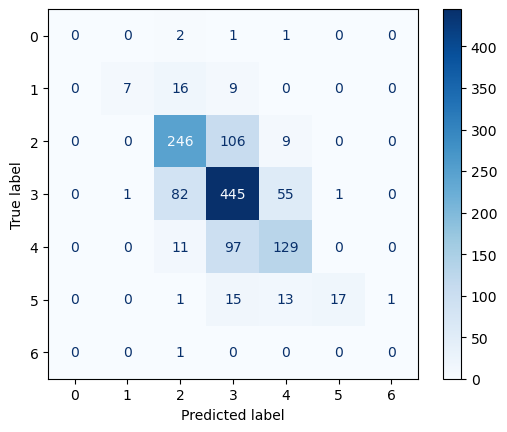

In [568]:
from sklearn.metrics import ConfusionMatrixDisplay


y_pred_GB = GS_GB.best_estimator_.predict(x_test_df)

print(classification_report(y_test, y_pred_GB))

cm = confusion_matrix(y_test, y_pred_GB)

disp = ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = GS_GB.best_estimator_.classes_)
#disp = disp.plot(cmap=plt.cm.Blues,values_format='g')
disp.plot(cmap = plt.cm.Blues,values_format='g')
plt.show()

## KNN

In [503]:
#'max_leaf_nodes':[None],
# 'min_weight_fraction_leaf':[0.0],

# parameter grid
param_grid = {'n_neighbors':np.arange(3,15,1),
          'p':[1,2],
          'weights':['uniform','distance']

             }
scoring_knn = 'f1_weighted'
model_knn = KNeighborsClassifier()

folds = KFold(n_splits = 5, shuffle = True, random_state = 4)


GS_knn = GridSearchCV(model_knn,cv = folds,
                               param_grid=param_grid,
                               scoring = scoring_knn,
                               return_train_score=True,
                               verbose = 1)

In [504]:
GS_knn.fit(x_train_df,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'p': [1, 2], 'weights': ['uniform', 'distance']},
             return_train_score=True, scoring='f1_weighted', verbose=1)

In [505]:

model_knn = GS_knn.best_estimator_
model_knn.fit(x_train_df,y_train)

f1_final_values['knn'] = GS_knn.best_score_
print("Best Parameter: ",GS_knn.best_params_)
print(f"Best {scoring_knn} Score: ",GS_knn.best_score_)

Best Parameter:  {'n_neighbors': 13, 'p': 2, 'weights': 'distance'}
Best f1_weighted Score:  0.6332799686000399


In [ ]:
"""
Best Parameter:  {'max_depth': 15}
Best f1_weighted Score:  0.5637750801551722

Best Parameter:  {'criterion': 'entropy', 'max_depth': 18, 'max_features': 7, 'min_samples_split': 3}
Best f1_weighted Score:  0.5711406429209784

Best Parameter:  {'class_weight': {0: 1, 1: 1, 2: 1, 3: 0.6, 4: 1, 5: 1, 6: 1}, 'criterion': 'entropy', 'max_depth': 18, 'max_features': 6, 'min_samples_split': 2}
Best f1_weighted Score:  0.5717408424074909

Best Parameter:  {'class_weight': {0: 1, 1: 1, 2: 0.8, 3: 0.6, 4: 0.8, 5: 1, 6: 1.5}, 'criterion': 'gini', 'max_depth': 16, 'max_features': 6, 'min_samples_split': 2}
Best f1_weighted Score:  0.5726053157875484

Best Parameter:  {'class_weight': {0: 1.5, 1: 1, 2: 0.8, 3: 0.6, 4: 0.8, 5: 1, 6: 2}, 'criterion': 'entropy', 'max_depth': 18, 'max_features': 7, 'min_samples_split': 4}
Best f1_weighted Score:  0.5730889191568533

"""

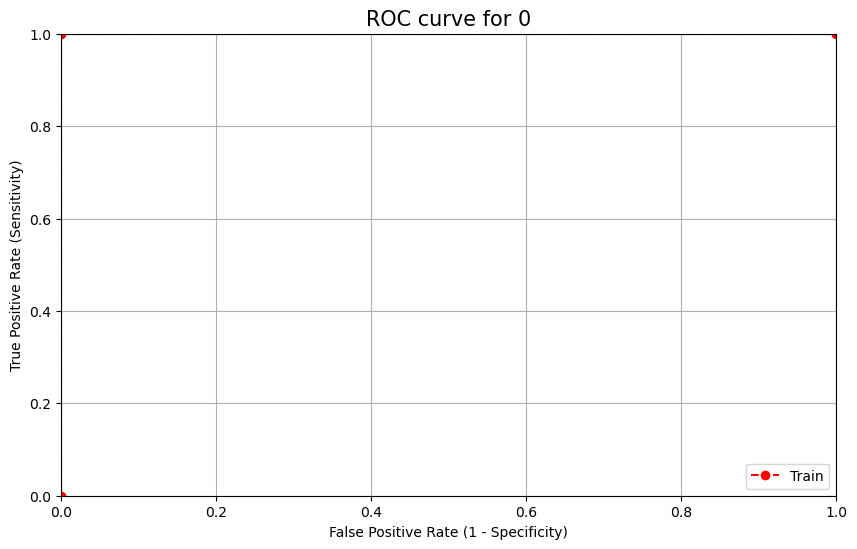

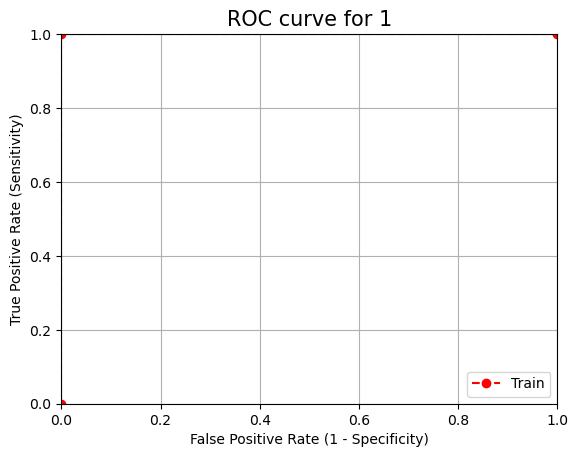

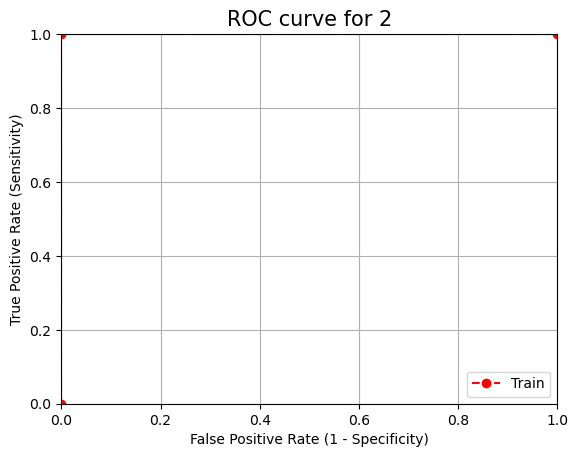

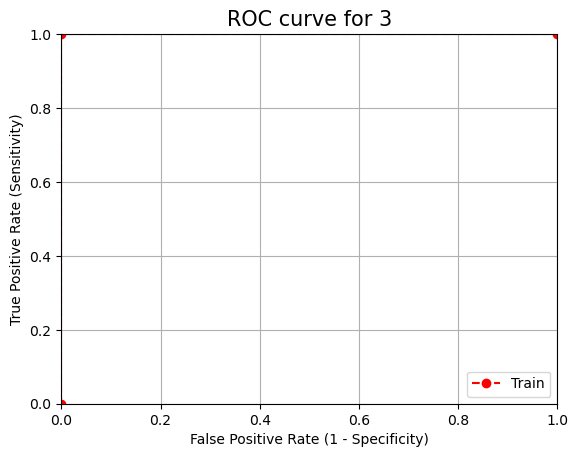

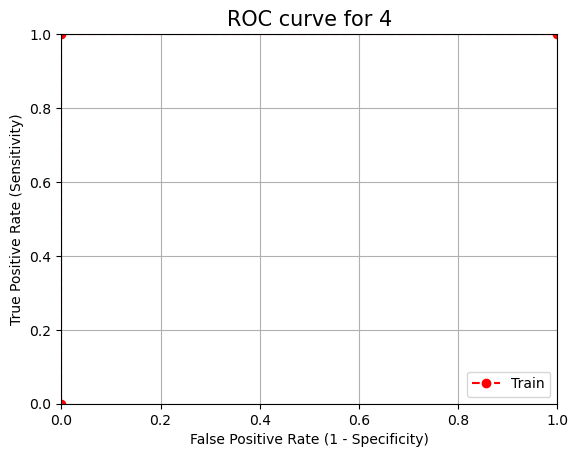

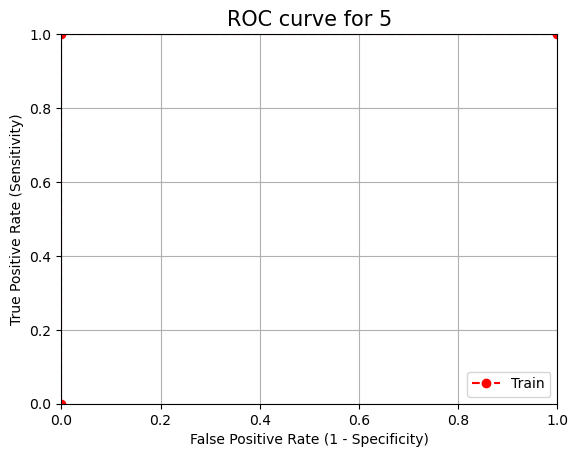

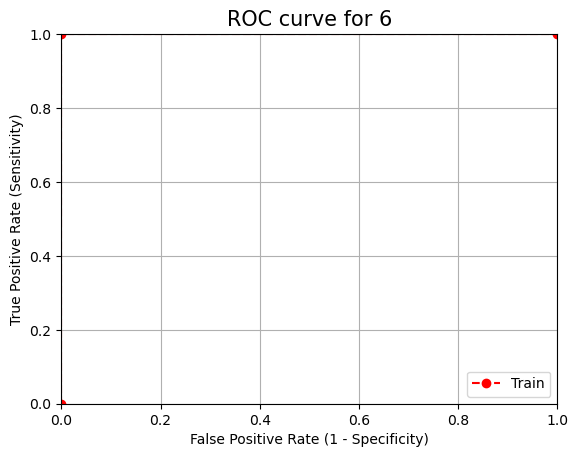

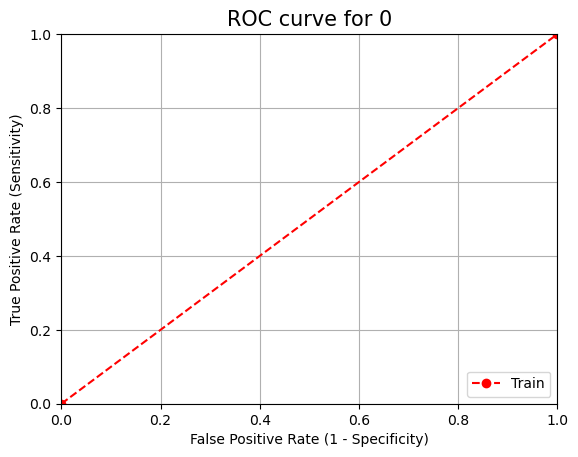

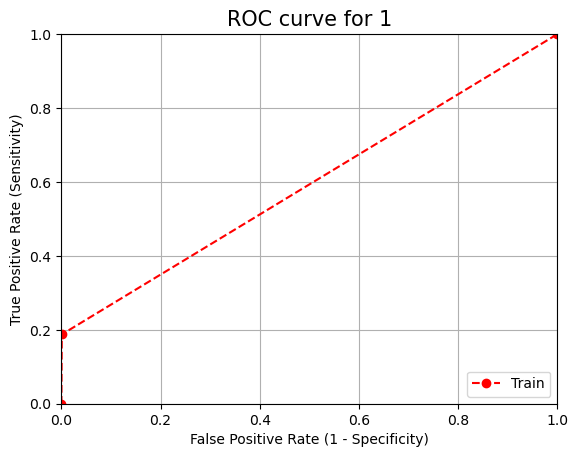

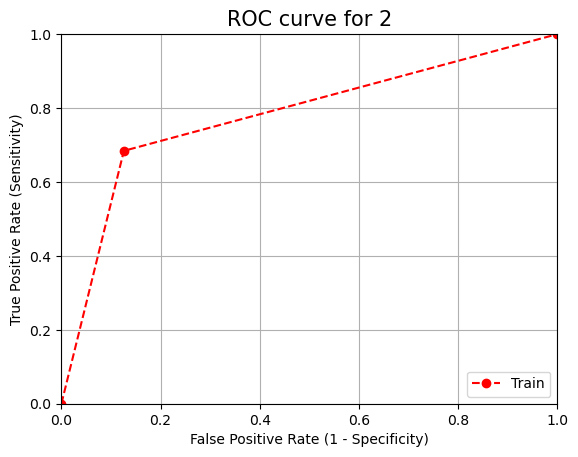

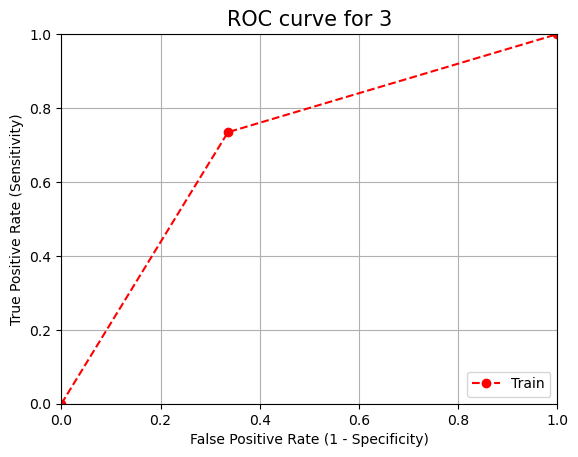

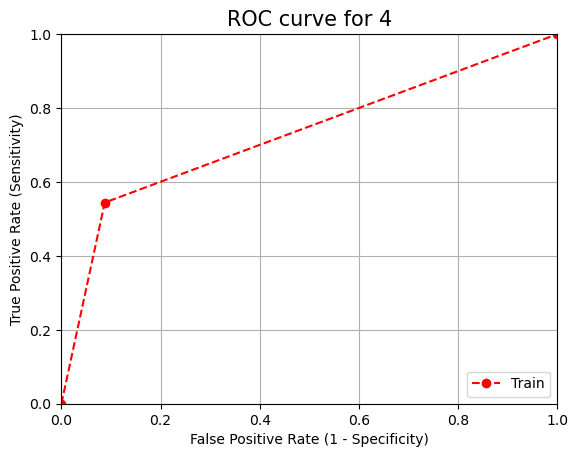

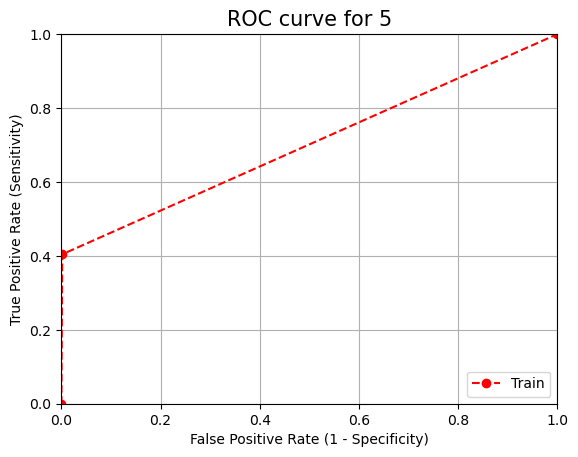

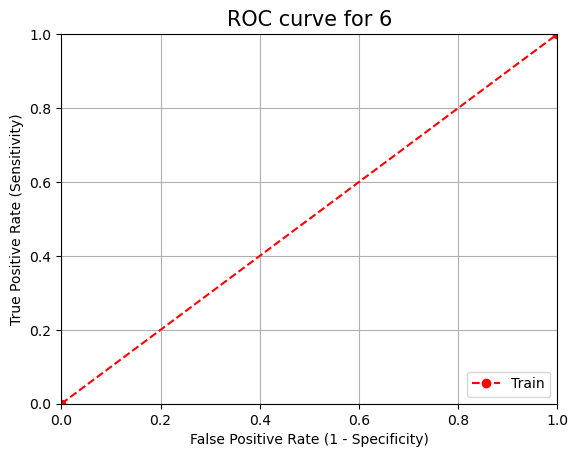

In [507]:
plt.subplots(figsize = (10, 6))
y_train_pred_knn = model_knn.predict(x_train_df)
y_test_pred_knn = model_knn.predict(x_test_df)

AUC_train_values['knn'] = plot_roc_auc_curve(y_train, y_train_pred_knn)

AUC_test_values['knn'] = plot_roc_auc_curve(y_test, y_test_pred_knn)
# additional line
#precison_recall_curve(y_train, y_train_pred_knn, y_test, y_test_pred_knn

## Best KNN Model

In [508]:
# printing the optimal accuracy score and hyperparameters
print("best f1_score",GS_knn.best_score_)
print(GS_knn.best_estimator_)

best f1_score 0.6332799686000399
KNeighborsClassifier(n_neighbors=13, weights='distance')


In [509]:
# GridSearchCV Model
joblib.dump(GS_knn,"cv_knn.h5")
# The best model
joblib.dump(model_knn,"best_knn.h5")

['best_knn.h5']

In [510]:
# Other way of getting r2_score

f1_final_test['knn']= model_knn.score(x_test_df, y_test)

In [569]:
f1_final_test

{'Decision_Tree': 0.5860979462875198,
 'xgb': 0.6832543443917851,
 'RF': 0.6729857819905213,
 'SVC': 0.5529225908372828,
 'knn': 0.655608214849921,
 'GB': 0.6666666666666666}

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.18      0.22      0.20        32
           2       0.59      0.66      0.63       361
           3       0.64      0.62      0.63       584
           4       0.53      0.46      0.50       237
           5       0.52      0.49      0.51        47
           6       0.00      0.00      0.00         1

    accuracy                           0.59      1266
   macro avg       0.35      0.35      0.35      1266
weighted avg       0.59      0.59      0.59      1266



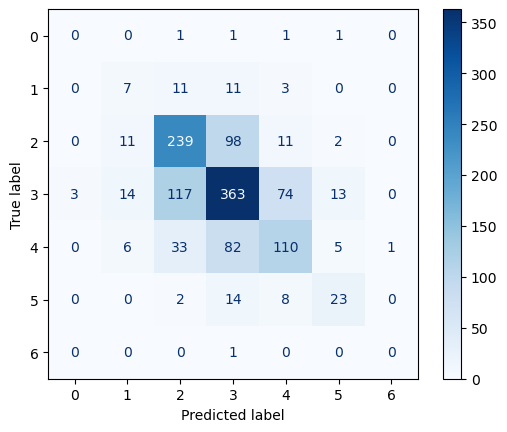

In [381]:
from sklearn.metrics import ConfusionMatrixDisplay


y_pred_knn = GS_knn.best_estimator_.predict(x_test_df)

print(classification_report(y_test, y_pred_knn))

cm = confusion_matrix(y_test, y_pred_knn)

disp = ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = GS_knn.best_estimator_.classes_)
#disp = disp.plot(cmap=plt.cm.Blues,values_format='g')
disp.plot(cmap = plt.cm.Blues,values_format='g')
plt.show()

# Loading All the models:

In [140]:
cv_LR =joblib.load("cv_LR.h5")
cv_DT =joblib.load("DT_cv.h5")
cv_xgb =joblib.load("cv_xgb.h5")
cv_RF =joblib.load("cv_RF.h5")
cv_SVC =joblib.load("cv_SVC.h5")
cv_knn =joblib.load("cv_knn.h5")
cv_GB =joblib.load("cv_GB.h5")

In [141]:
best_LR =joblib.load("best_LR.h5")
best_DT =joblib.load("DT_best.h5")
best_xgb =joblib.load("best_xgb.h5")
best_RF =joblib.load("best_RF.h5")
best_SVC =joblib.load("best_SVC.h5")
best_knn =joblib.load("best_knn.h5")
best_GB =joblib.load("best_GB.h5")

#### Storing all cv  and all best in a list:

In [144]:
cvs = [cv_LR,cv_DT,cv_xgb,cv_RF,cv_SVC,cv_knn,cv_GB]


In [145]:
best = [best_LR,best_DT,best_xgb,best_RF,best_SVC,best_knn,best_GB]

In [148]:
names = ['LR','DT','xgb','RF','SVC','knn','GB']

In [218]:
# Run cell if you want to fit with different x_train_df values
"""

new_best = []
for i,mod in enumerate(cvs):
    new_best.append(mod.best_estimator_.fit(x_train_df,y_train))
new_best
"""

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


## Getting Final Values

In [151]:
f1_last = {}
for i,mod in enumerate(best):
    f1_last[names[i]]= mod.score(x_test_df, y_test)
f1_last

{'LR': 0.5363349131121643,
 'DT': 0.5860979462875198,
 'xgb': 0.6832543443917851,
 'RF': 0.6729857819905213,
 'SVC': 0.5529225908372828,
 'knn': 0.655608214849921,
 'GB': 0.6666666666666666}

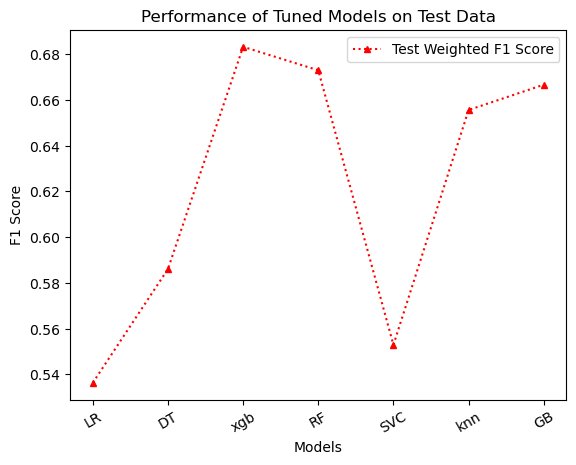

In [204]:
#plt.figure([14,16])
plt.plot(f1_last.keys(),f1_last.values(),"r^:",markersize=5,label='Test Weighted F1 Score')
#plt.plot(model_names,auc_test_1,"go:",markersize=5,label='Test ROC_AUC Score')

plt.title('Performance of Tuned Models on Test Data')
plt.xlabel('Models')
plt.ylabel('F1 Score')
plt.xticks(rotation=30)
plt.legend()
plt.show()

## Getting Final ROC_AUC Values

In [217]:
AUC_train_last ={}
AUC_test_last ={}
for i,mod in enumerate(best):
    y_train_pred_loop = mod.predict(x_train_df)
    y_test_pred_loop = mod.predict(x_test_df)
    print(f"For {names[i]}:")
    print("----------------------------------------------------------------")
    #print("TRAIN -")
    #AUC_train_last[names[i]] = roc_auc_curve_scores(y_train, y_train_pred_loop)
    print("TEST -")
    AUC_test_last[names[i]] = roc_auc_curve_scores(y_test, y_test_pred_loop)
    print(AUC_test_last[names[i]])
    print("----------------------------------------------------------------")

For LR:
----------------------------------------------------------------
TEST -
{0: 0.5, 1: 0.49959481361426256, 2: 0.694657259607291, 3: 0.5894503474872455, 4: 0.5576632099494409, 5: 0.5, 6: 0.4992094861660079}
----------------------------------------------------------------
For DT:
----------------------------------------------------------------
TEST -
{0: 0.49881141045958793, 1: 0.5968142220421394, 2: 0.7404171959412926, 3: 0.6590281404410879, 4: 0.6849343715786496, 5: 0.7360672333443875, 6: 0.49960474308300395}
----------------------------------------------------------------
For xgb:
----------------------------------------------------------------
TEST -
{0: 0.5, 1: 0.5933448136142626, 2: 0.7918366722272385, 3: 0.7197229140722292, 4: 0.7343924911736848, 5: 0.6808510638297872, 6: 0.5}
----------------------------------------------------------------
For RF:
----------------------------------------------------------------
TEST -
{0: 0.5, 1: 0.6089698136142625, 2: 0.7829815888951807, 3

In [200]:
from collections import defaultdict
dd = defaultdict(list)

for d in AUC_test_last.values():
    for key, value in d.items():
        dd[key].append(value)
    

test_aoc =pd.DataFrame.from_dict(dd)
test_aoc['name'] = names
test_aoc = test_aoc.rename(columns={0:3,1:4,2:5,3:6,4:7,5:8,6:9})

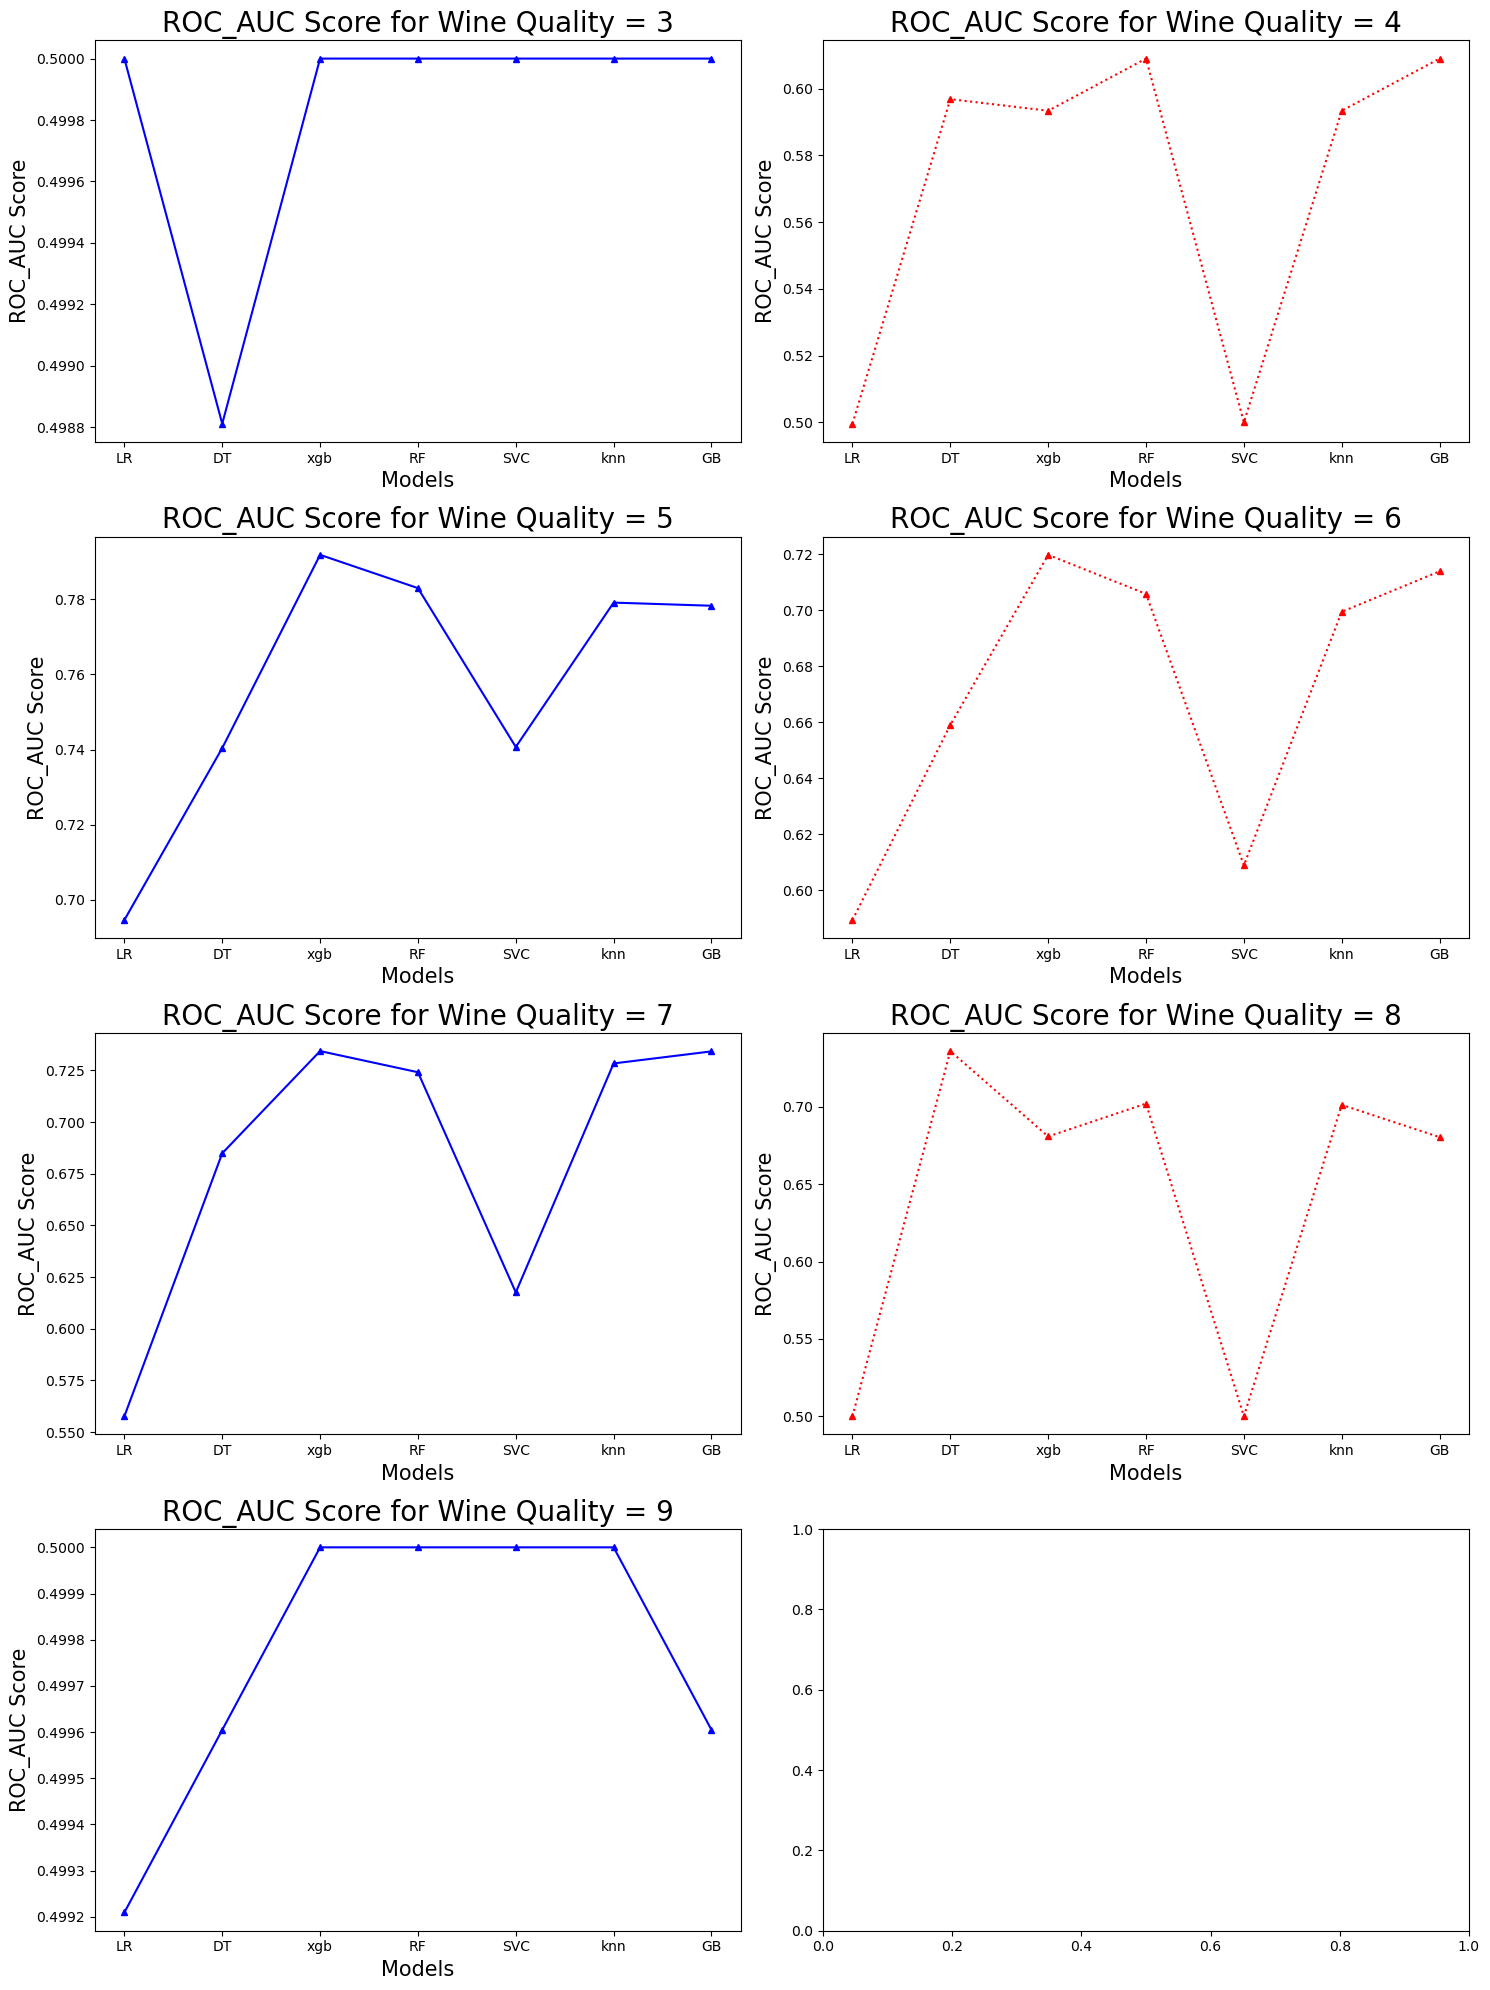

In [203]:

# Create the subplots
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))

col=["b^-","r^:"]
# Iterate over the features and create a boxplot for each one
for i, feature in enumerate(test_aoc.columns):
    if feature != 'name':
        axes[i//2,i%2].plot(test_aoc['name'],test_aoc[feature],
                 col[i%2],markersize=5,
                 label='TEST ROC_AUC Score'
                 
        
        )

        # Set the title and labels for each subplot
        axes[i//2,i%2].set_title(f'ROC_AUC Score for Wine Quality = {feature}',fontsize=20)
        axes[i//2,i%2].set_ylabel('ROC_AUC Score',fontsize=15)
        axes[i//2,i%2].set_xlabel('Models',fontsize=15)

# Adjust the layout of the subplots
plt.tight_layout()

# Show the plot
plt.show()

FOR LR:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        32
           2       0.60      0.53      0.56       361
           3       0.53      0.77      0.62       584
           4       0.42      0.17      0.24       237
           5       0.00      0.00      0.00        47
           6       0.00      0.00      0.00         1

    accuracy                           0.54      1266
   macro avg       0.22      0.21      0.20      1266
weighted avg       0.49      0.54      0.49      1266



C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


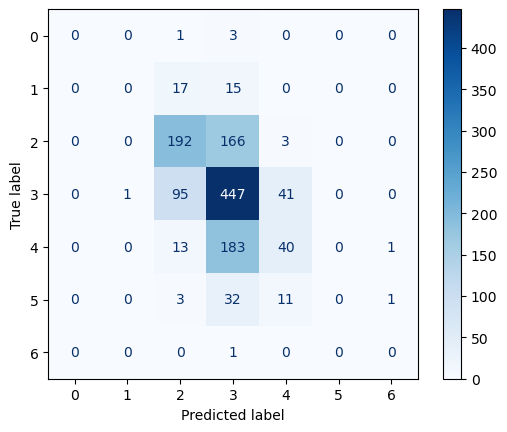


FOR DT:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.18      0.22      0.20        32
           2       0.59      0.66      0.63       361
           3       0.64      0.62      0.63       584
           4       0.53      0.46      0.50       237
           5       0.52      0.49      0.51        47
           6       0.00      0.00      0.00         1

    accuracy                           0.59      1266
   macro avg       0.35      0.35      0.35      1266
weighted avg       0.59      0.59      0.59      1266



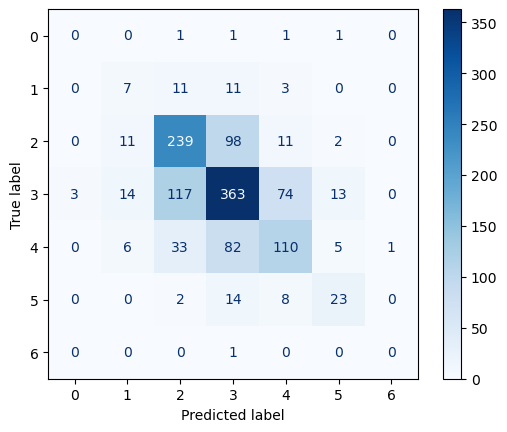


FOR xgb:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.86      0.19      0.31        32
           2       0.72      0.69      0.71       361
           3       0.65      0.80      0.72       584
           4       0.69      0.52      0.59       237
           5       1.00      0.36      0.53        47
           6       0.00      0.00      0.00         1

    accuracy                           0.68      1266
   macro avg       0.56      0.37      0.41      1266
weighted avg       0.70      0.68      0.67      1266



C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


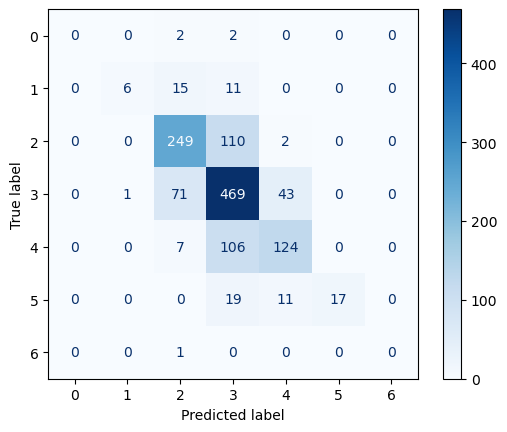


FOR RF:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.88      0.22      0.35        32
           2       0.71      0.68      0.69       361
           3       0.64      0.79      0.71       584
           4       0.70      0.50      0.58       237
           5       1.00      0.40      0.58        47
           6       0.00      0.00      0.00         1

    accuracy                           0.67      1266
   macro avg       0.56      0.37      0.42      1266
weighted avg       0.69      0.67      0.66      1266



C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


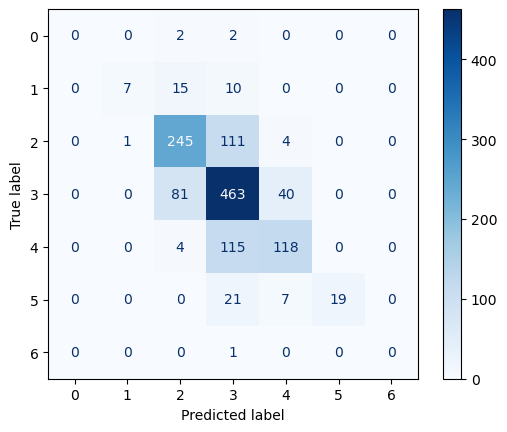


FOR SVC:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        32
           2       0.59      0.67      0.63       361
           3       0.56      0.65      0.60       584
           4       0.44      0.33      0.38       237
           5       0.00      0.00      0.00        47
           6       0.00      0.00      0.00         1

    accuracy                           0.55      1266
   macro avg       0.23      0.24      0.23      1266
weighted avg       0.51      0.55      0.53      1266



C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


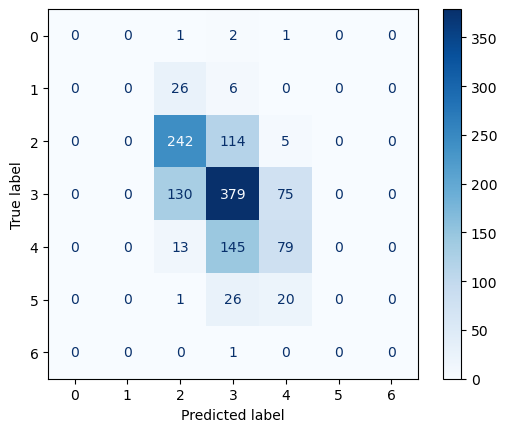


FOR knn:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.86      0.19      0.31        32
           2       0.68      0.68      0.68       361
           3       0.65      0.73      0.69       584
           4       0.59      0.54      0.57       237
           5       0.90      0.40      0.56        47
           6       0.00      0.00      0.00         1

    accuracy                           0.66      1266
   macro avg       0.53      0.36      0.40      1266
weighted avg       0.66      0.66      0.65      1266



C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


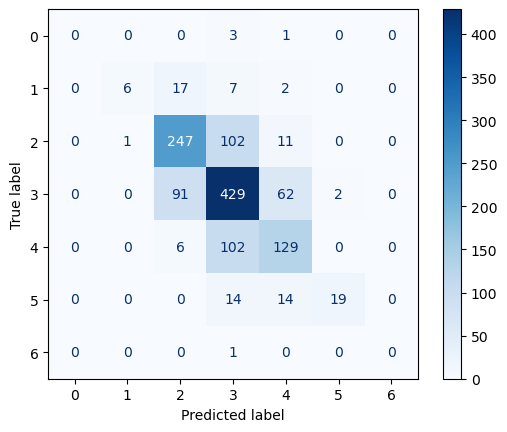


FOR GB:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.88      0.22      0.35        32
           2       0.69      0.68      0.68       361
           3       0.66      0.76      0.71       584
           4       0.62      0.54      0.58       237
           5       0.94      0.36      0.52        47
           6       0.00      0.00      0.00         1

    accuracy                           0.67      1266
   macro avg       0.54      0.37      0.41      1266
weighted avg       0.67      0.67      0.66      1266



C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


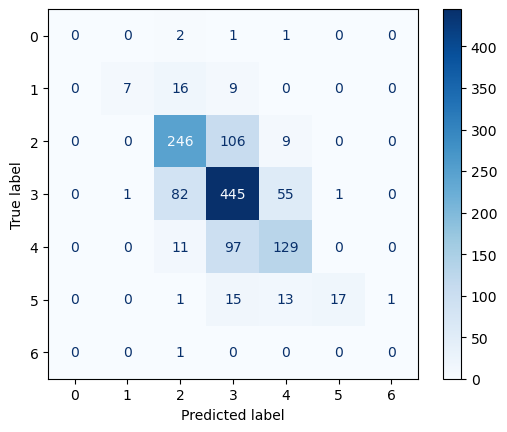

In [237]:
from sklearn.metrics import ConfusionMatrixDisplay


for i,mod in enumerate(best):
    y_train_pred_loop = mod.predict(x_train_df)
    y_test_pred_loop = mod.predict(x_test_df)

    print(f"FOR {names[i]}:")

    print(classification_report(y_test,y_test_pred_loop))

    cm = confusion_matrix(y_test, y_test_pred_loop)

    disp = ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = mod.classes_)
    #disp = disp.plot(cmap=plt.cm.Blues,values_format='g')
    disp.plot(cmap = plt.cm.Blues,values_format='g')
    plt.show()
    print("=========================================================================\n")

# CONCLUSION

In [238]:
# Final y_predicted values
y_best_pred = best_xgb.predict(x_test_df)


array([3, 3, 3, ..., 2, 2, 2])

In [242]:
pd.Series(y_best_pred).rename("y_pred")

0       3
1       3
2       3
3       3
4       3
       ..
1261    3
1262    4
1263    2
1264    2
1265    2
Name: y_pred, Length: 1266, dtype: int32

In [226]:
y_demo_1 = y_train.map({0:3,1:4,2:5,3:6,4:7,5:8,6:9})
y_demo_1.value_counts()

quality
6    1363
5     842
7     554
8     108
4      74
3       9
9       3
Name: count, dtype: int64

In [225]:
y_demo = y_test.map({0:3,1:4,2:5,3:6,4:7,5:8,6:9})
y_demo.value_counts()

quality
6    584
5    361
7    237
8     47
4     32
3      4
9      1
Name: count, dtype: int64

#### The XGBoost Model performed best 
- Accuracy = 0.68
- Weighted F1 = 0.68325
- roc_auc_score (class-wise) : {3: 0.5, 4: 0.5933448136142626, 5: 0.7918366722272385, 6: 0.7197229140722292, 7: 0.7343924911736848, 8: 0.6808510638297872, 9: 0.5}
        


### Final Notes:
However all the models struggled to classify Wine Quality 3 & 9 , this is due to a high class imbalance with a very small sample size for those classes.

- Different train_test_splits, different feature selection methods (PCA and VIF) were used, the final notebook contains the version with the best result.
- The models that allowed for modifying class weight were tuned heavily to try to classify them correctly but it always resulted in large misclassifications of the other classes.
- Since there wasn't any inherit preferance for a given class, a weighted F1-score was taken as a measure to best approach this imbalanced set.
- If there was a preference for a particular class a precision-recall curve would have been used to identify the best threshold for the given class.
- A binning approach is also possible where we group some qualities into bins, this would reduce the number of classes as well as increase the samples of each class.

- In the future some oversampling/undersampling method can be utilized to help with this problem.